**Loading libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from keras.layers import Input, Dense, Lambda, Subtract
from keras.models import Model
import keras.backend as K

mounting google drive to read data file

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


**converting csv file into pandas data frame**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/drebin-215-dataset-5560malware-9476-benign.csv")
dataset.head()


<ipython-input-4-d9a41cf1cf47>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/drive/MyDrive/drebin-215-dataset-5560malware-9476-benign.csv")


transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   

   Ljava.lang.Class.cast  ...  READ_CONTACTS  DEVICE_POWER  HARDWARE_TEST  \
0                      0  ...              0             0              0   
1                      0  ...              0             0              0   
2                      0  ...              0             0              0   
3                      1  ...              0             0              0   
4                      0  ...              0             0              0   

   ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  ACCESS_FINE_LOCATION  \
0                  0                       1                     0   
1                  0                       1                     0   
2                  0                       0                     0   
3                  1                       1                     1   
4                  1                       0                     1   

   SET_WALLPAPER_HINTS  SET_PREFERRED_APPLICATIONS  WRITE_SECURE_SETTINGS  \
0                    0                           0                      0   
1                    0                           0                      0   
2                    0                           0                      0   
3                    0                           0                      0   
4                    0                           0                      0   

   class  
0      S  
1      S  
2      S  
3      S  
4      S  

[5 rows x 216 columns]

In [ ]:
dataset["class"].value_counts()

B    9476
S    5560
Name: class, dtype: int64

**Data visualization**

<Axes: xlabel='class', ylabel='count'>

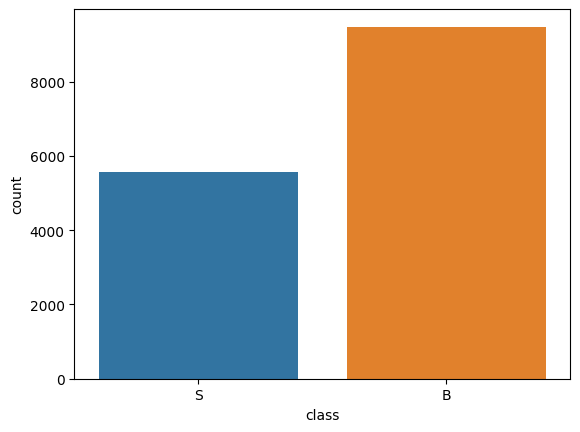

In [ ]:
sns.countplot(x=dataset["class"])

**Data cleaning**

In [ ]:
classes,count = np.unique(dataset['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
dataset = dataset.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
dataset=dataset.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(dataset.isna().sum())))
dataset.dropna(inplace=True)
for c in dataset.columns:
    dataset[c] = pd.to_numeric(dataset[c])
dataset

[0 1] ['B' 'S']
Total missing values :  5


transact  onServiceConnected  bindService  attachInterface  \
0             0                   0            0                0   
1             0                   0            0                0   
2             0                   0            0                0   
3             0                   0            0                0   
4             0                   0            0                0   
...         ...                 ...          ...              ...   
15031         1                   1            1                1   
15032         0                   0            0                0   
15033         0                   0            0                0   
15034         1                   1            1                1   
15035         1                   1            1                1   

       ServiceConnection  android.os.Binder  SEND_SMS  \
0                      0                  0         1   
1                      0                  0         1   
2                      0                  0         1   
3                      0                  0         0   
4                      0                  0         0   
...                  ...                ...       ...   
15031                  1                  1         0   
15032                  0                  0         0   
15033                  0                  0         0   
15034                  1                  1         0   
15035                  1                  1         0   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   
...                                  ...                          ...   
15031                                  1                            1   
15032                                  0                            0   
15033                                  0                            0   
15034                                  1                            1   
15035                                  1                            1   

       Ljava.lang.Class.cast  ...  READ_CONTACTS  DEVICE_POWER  HARDWARE_TEST  \
0                          0  ...              0             0              0   
1                          0  ...              0             0              0   
2                          0  ...              0             0              0   
3                          1  ...              0             0              0   
4                          0  ...              0             0              0   
...                      ...  ...            ...           ...            ...   
15031                      1  ...              0             0              0   
15032                      1  ...              0             0              0   
15033                      0  ...              0             0              0   
15034                      1  ...              1             0              0   
15035                      1  ...              0             0              0   

       ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  ACCESS_FINE_LOCATION  \
0                      0                       1                     0   
1                      0                       1                     0   
2                      0                       0                     0   
3                      1                       1                     1   
4                      1                       0                     1   
...                  ...                     ...                   ...   
15031                  1                       1                     0   
15032                  1                       1   

**EDA**

In [ ]:
dataset.shape

(15031, 216)

In [ ]:
dataset.isnull()

transact  onServiceConnected  bindService  attachInterface  \
0         False               False        False            False   
1         False               False        False            False   
2         False               False        False            False   
3         False               False        False            False   
4         False               False        False            False   
...         ...                 ...          ...              ...   
15031     False               False        False            False   
15032     False               False        False            False   
15033     False               False        False            False   
15034     False               False        False            False   
15035     False               False        False            False   

       ServiceConnection  android.os.Binder  SEND_SMS  \
0                  False              False     False   
1                  False              False     False   
2                  False              False     False   
3                  False              False     False   
4                  False              False     False   
...                  ...                ...       ...   
15031              False              False     False   
15032              False              False     False   
15033              False              False     False   
15034              False              False     False   
15035              False              False     False   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  False                        False   
1                                  False                        False   
2                                  False                        False   
3                                  False                        False   
4                                  False                        False   
...                                  ...                          ...   
15031                              False                        False   
15032                              False                        False   
15033                              False                        False   
15034                              False                        False   
15035                              False                        False   

       Ljava.lang.Class.cast  ...  READ_CONTACTS  DEVICE_POWER  HARDWARE_TEST  \
0                      False  ...          False         False          False   
1                      False  ...          False         False          False   
2                      False  ...          False         False          False   
3                      False  ...          False         False          False   
4                      False  ...          False         False          False   
...                      ...  ...            ...           ...            ...   
15031                  False  ...          False         False          False   
15032                  False  ...          False         False          False   
15033                  False  ...          False         False          False   
15034                  False  ...          False         False          False   
15035                  False  ...          False         False          False   

       ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  ACCESS_FINE_LOCATION  \
0                  False                   False                 False   
1                  False                   False                 False   
2                  False                   False                 False   
3                  False                   False                 False   
4                  False                   False                 False   
...                  ...                     ...                   ...   
15031              False                   False                 False   
15032              False                   False   

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(216)
memory usage: 24.9 MB


**Visualizng pandas dataframe columns**

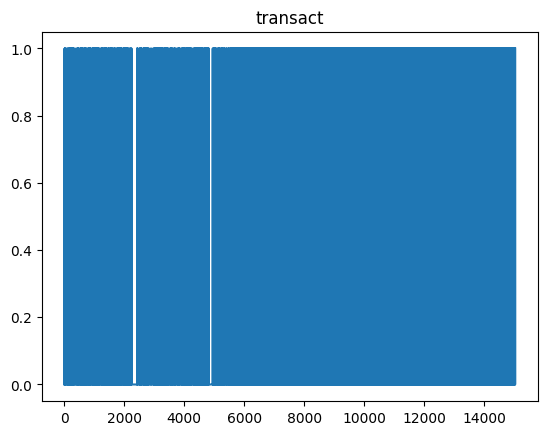

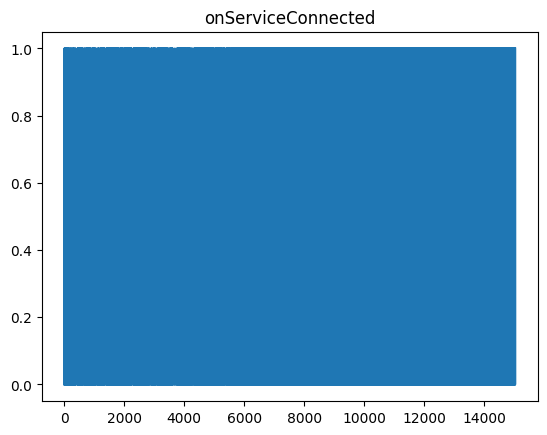

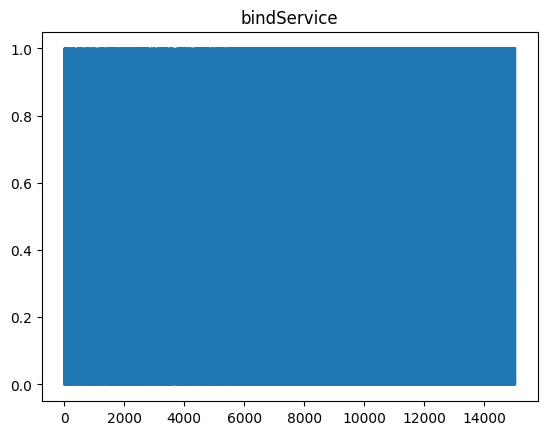

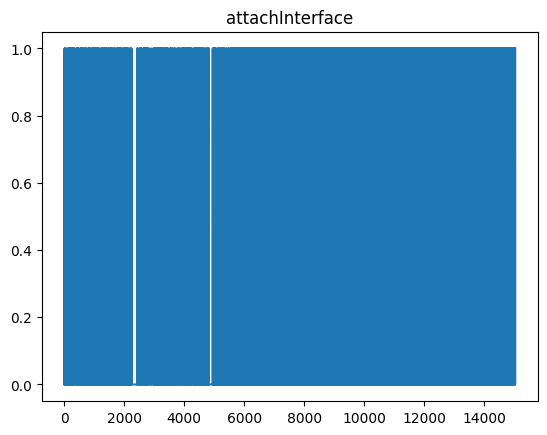

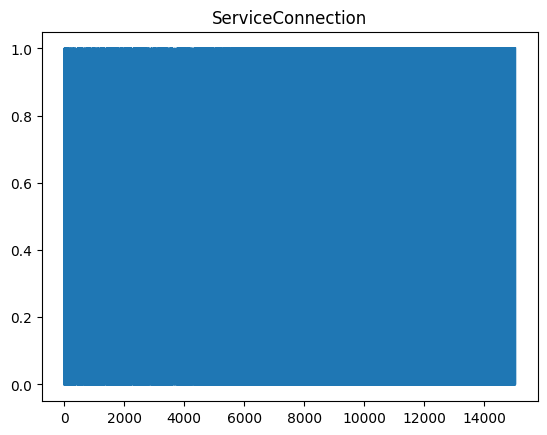

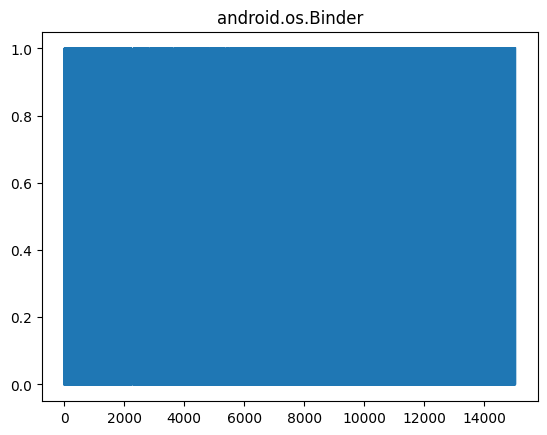

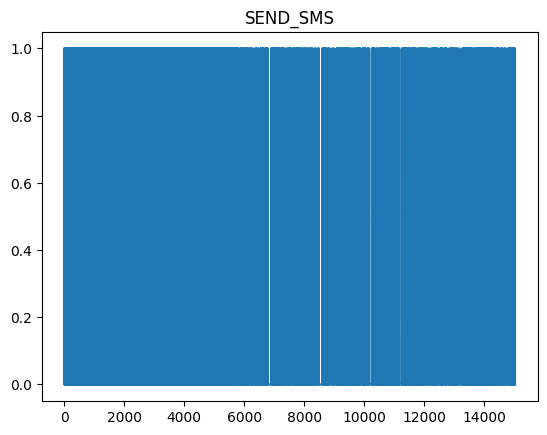

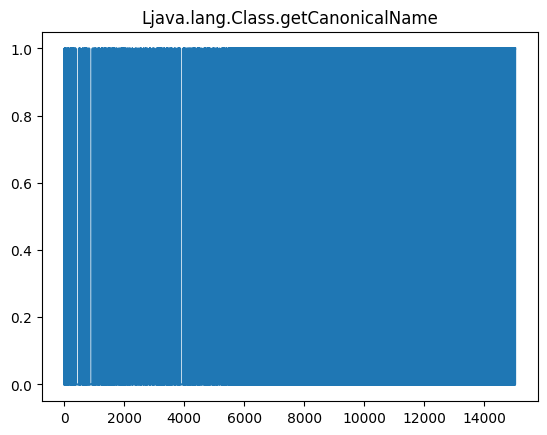

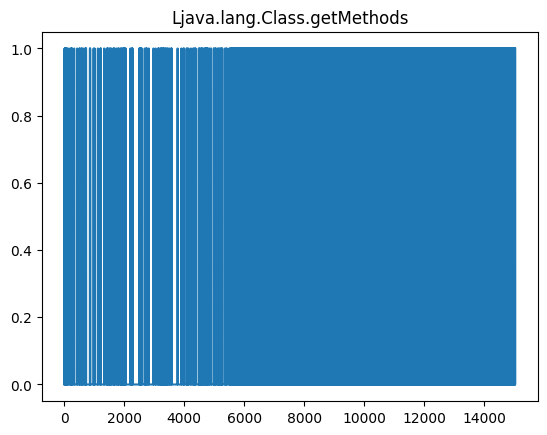

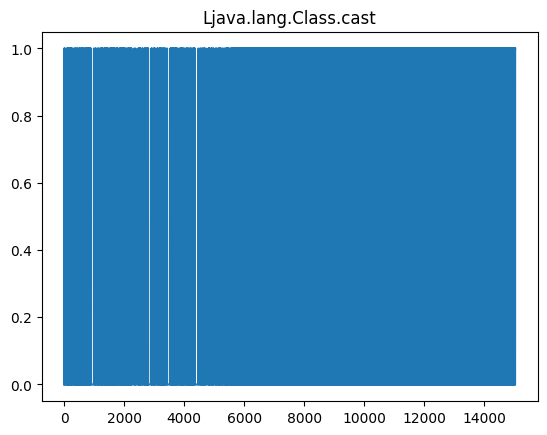

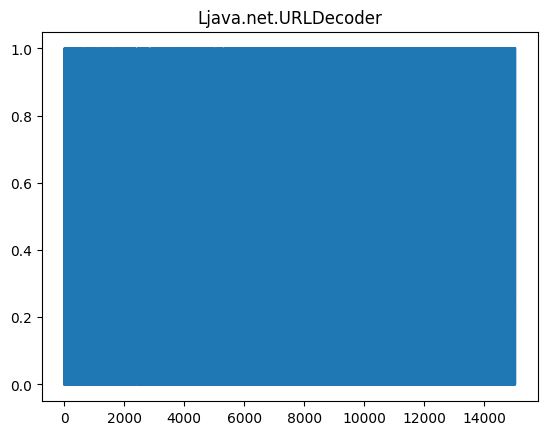

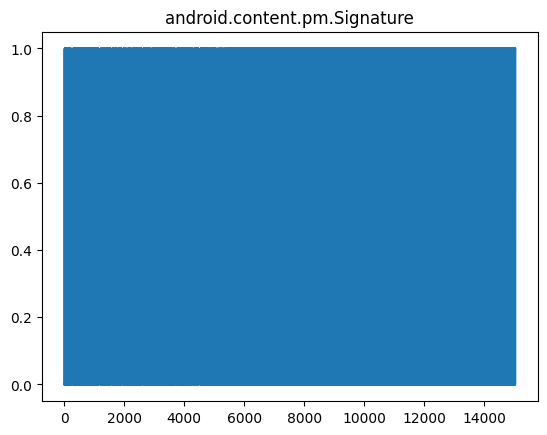

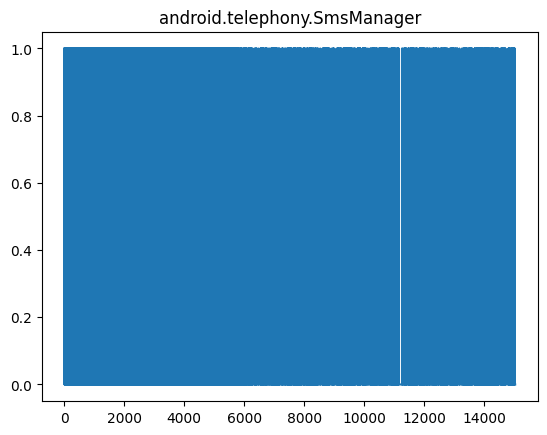

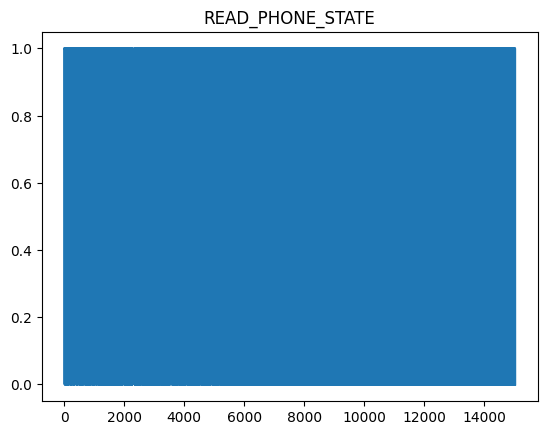

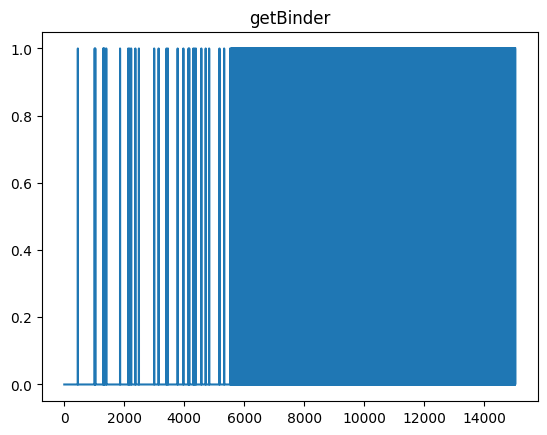

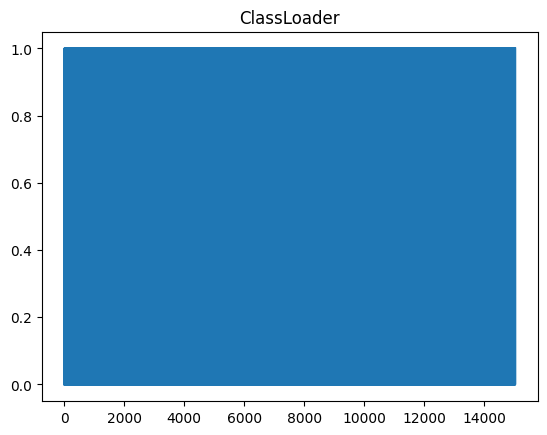

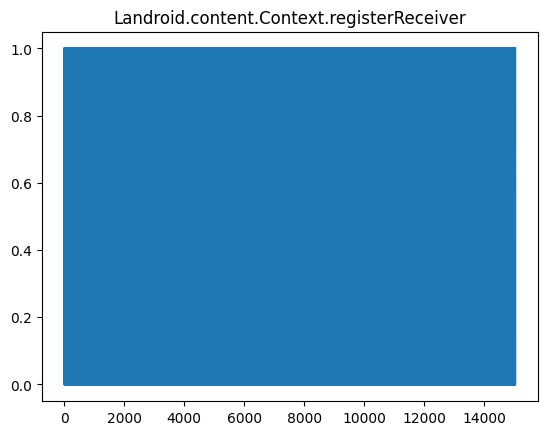

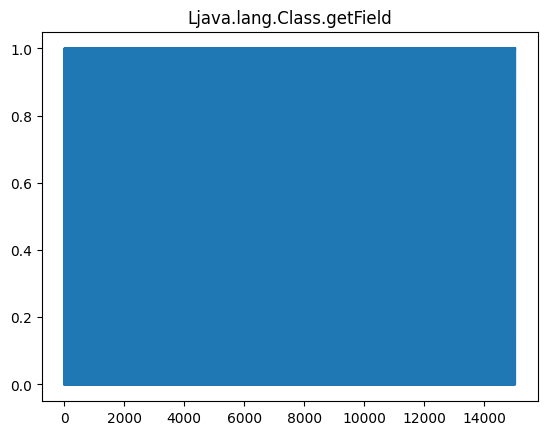

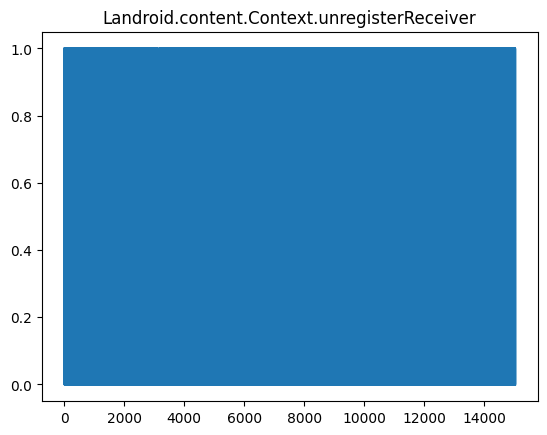

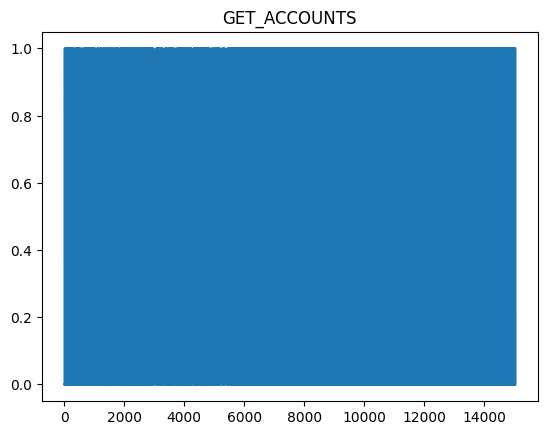

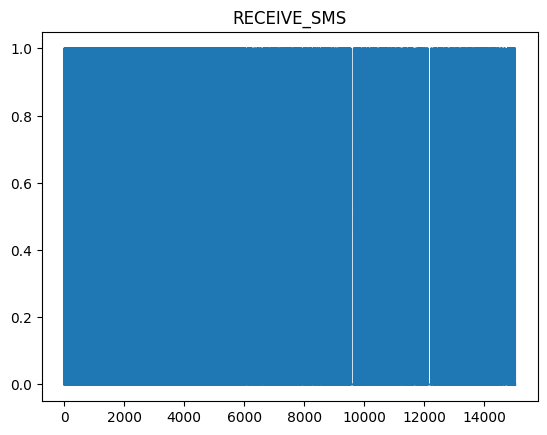

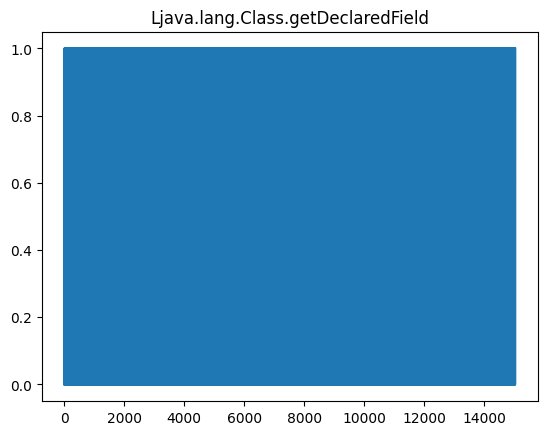

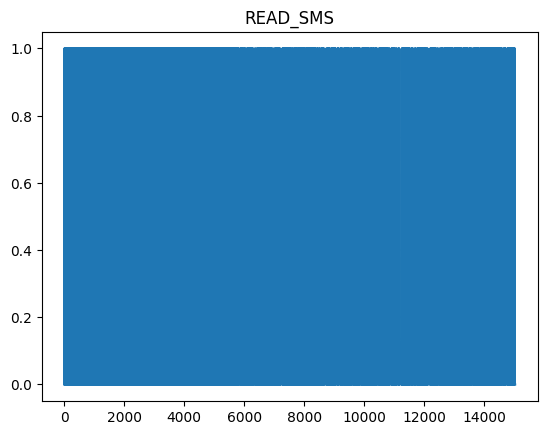

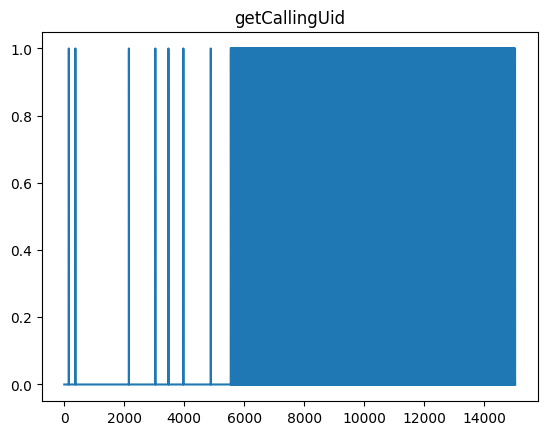

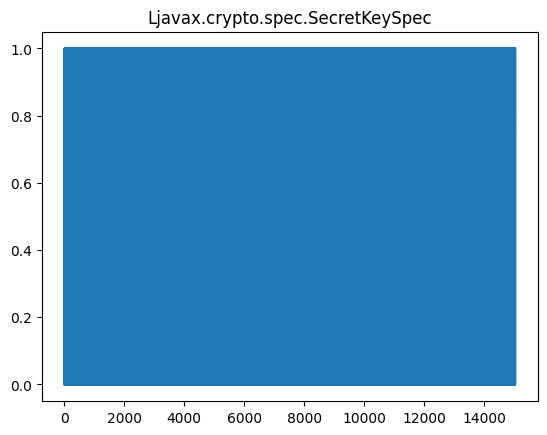

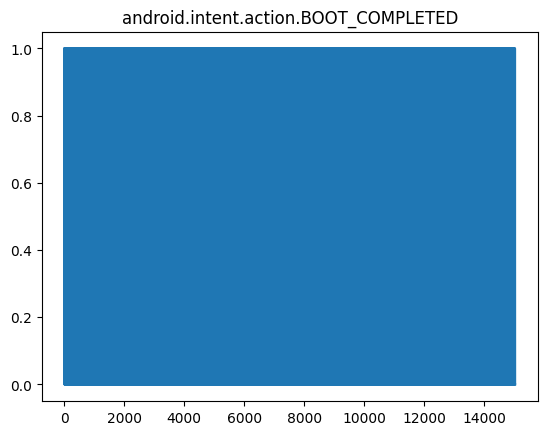

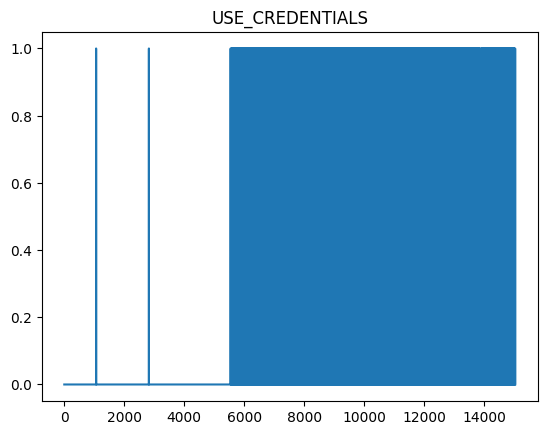

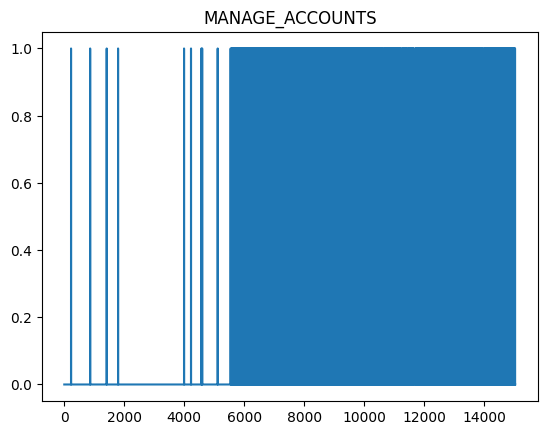

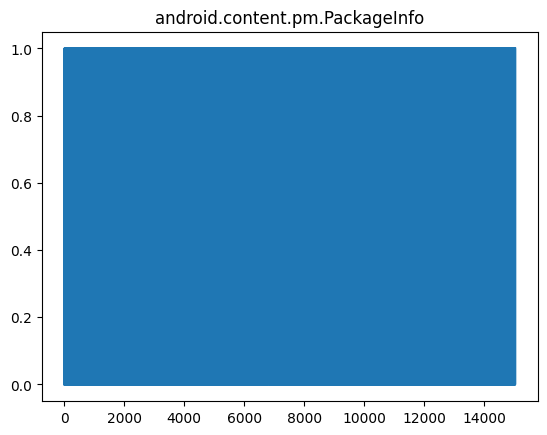

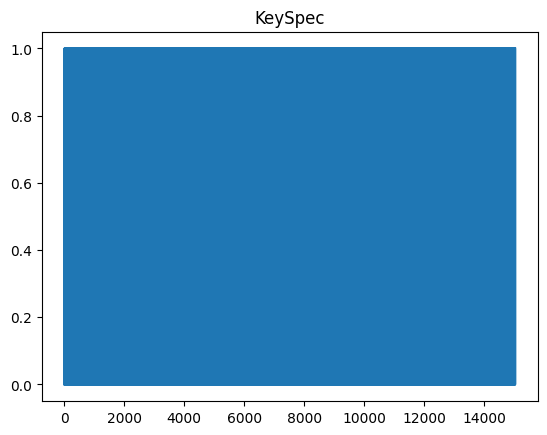

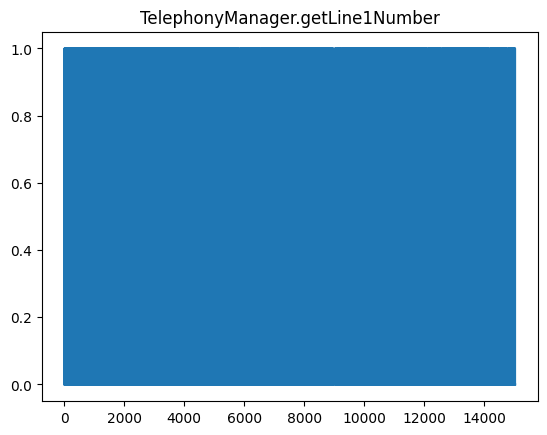

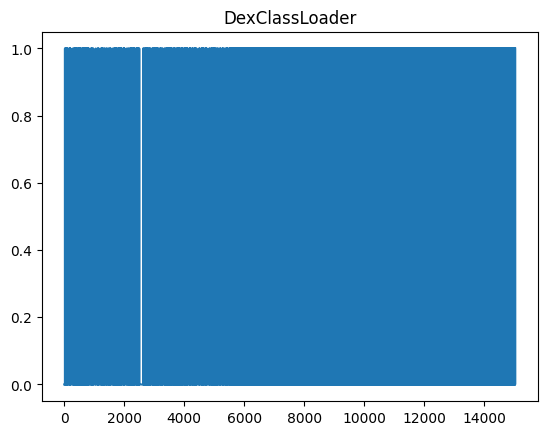

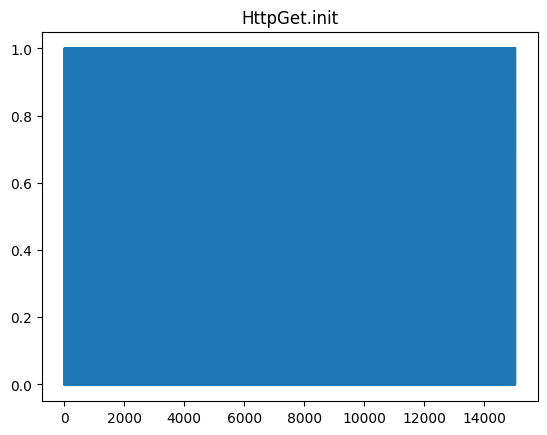

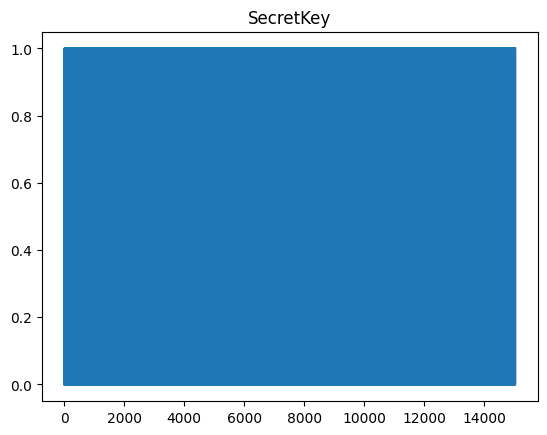

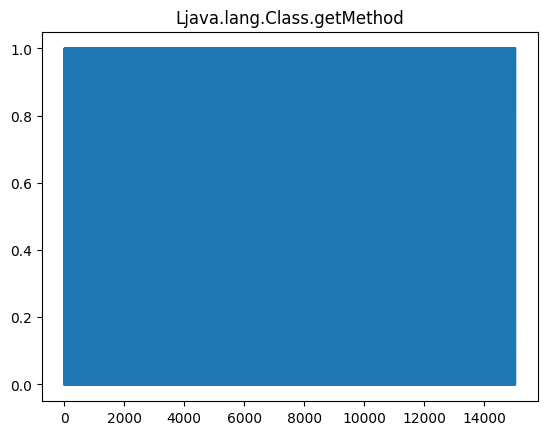

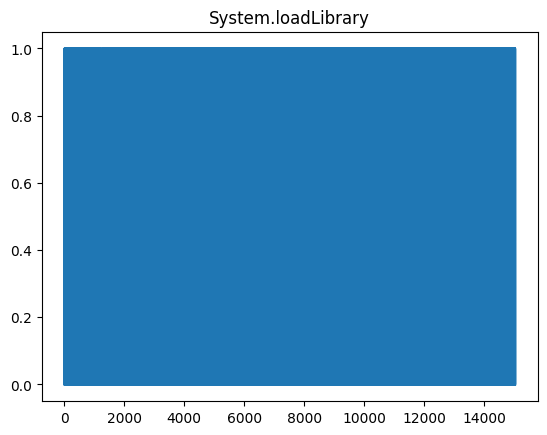

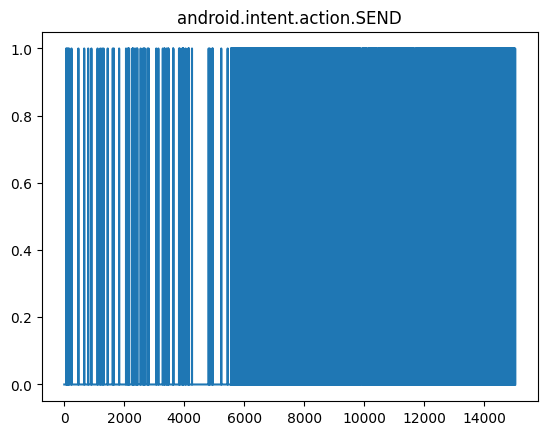

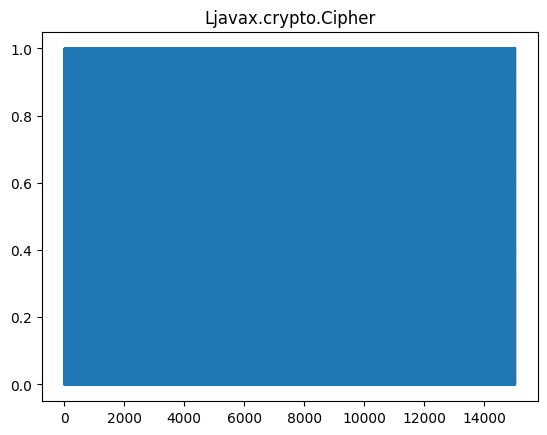

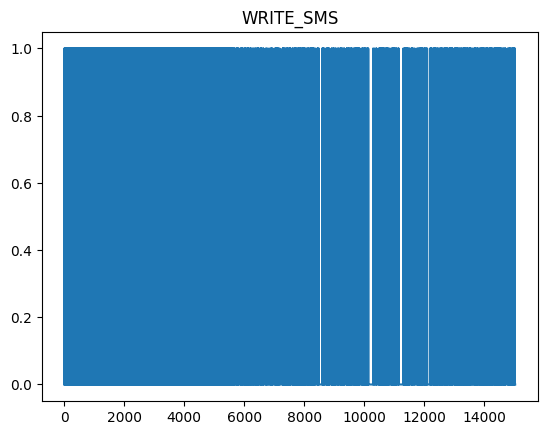

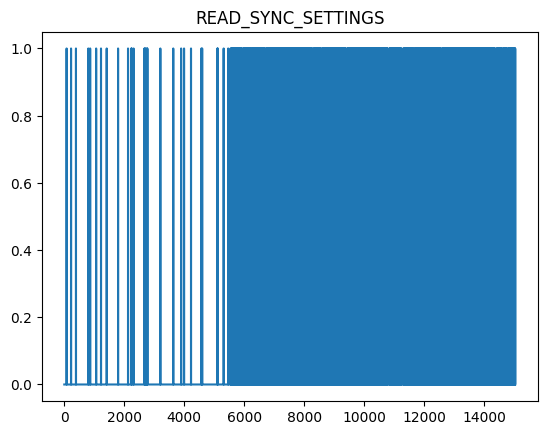

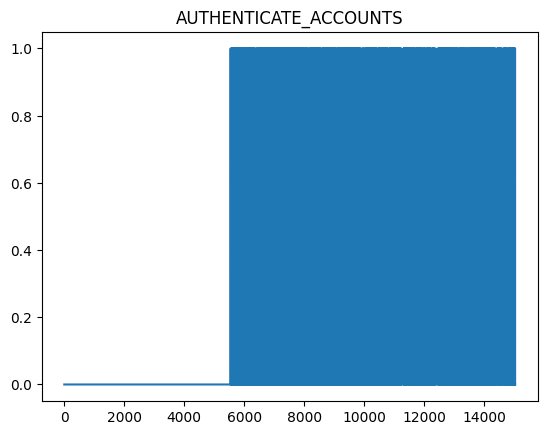

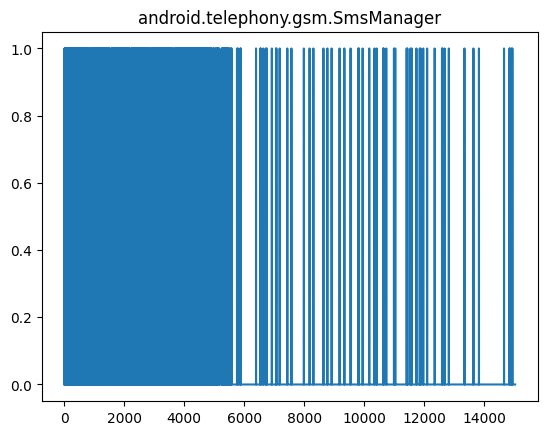

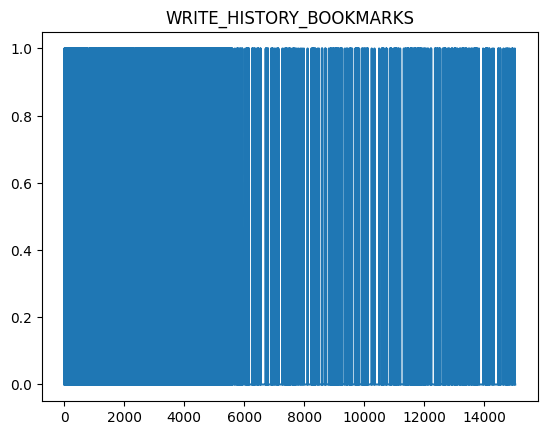

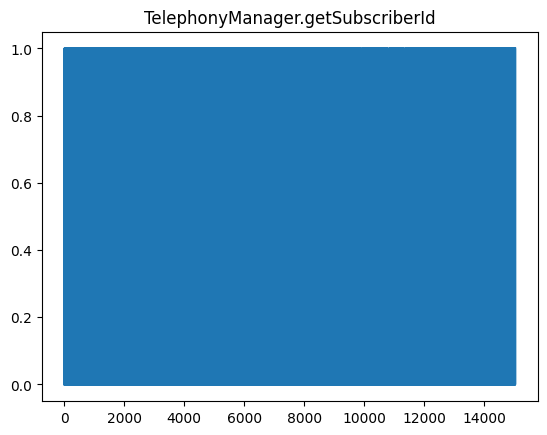

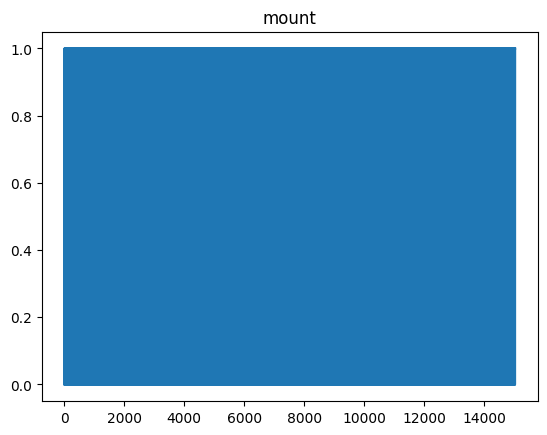

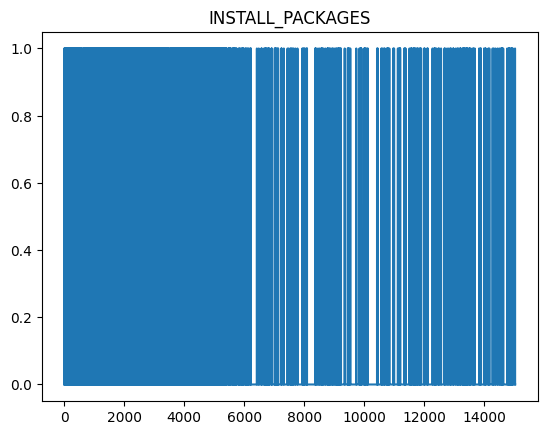

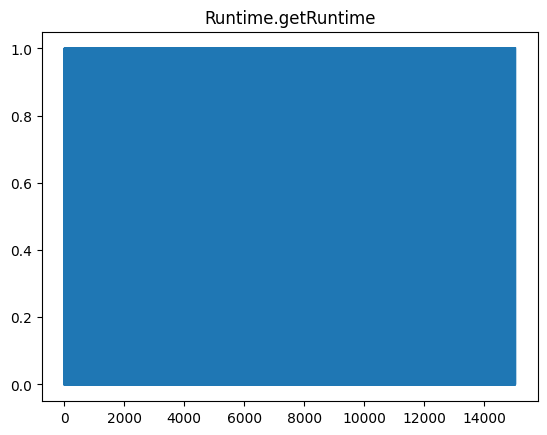

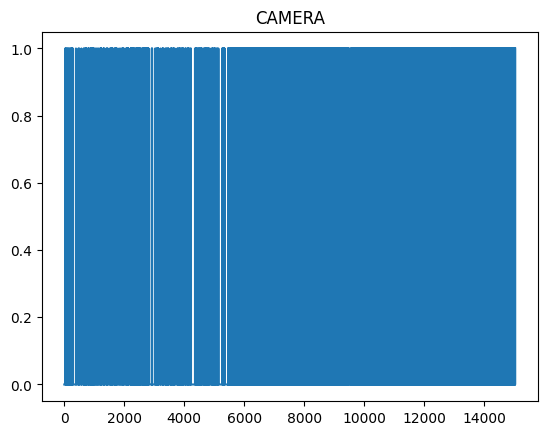

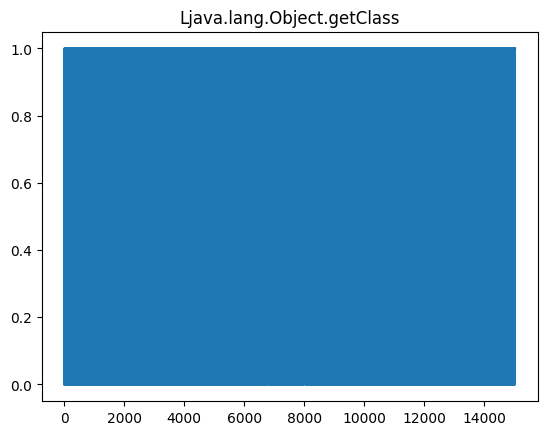

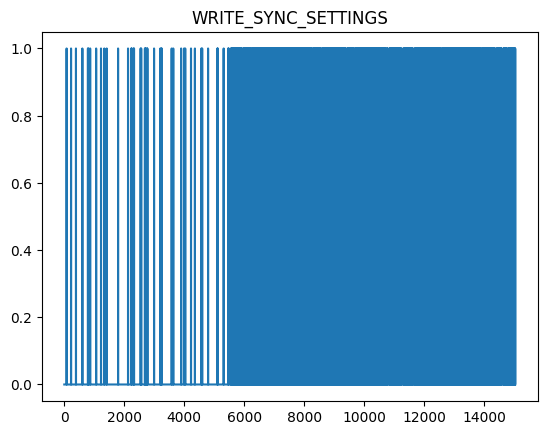

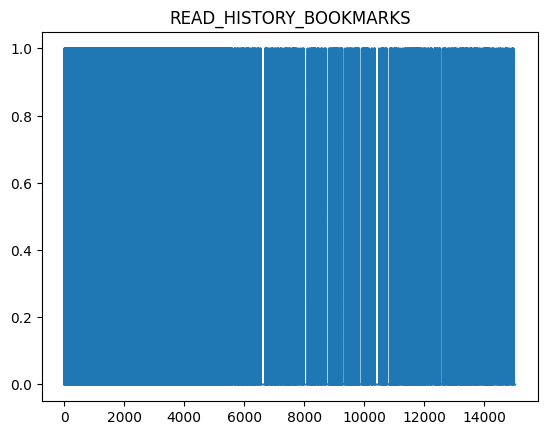

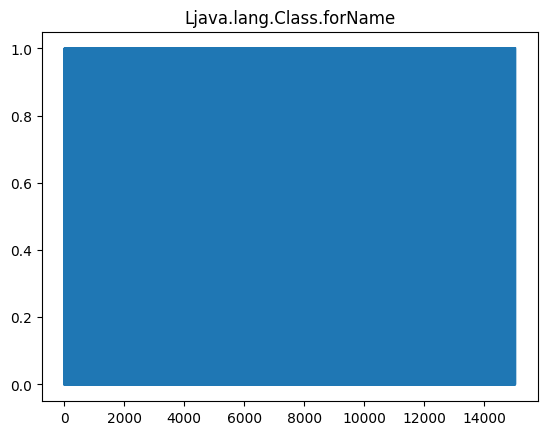

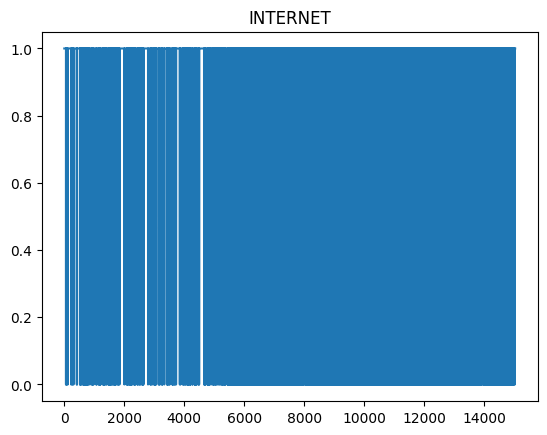

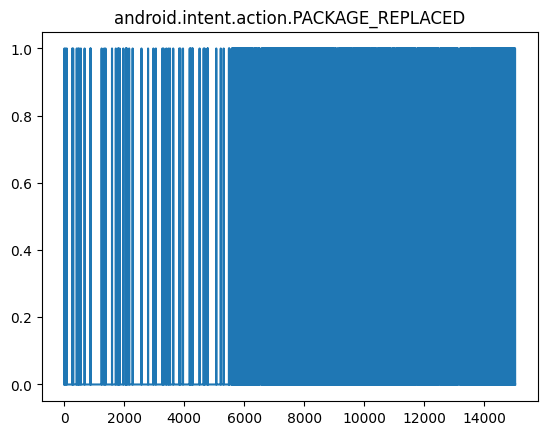

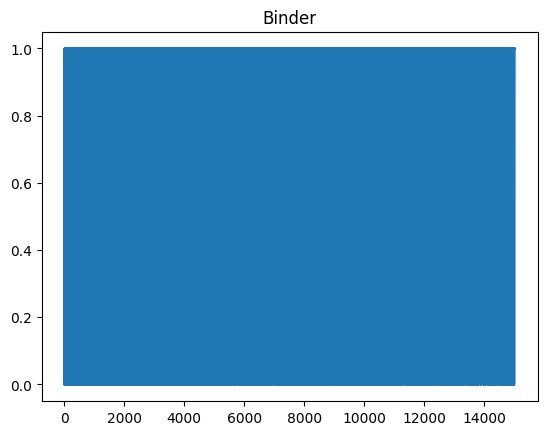

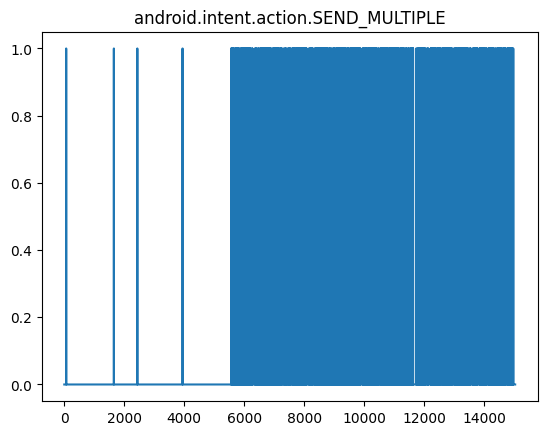

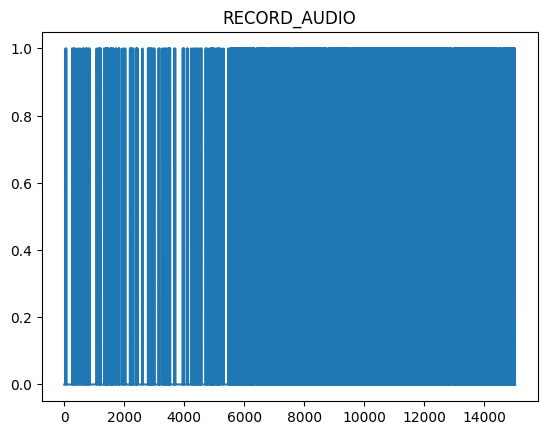

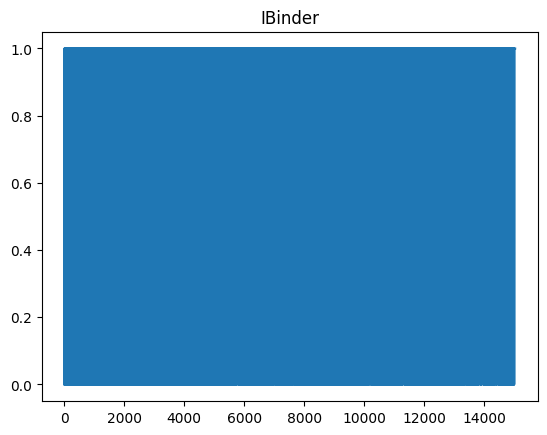

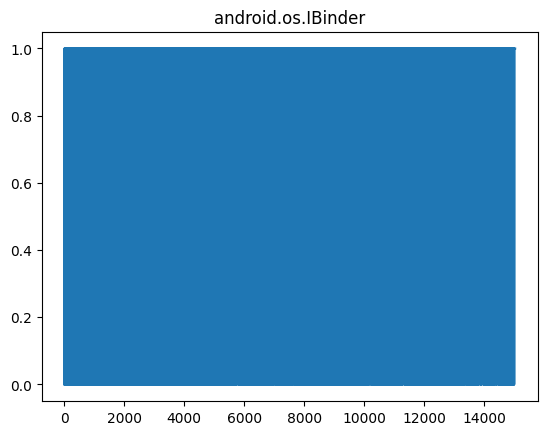

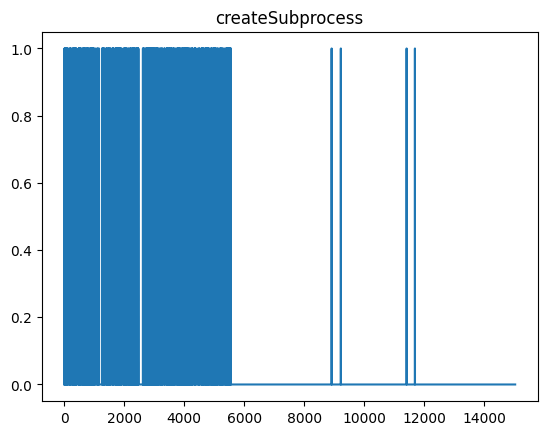

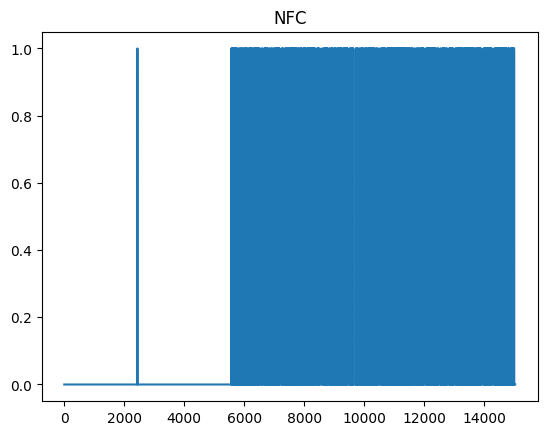

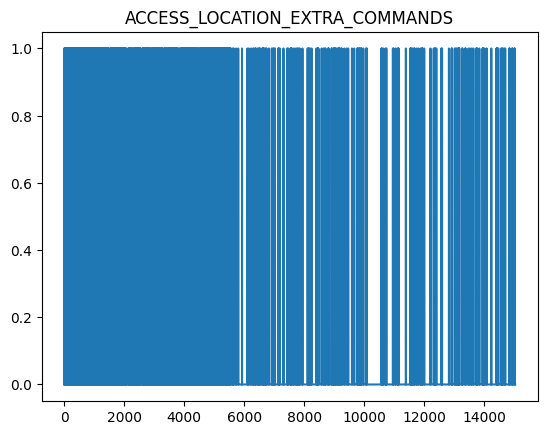

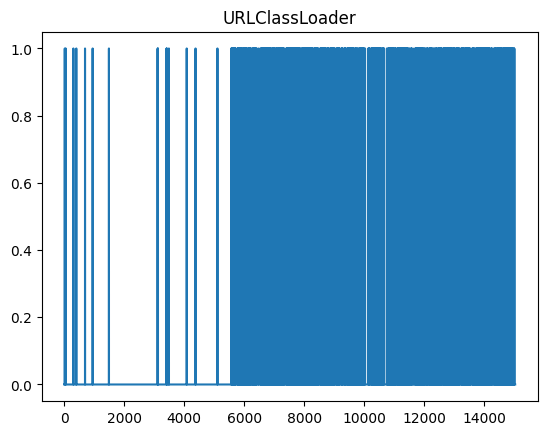

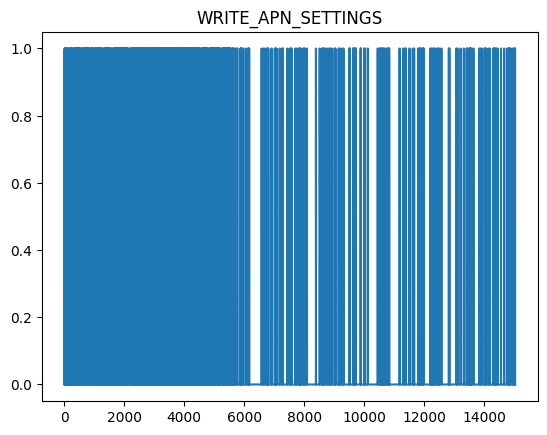

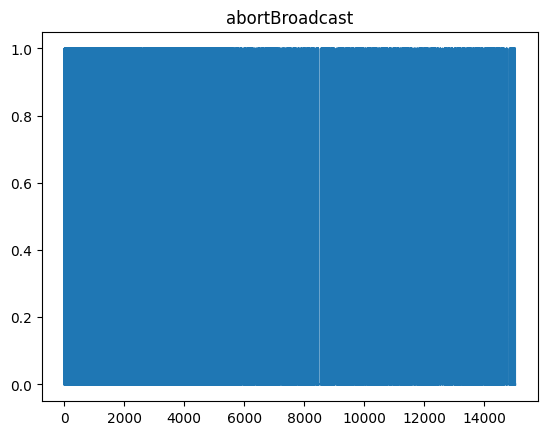

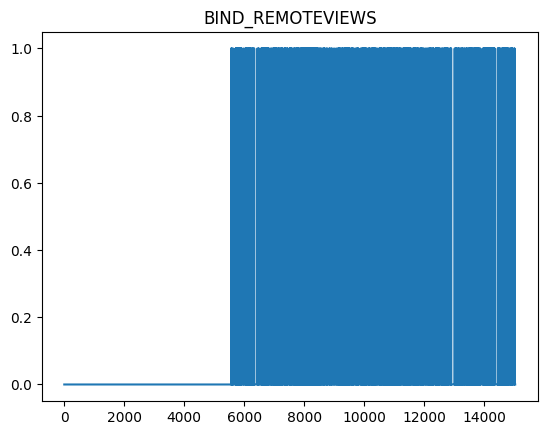

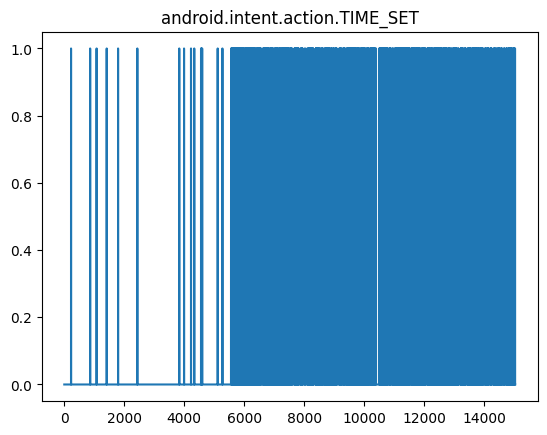

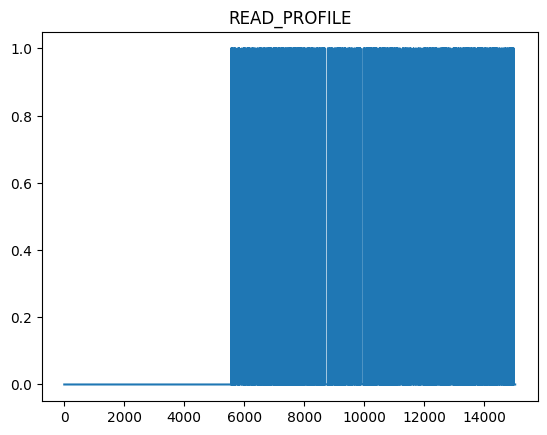

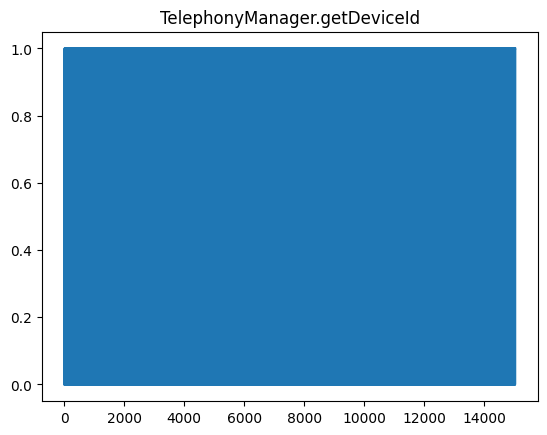

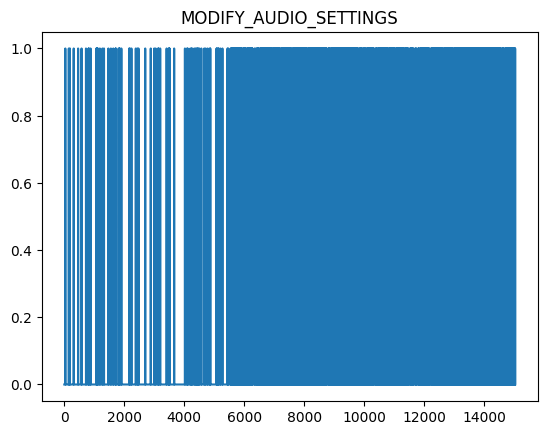

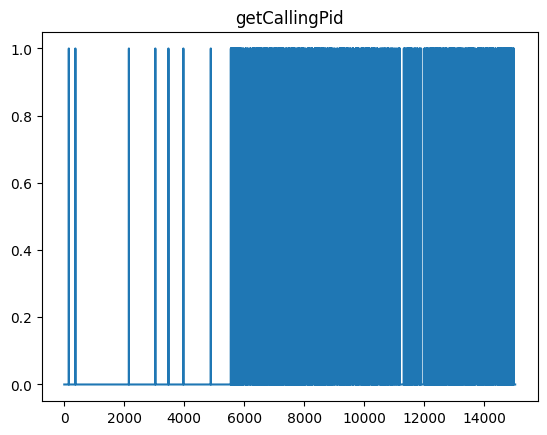

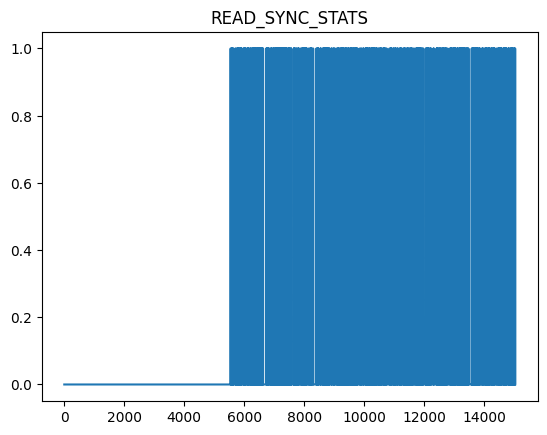

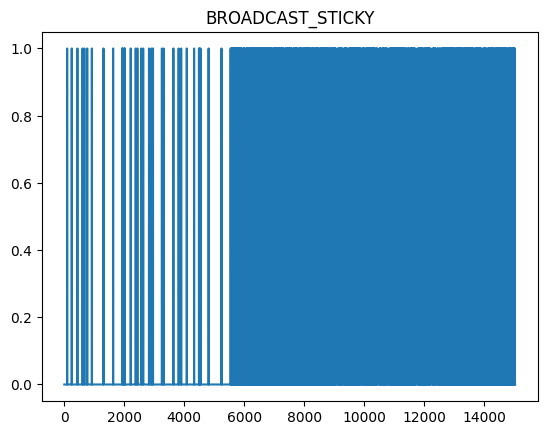

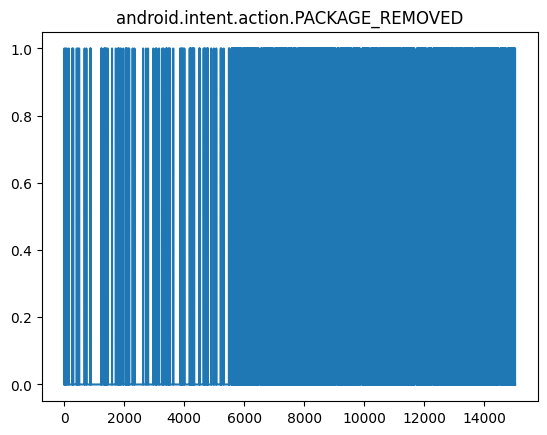

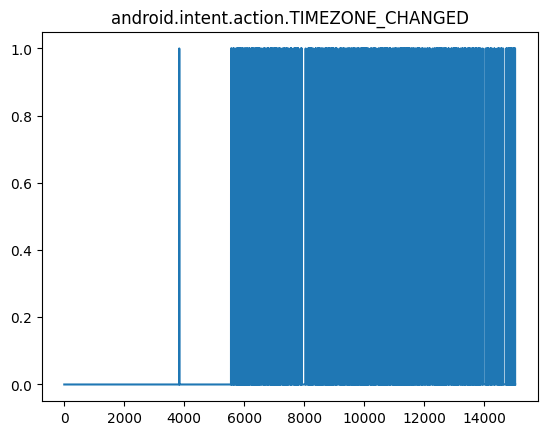

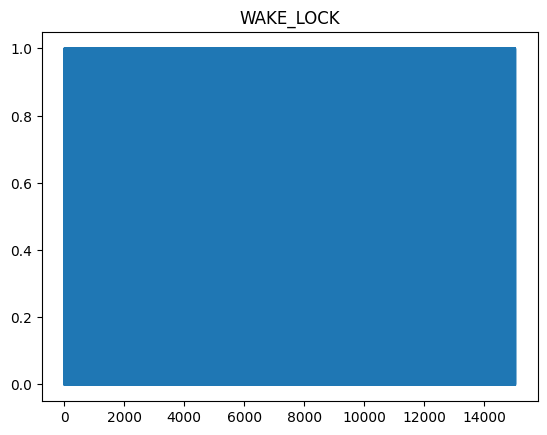

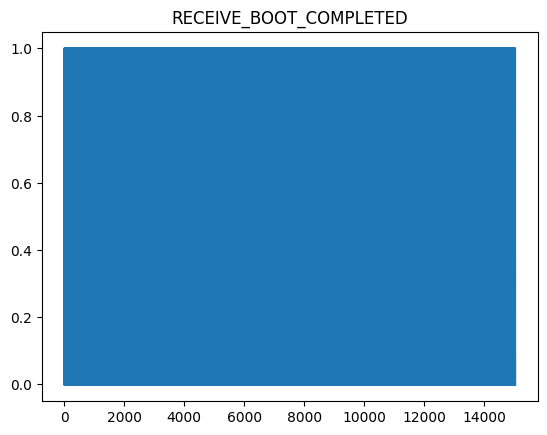

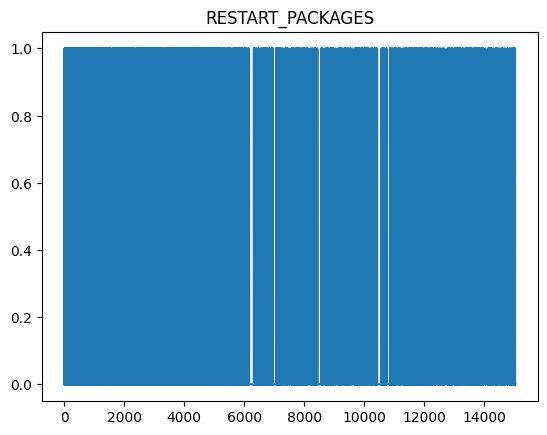

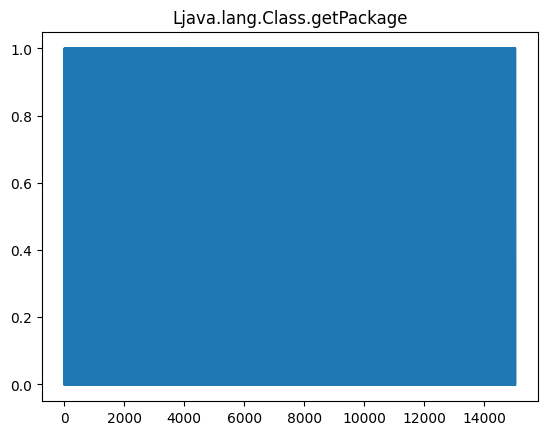

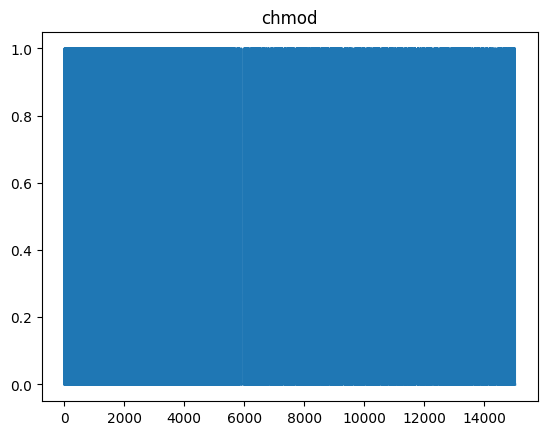

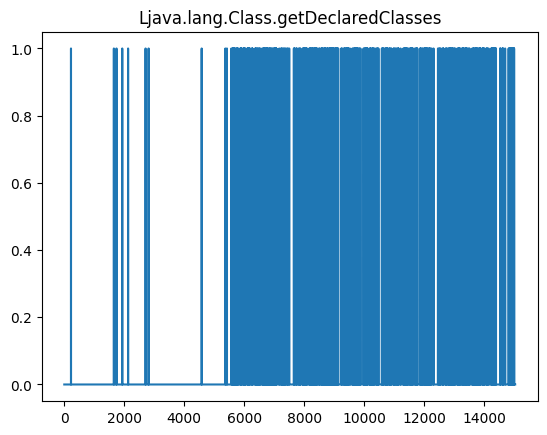

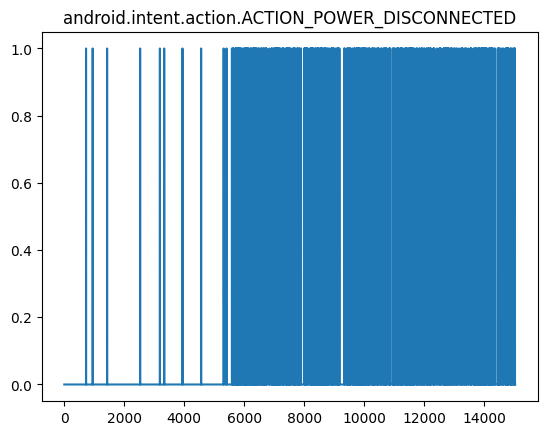

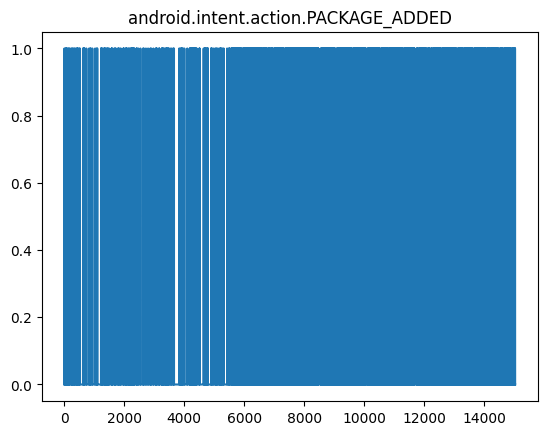

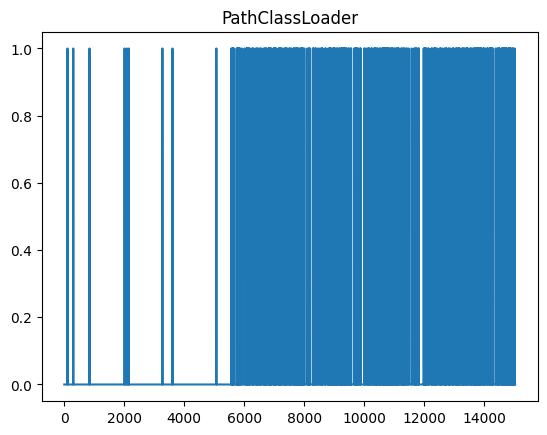

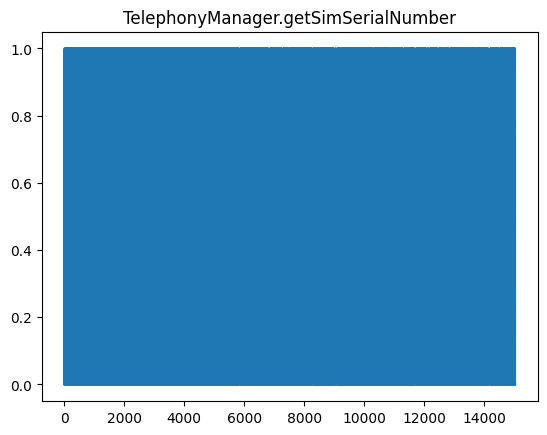

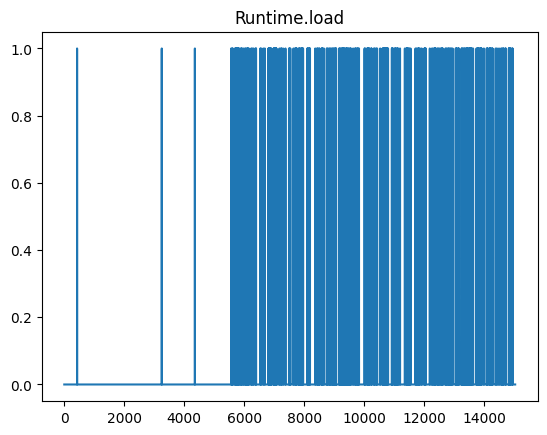

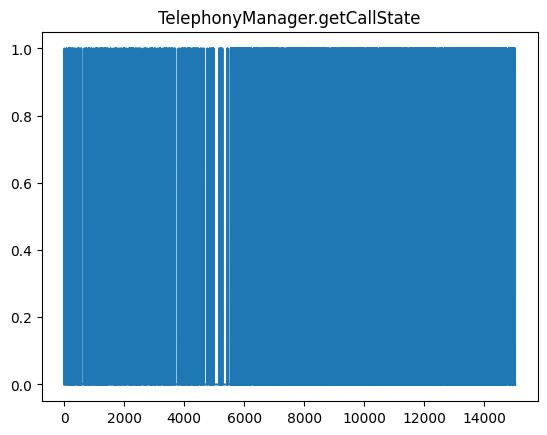

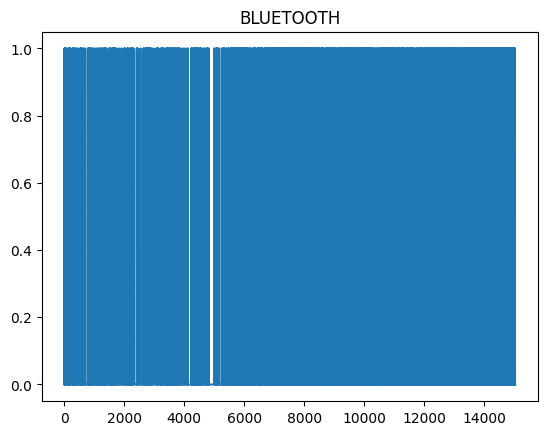

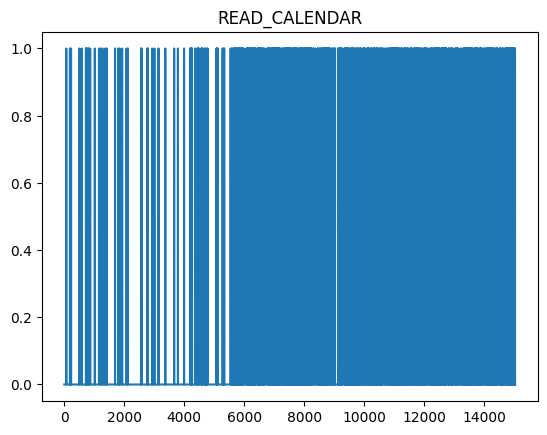

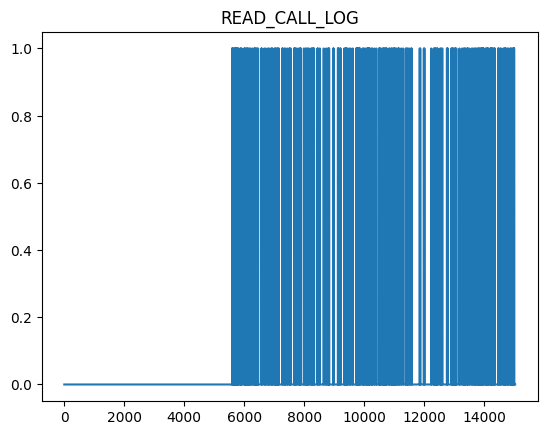

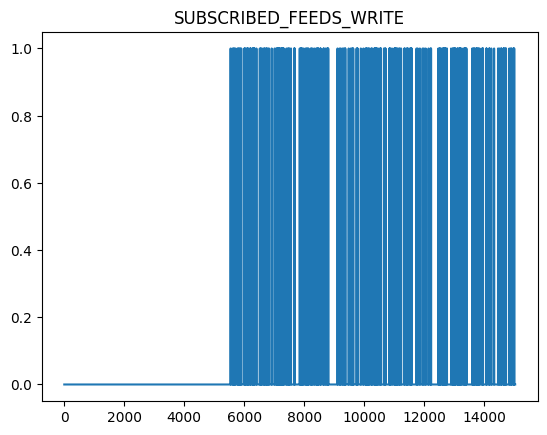

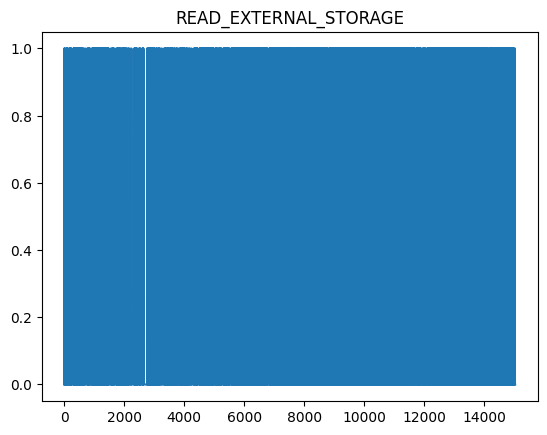

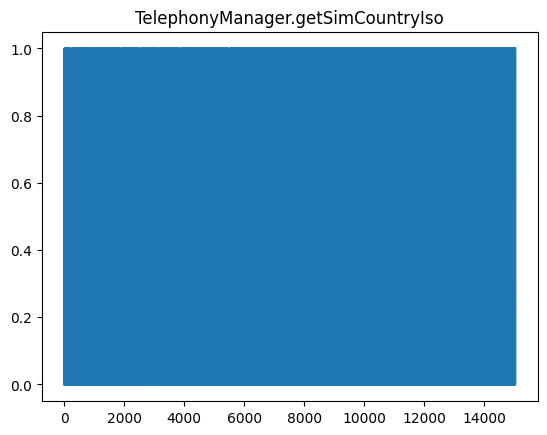

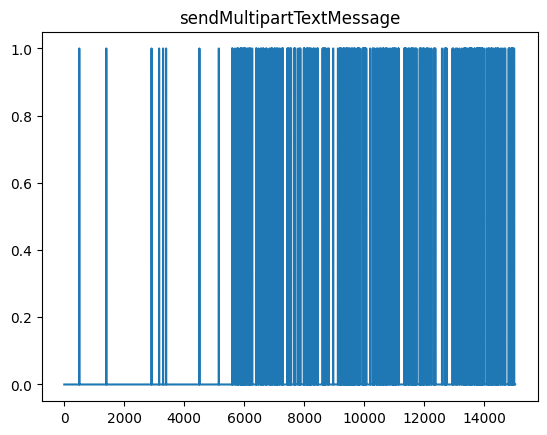

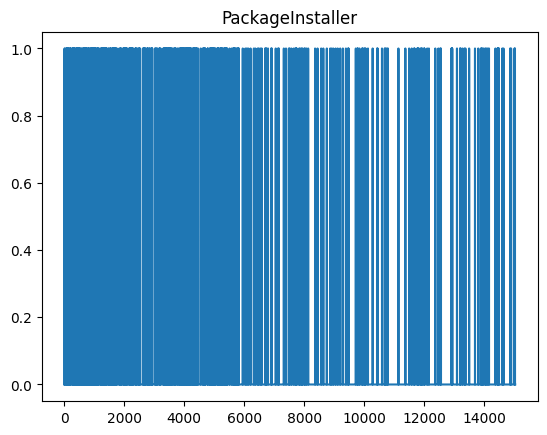

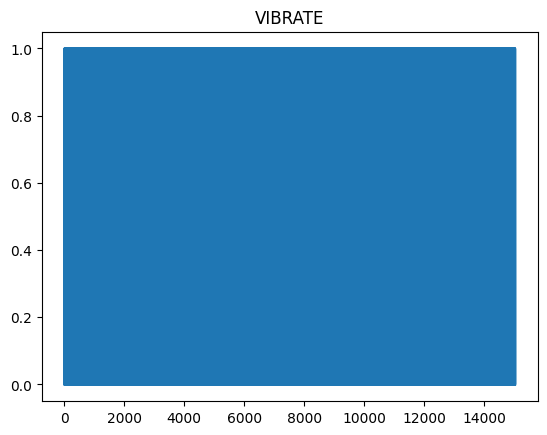

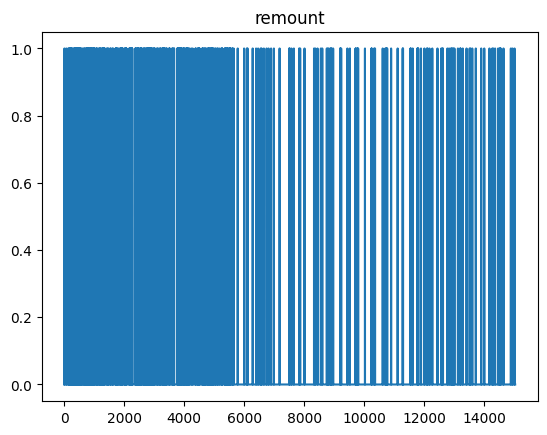

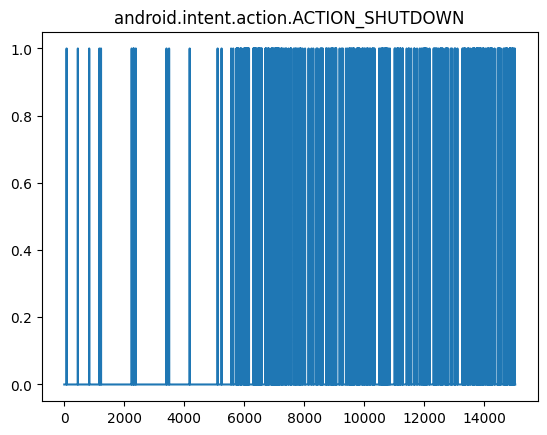

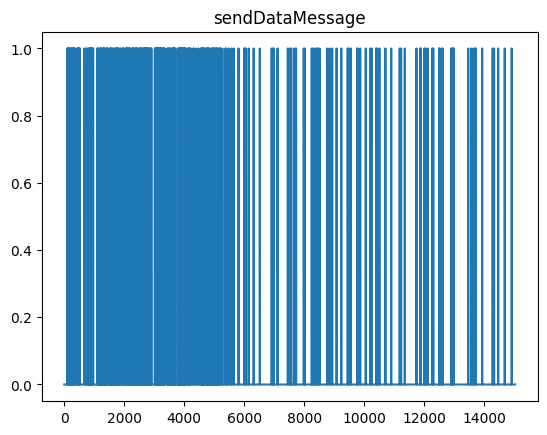

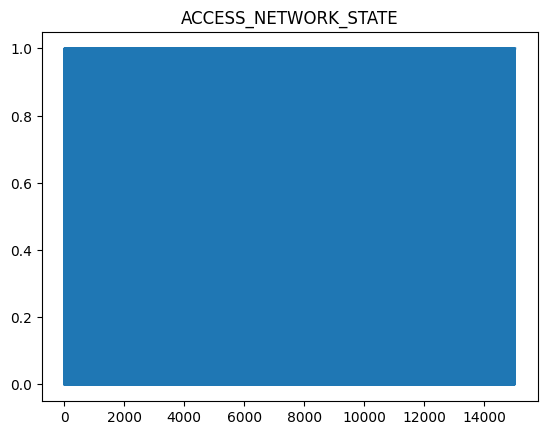

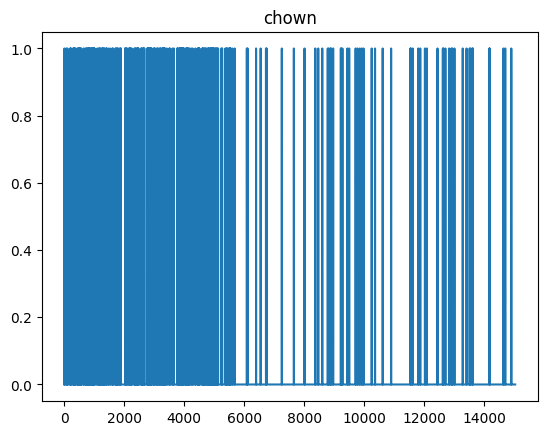

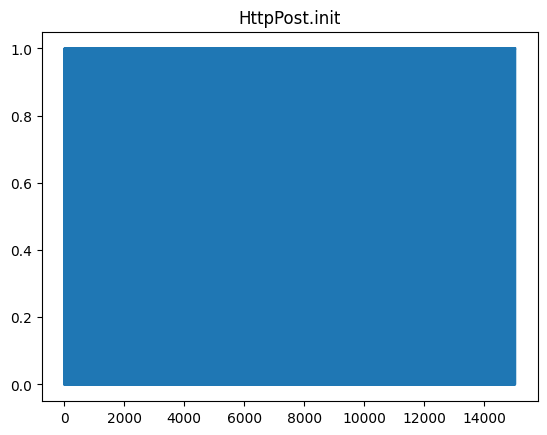

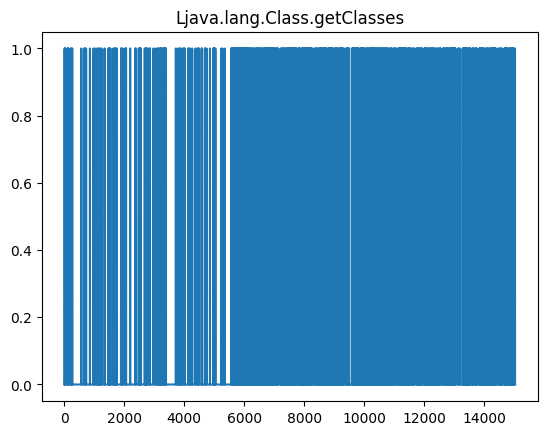

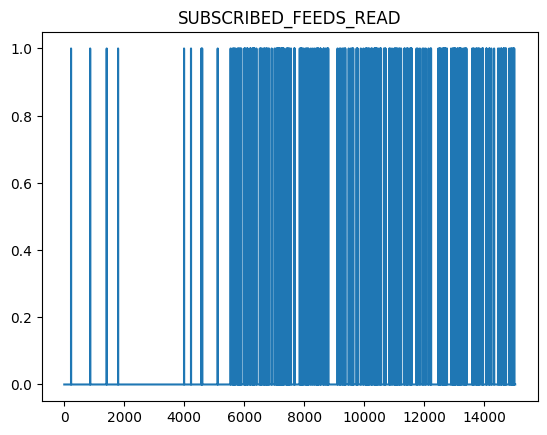

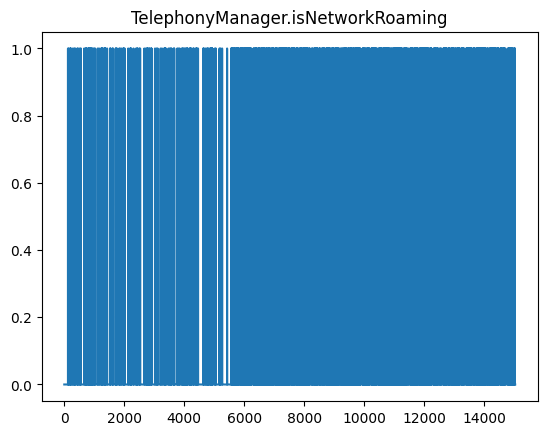

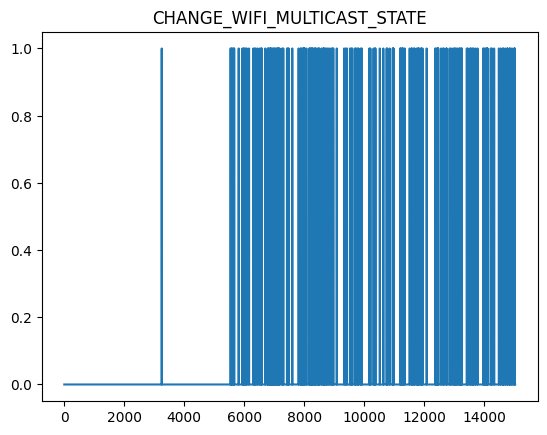

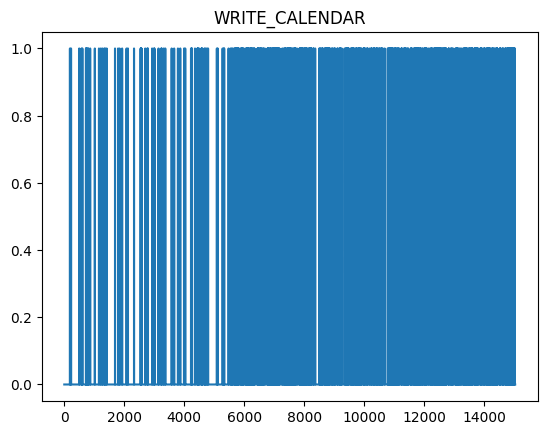

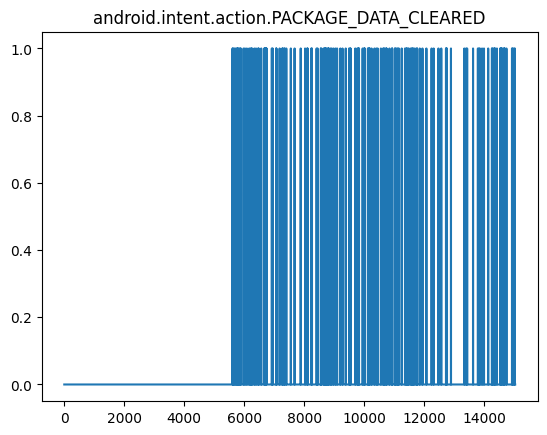

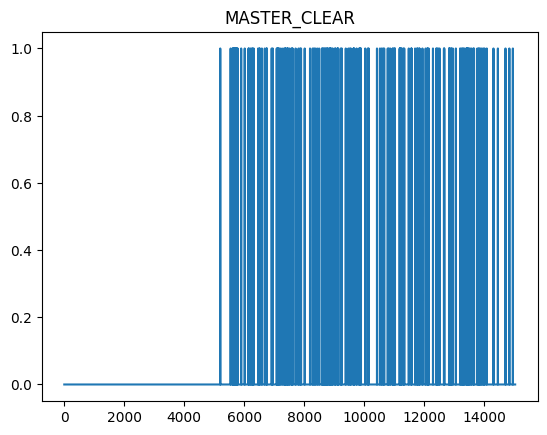

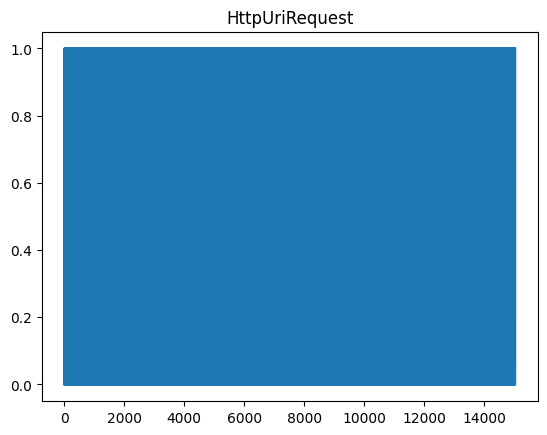

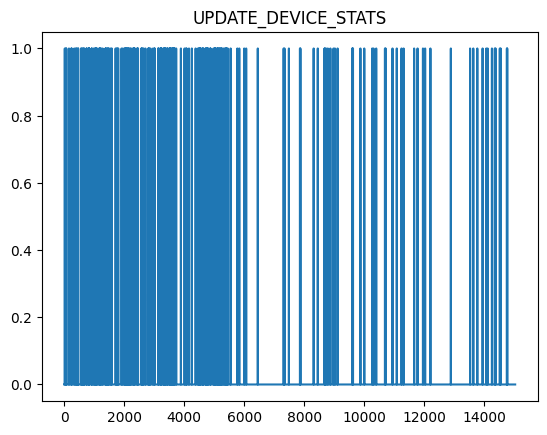

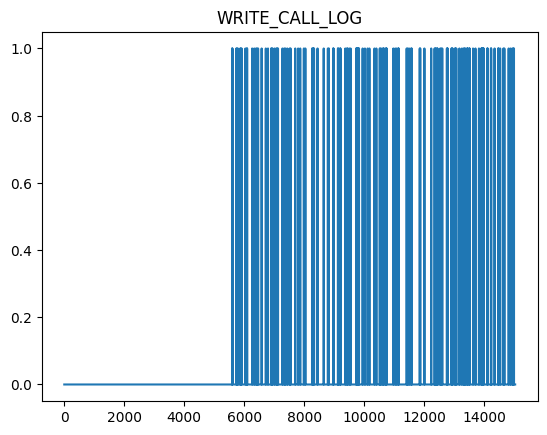

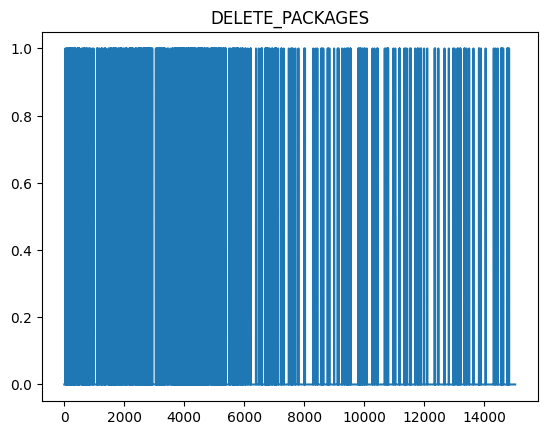

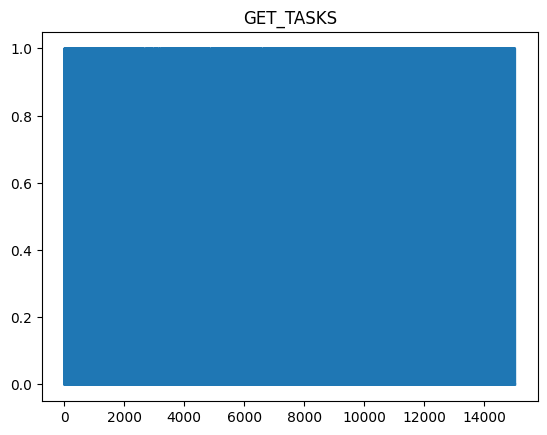

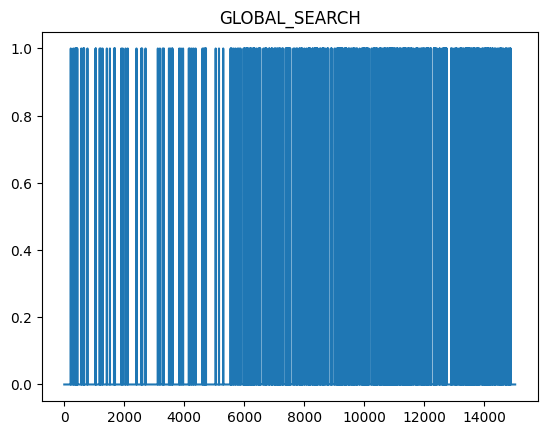

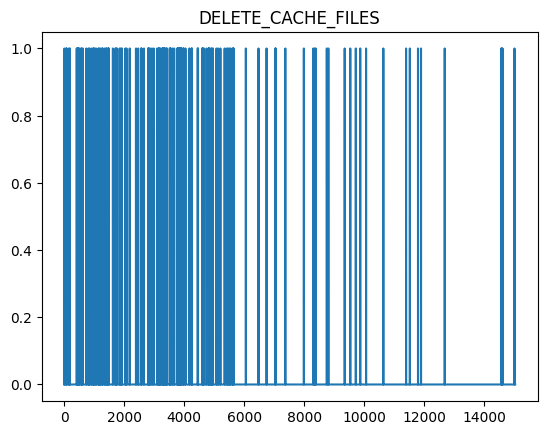

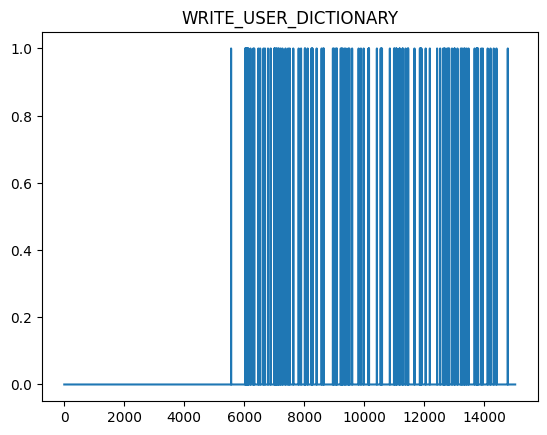

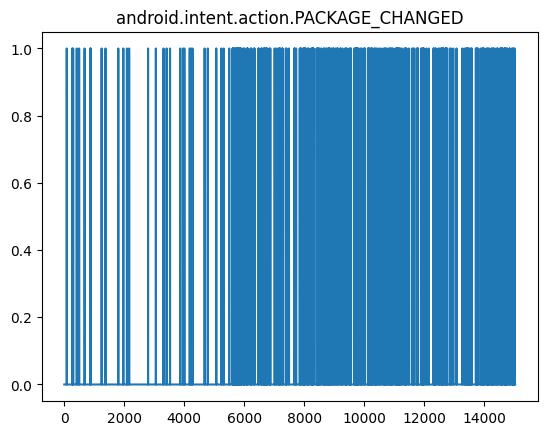

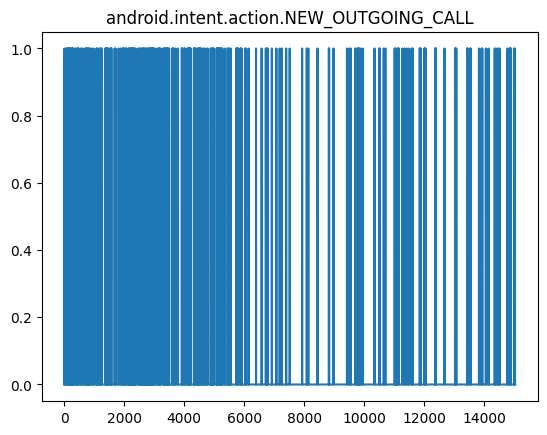

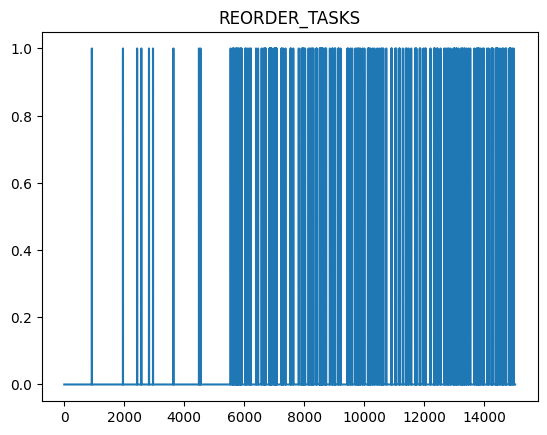

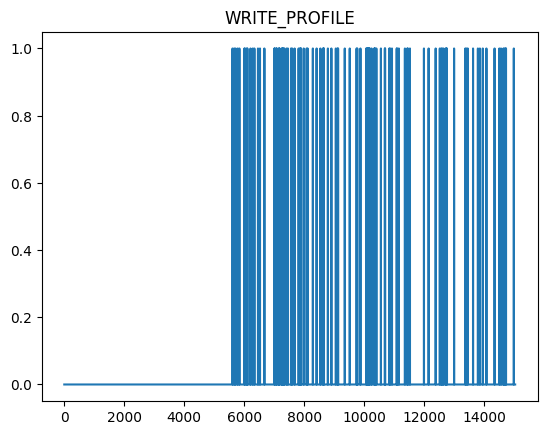

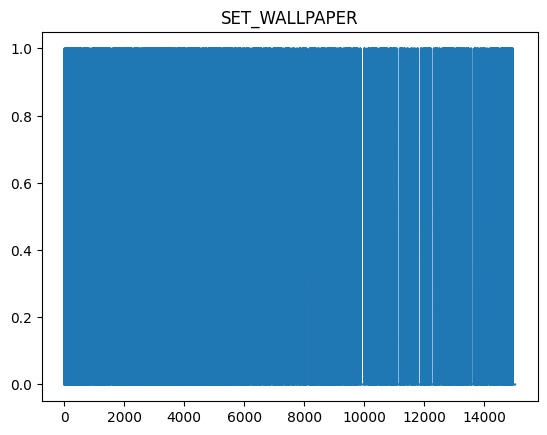

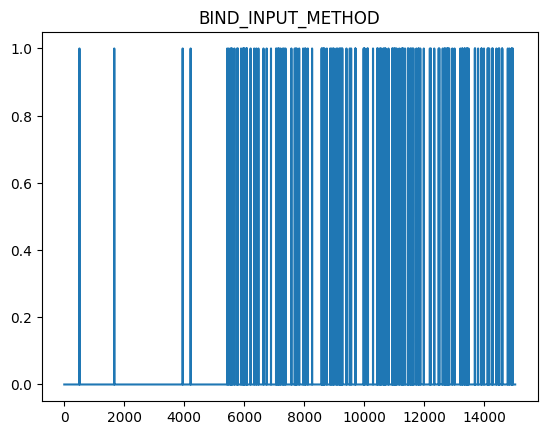

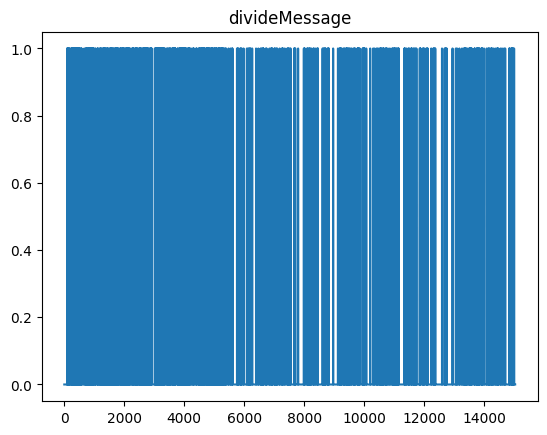

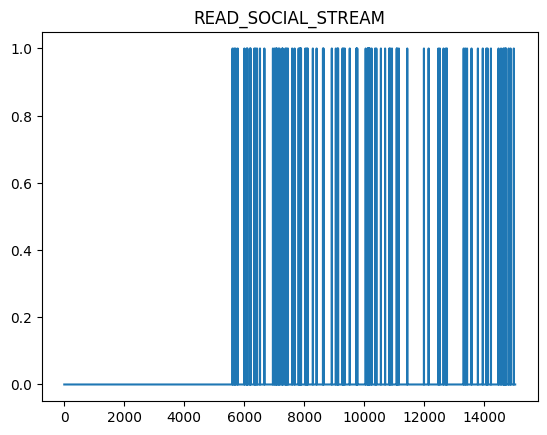

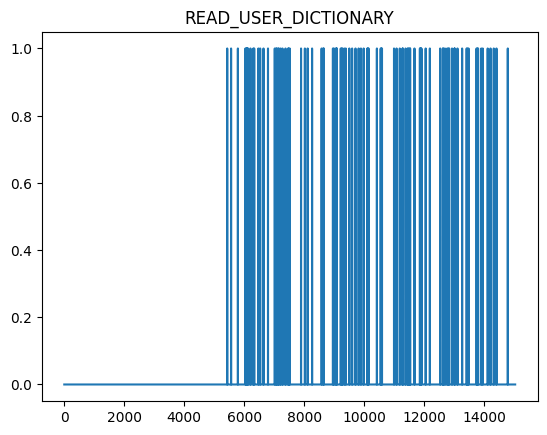

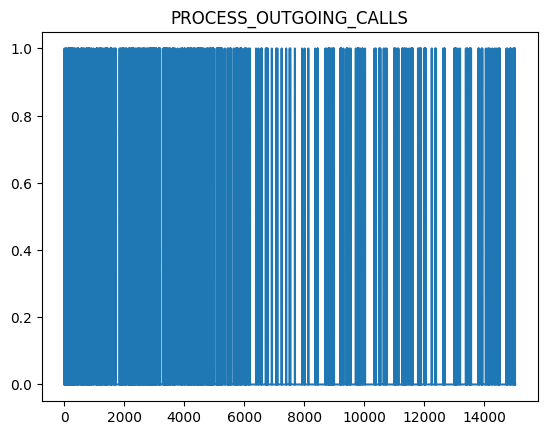

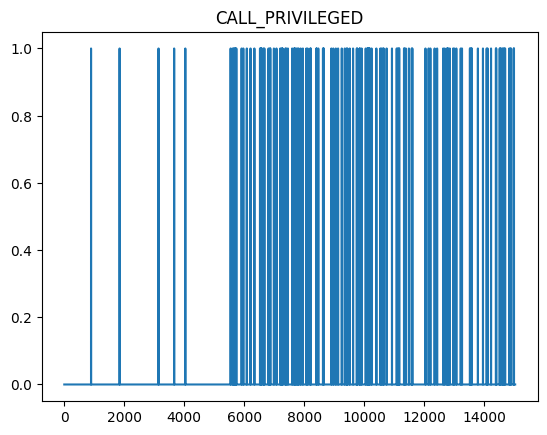

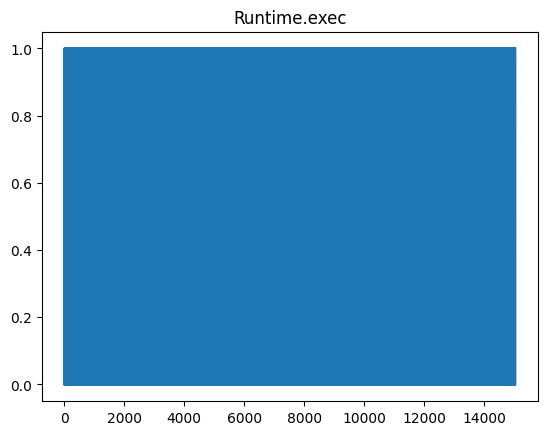

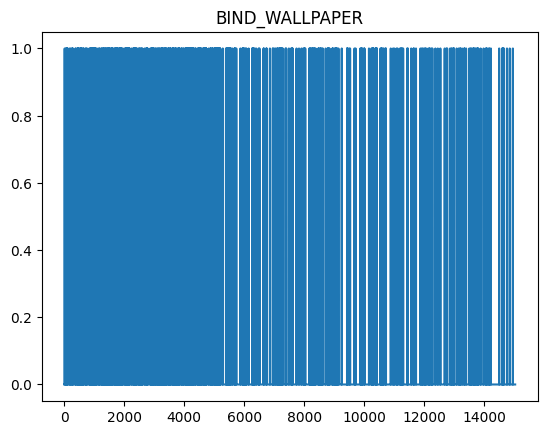

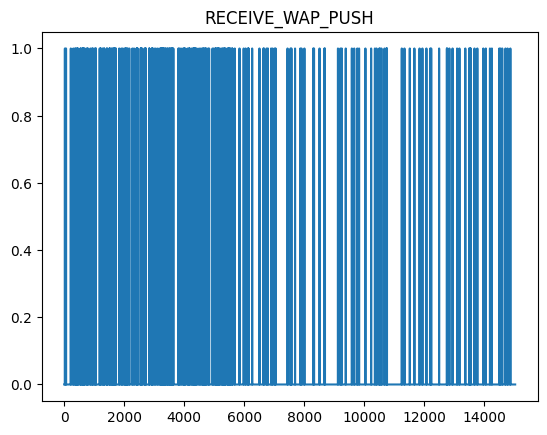

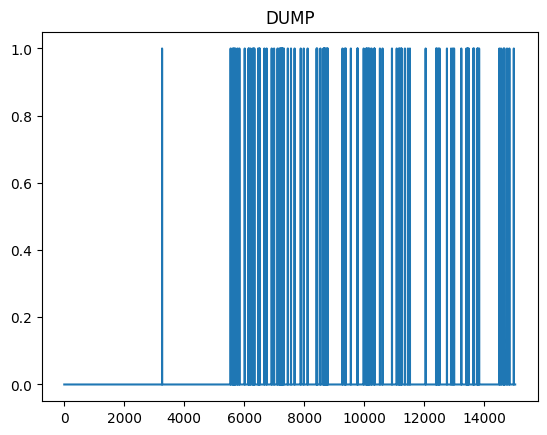

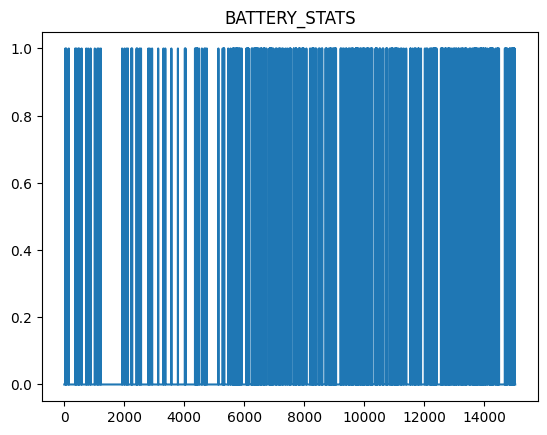

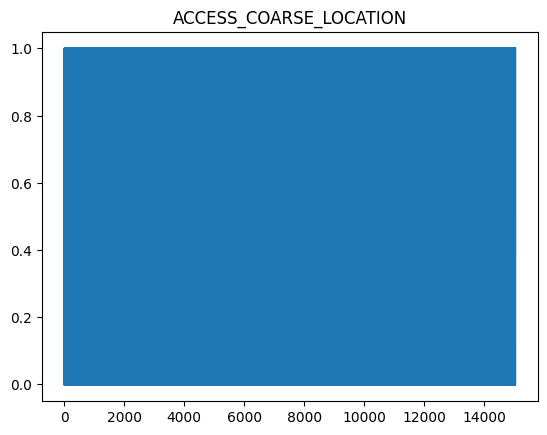

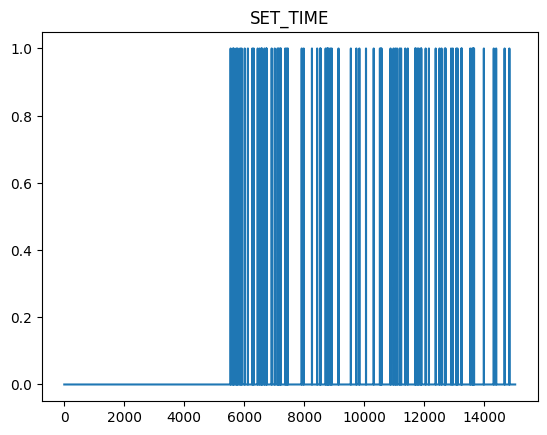

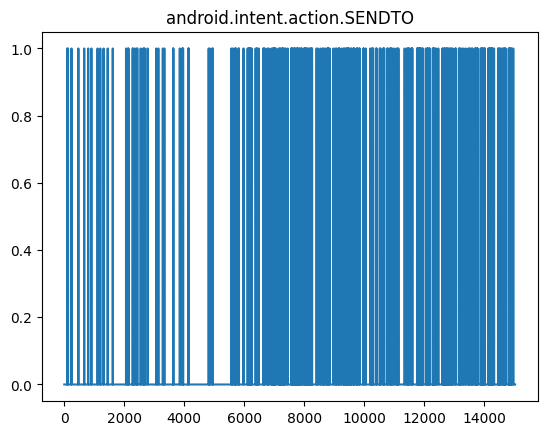

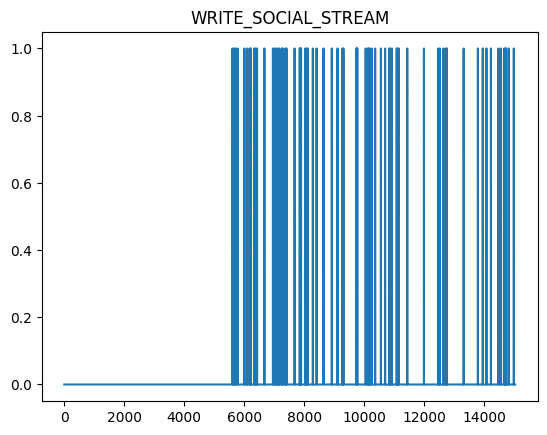

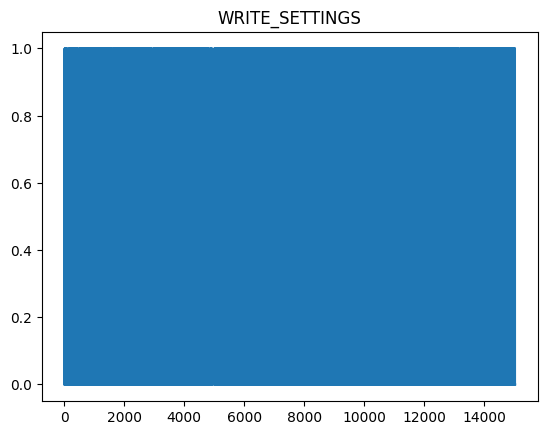

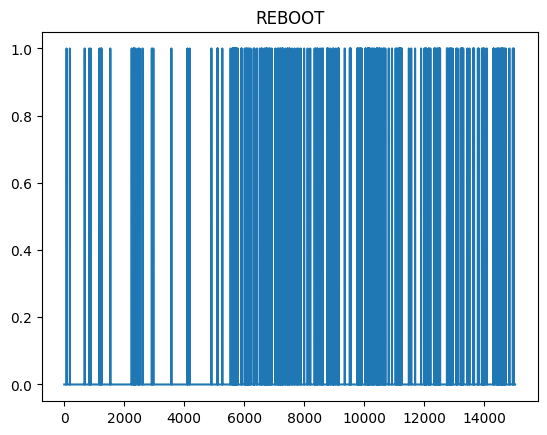

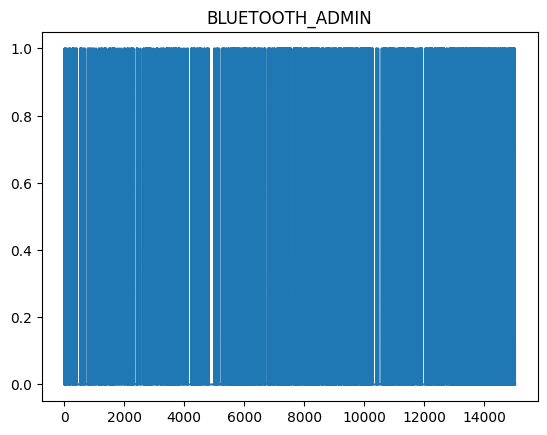

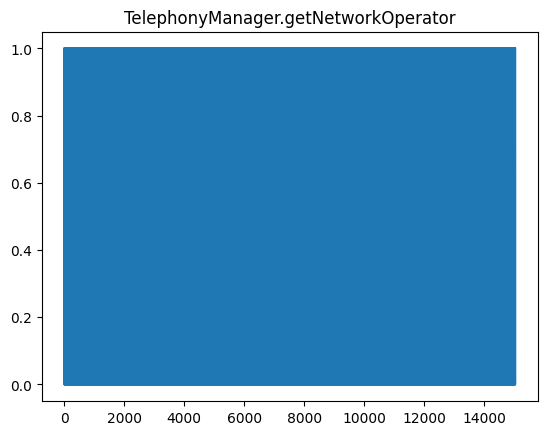

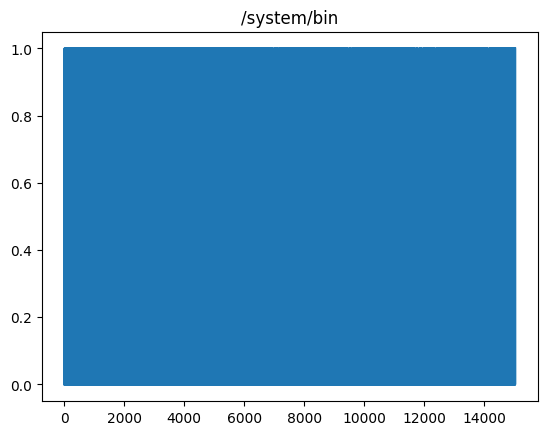

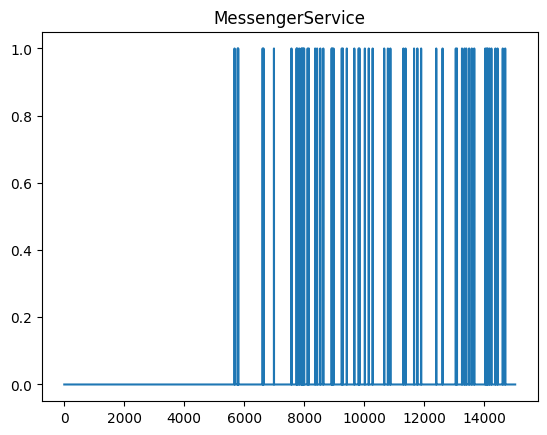

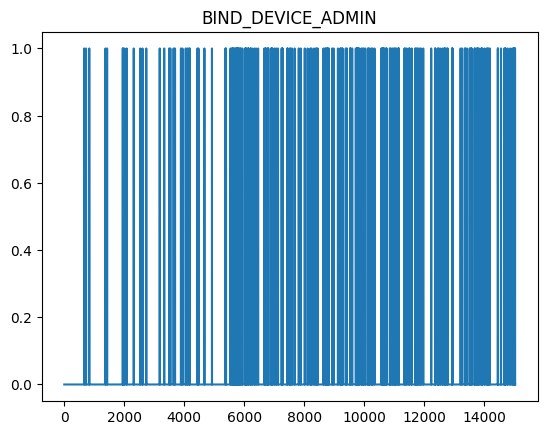

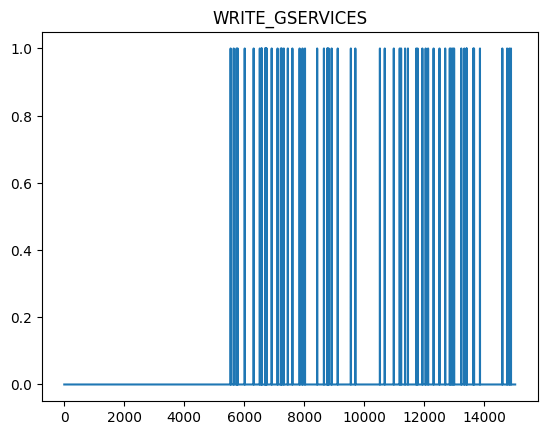

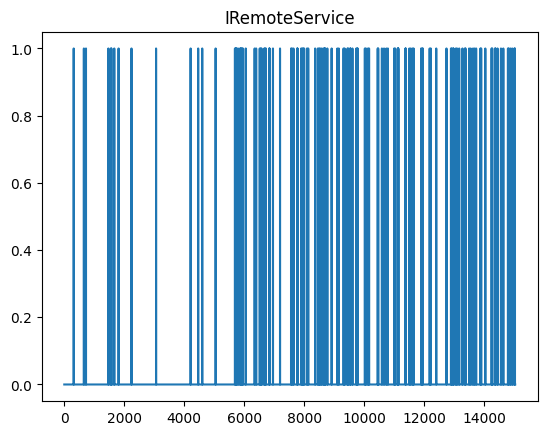

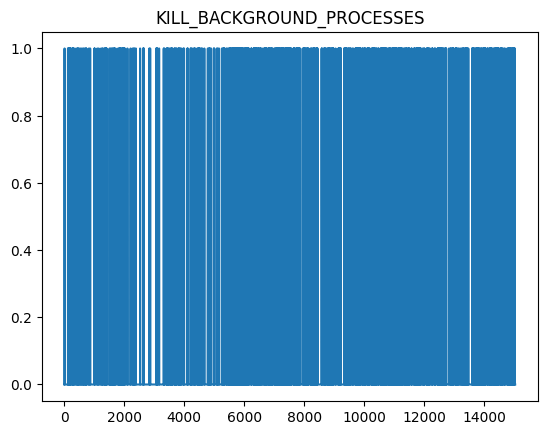

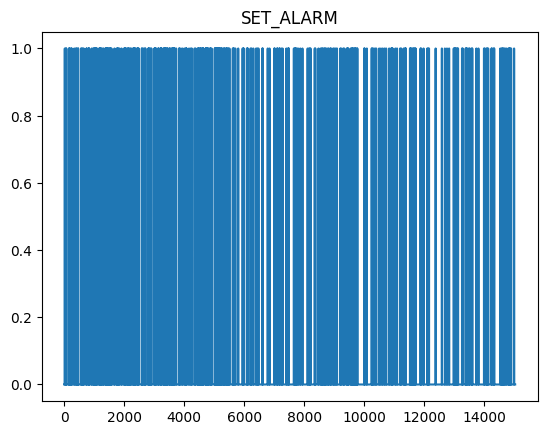

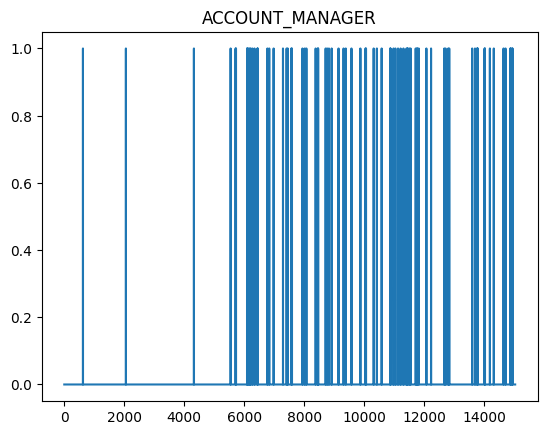

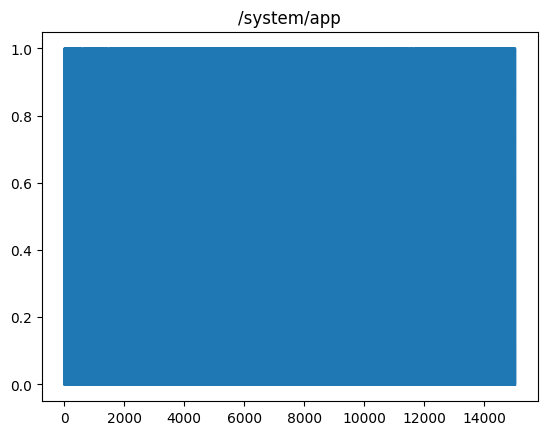

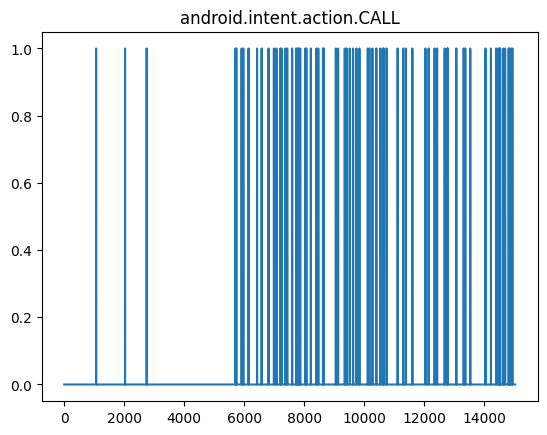

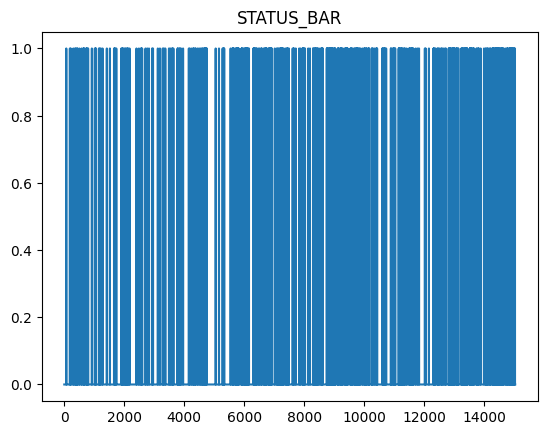

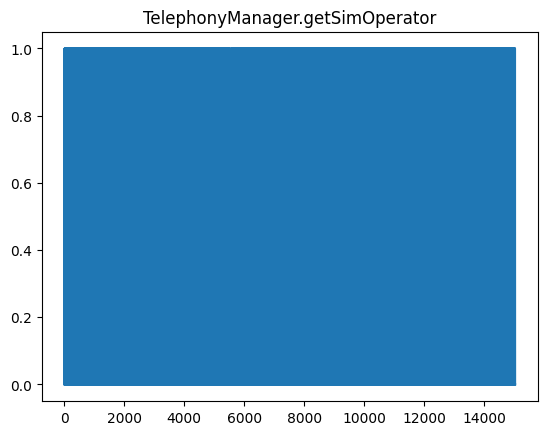

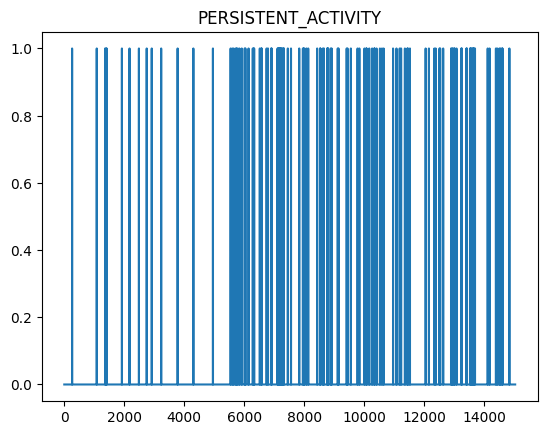

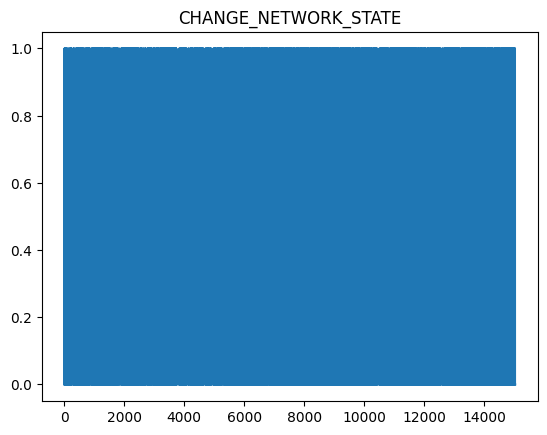

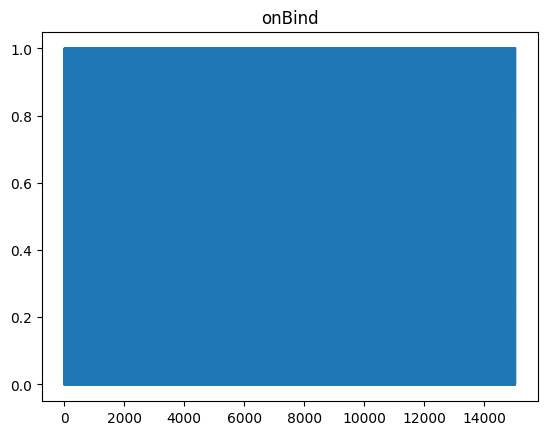

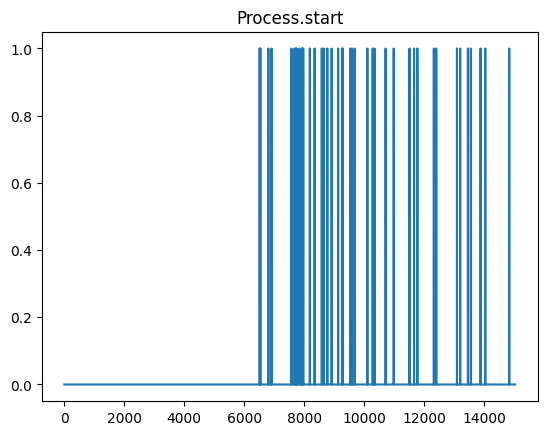

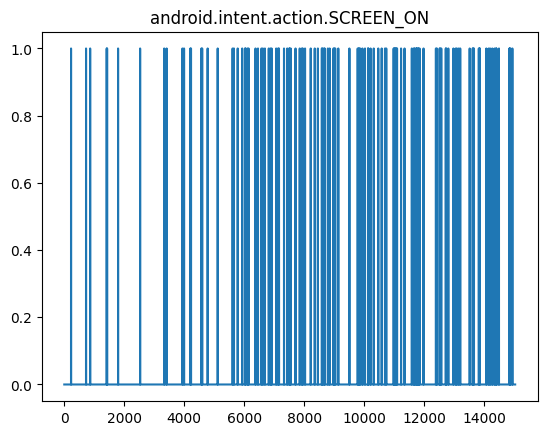

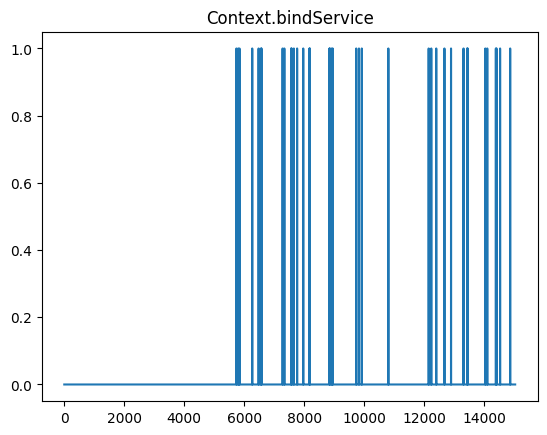

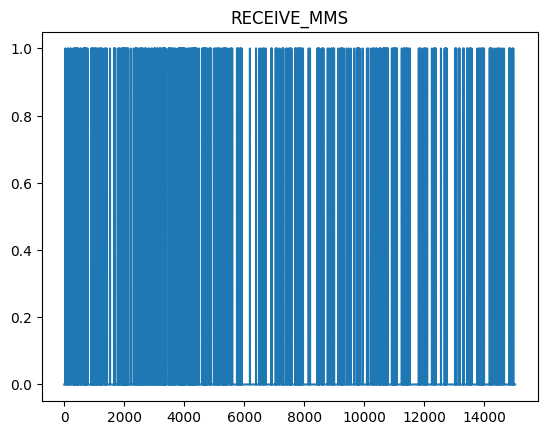

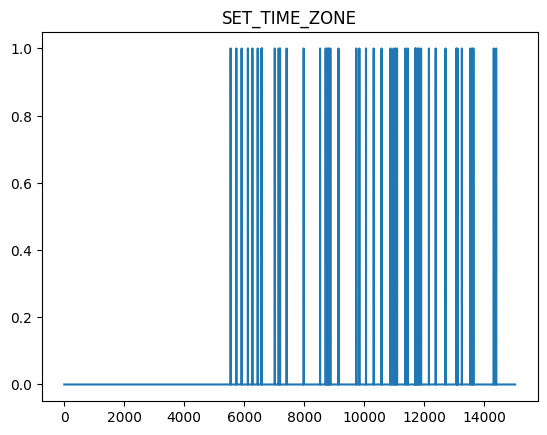

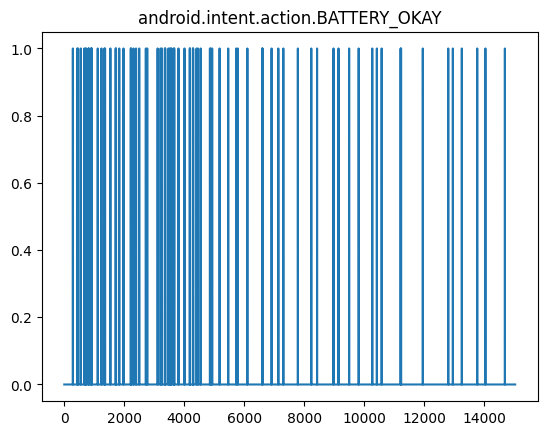

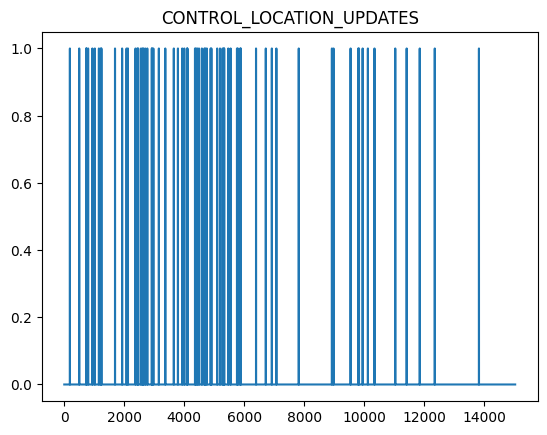

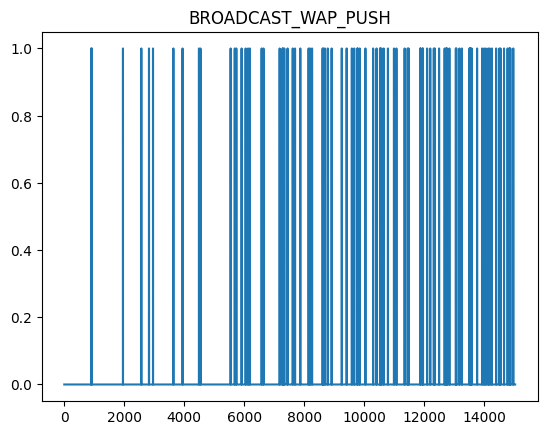

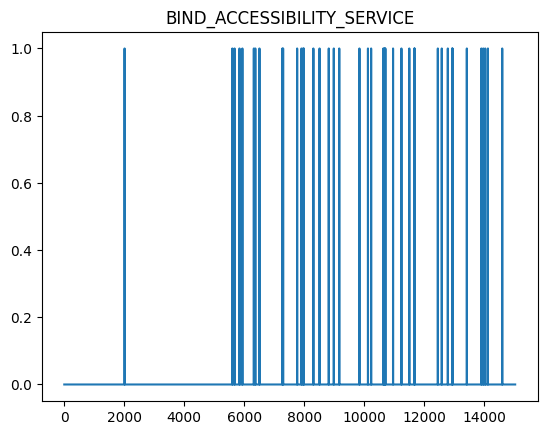

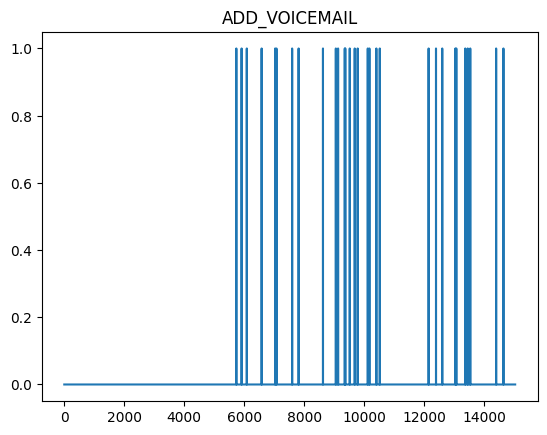

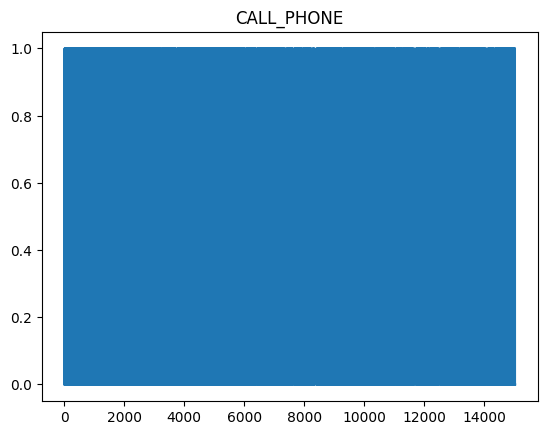

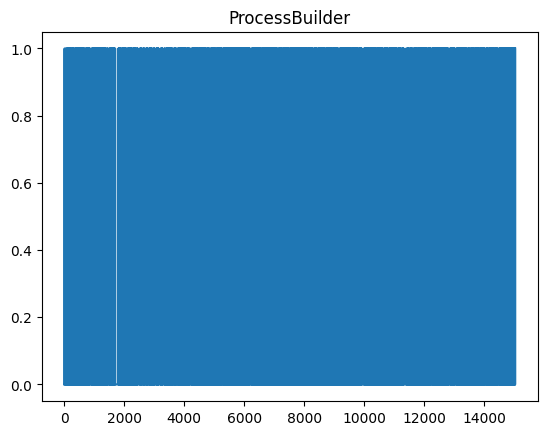

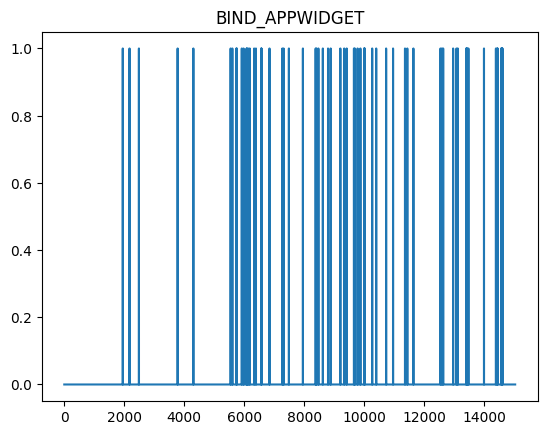

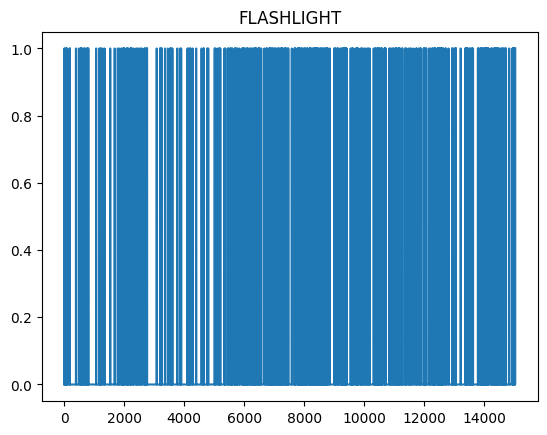

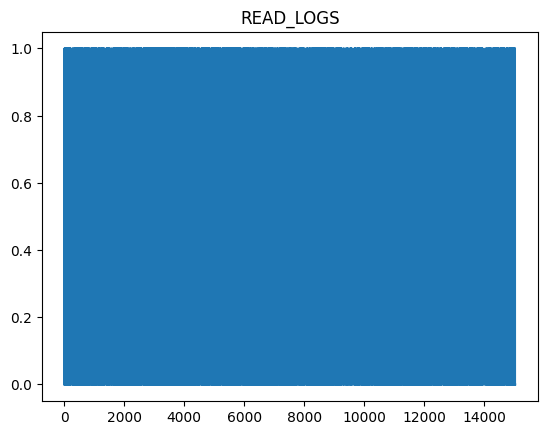

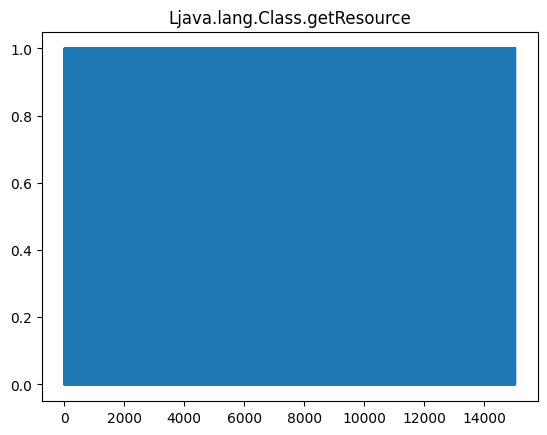

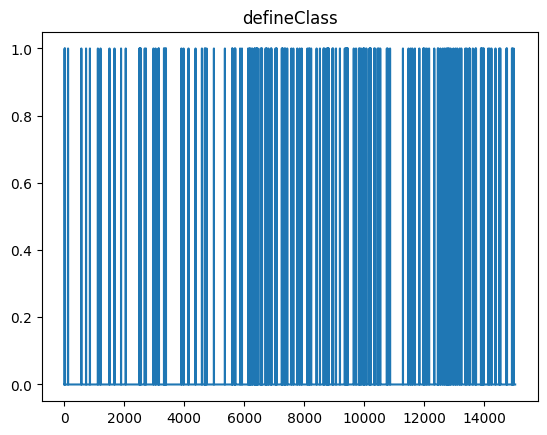

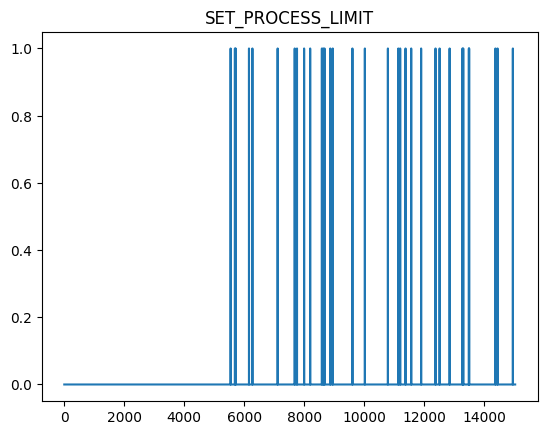

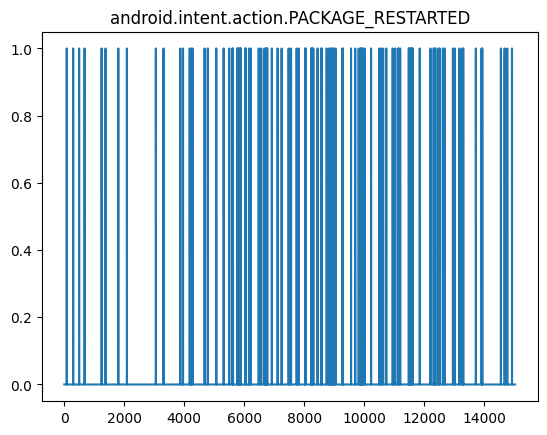

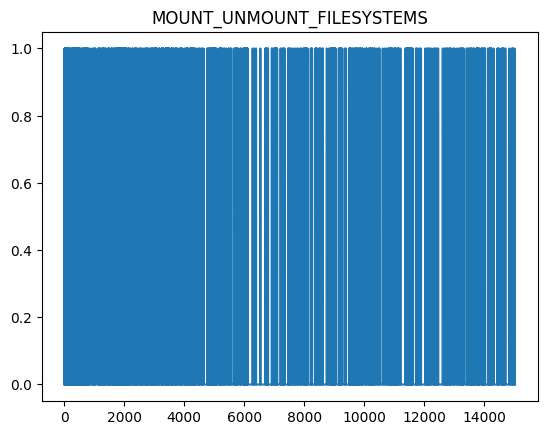

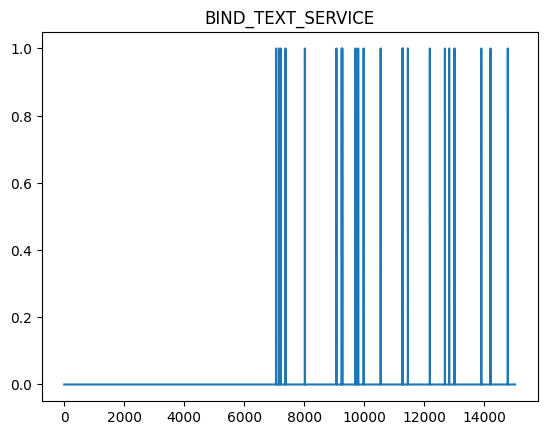

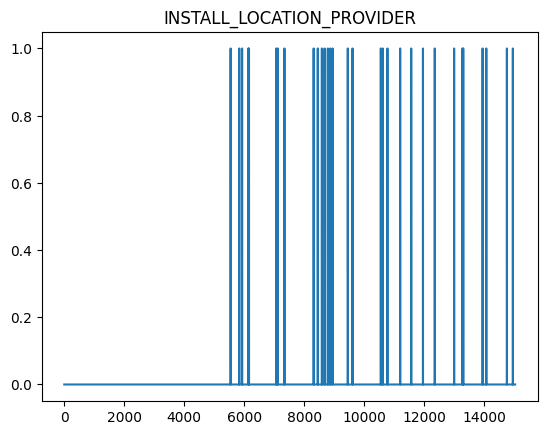

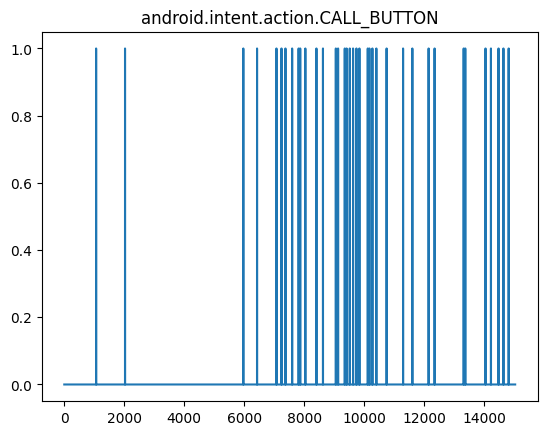

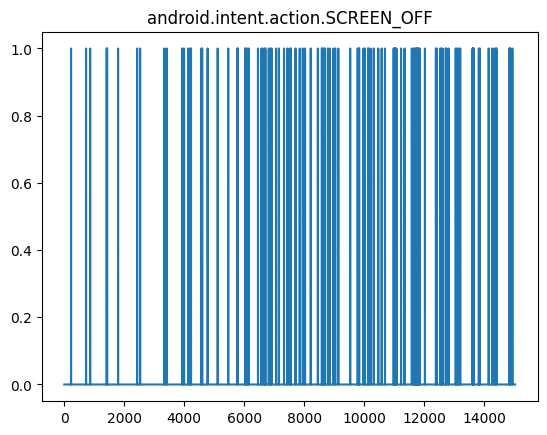

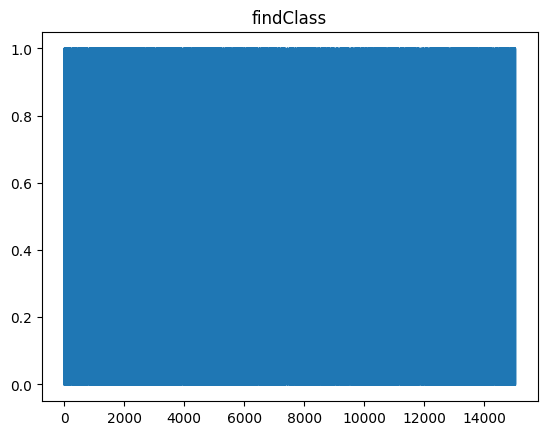

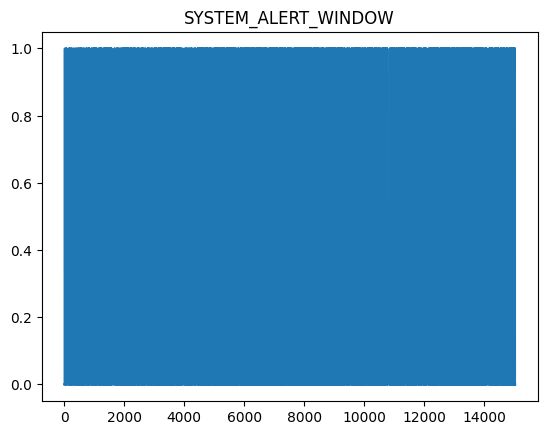

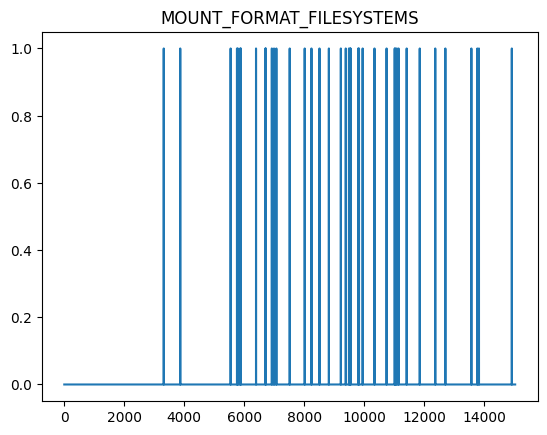

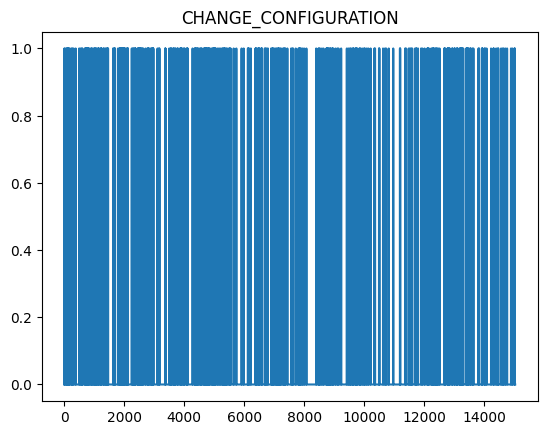

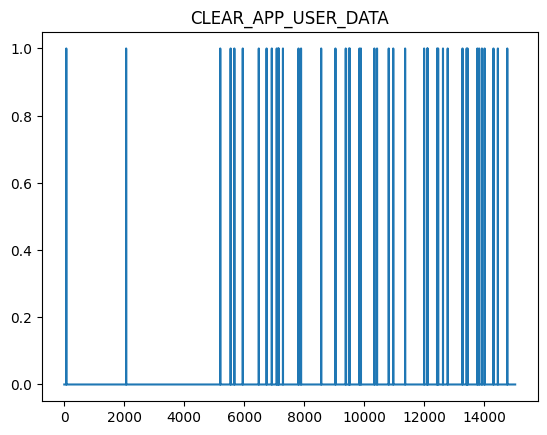

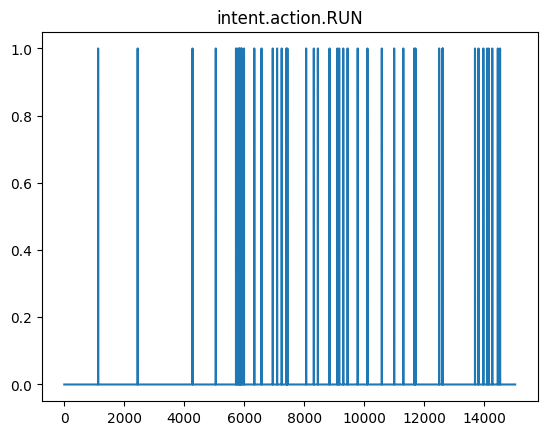

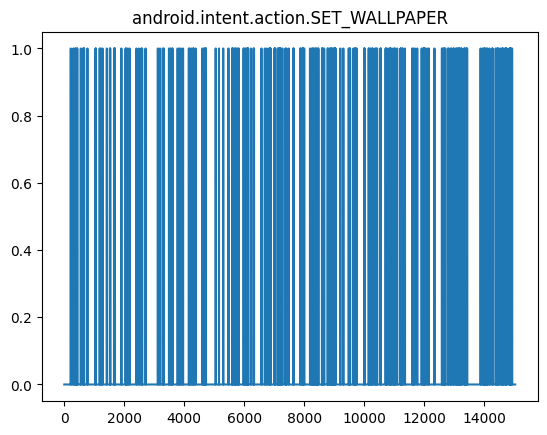

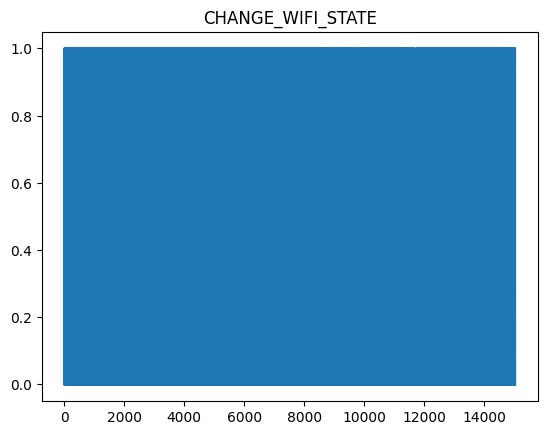

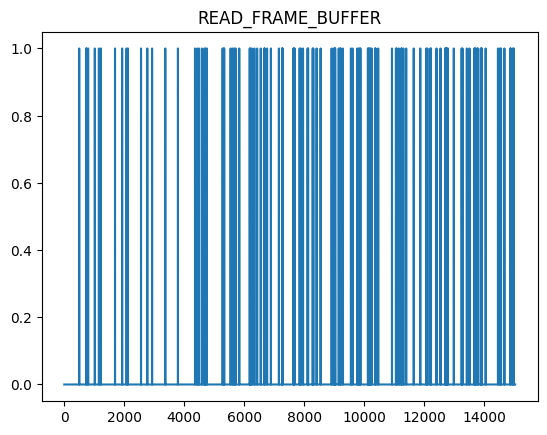

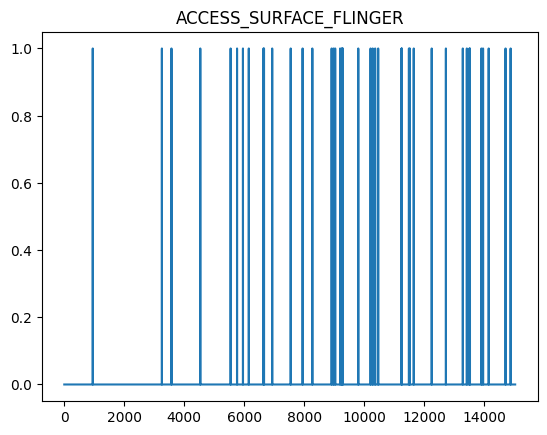

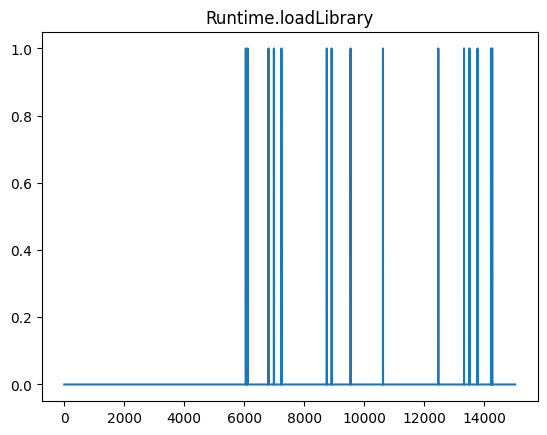

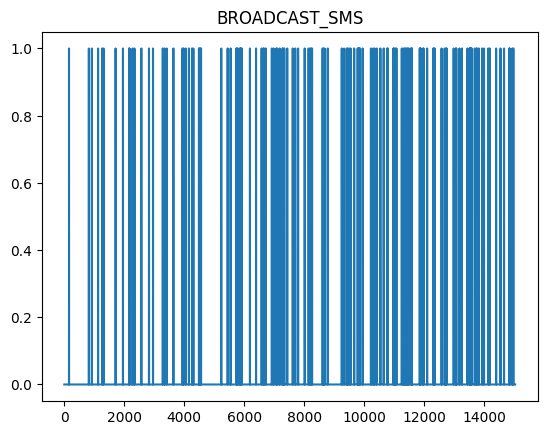

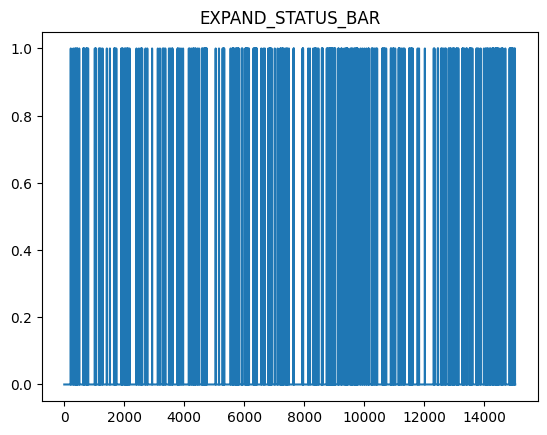

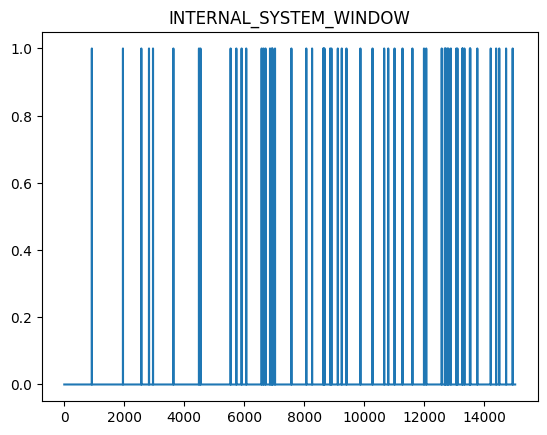

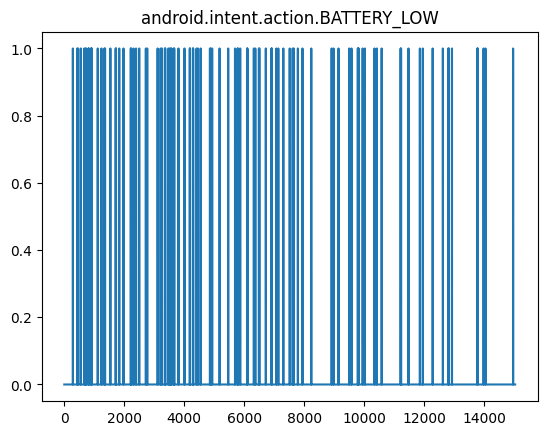

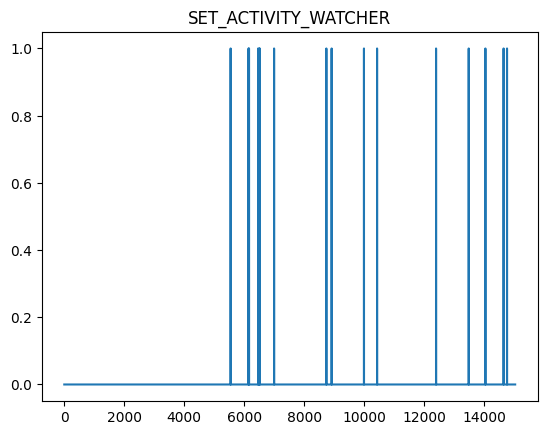

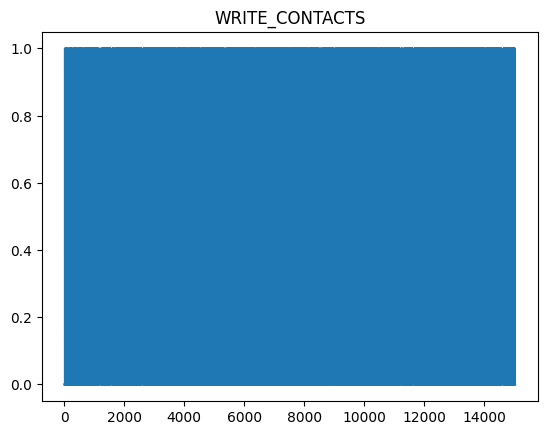

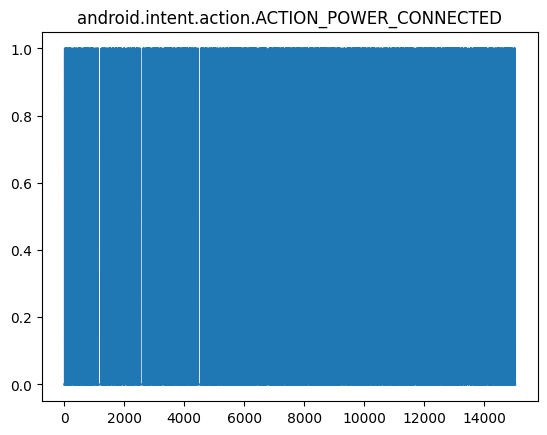

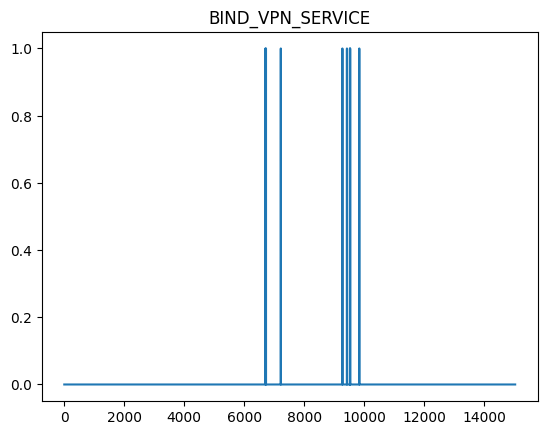

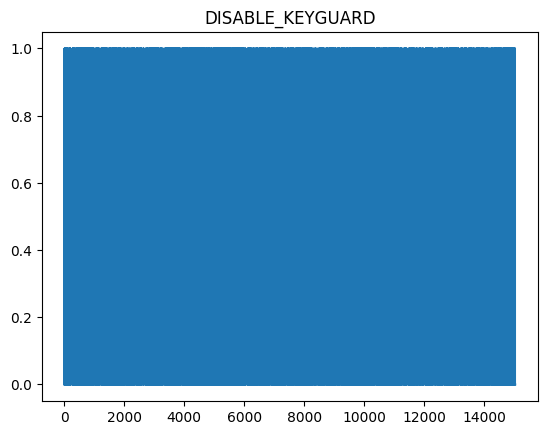

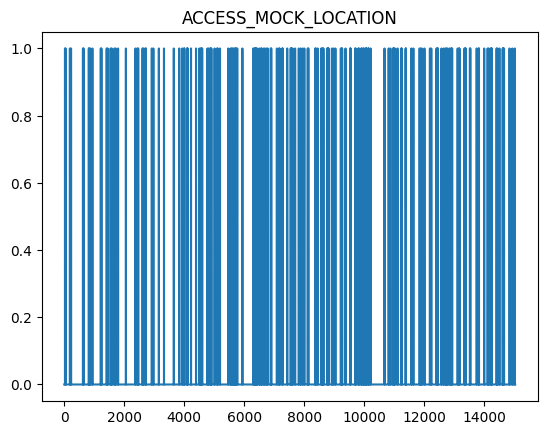

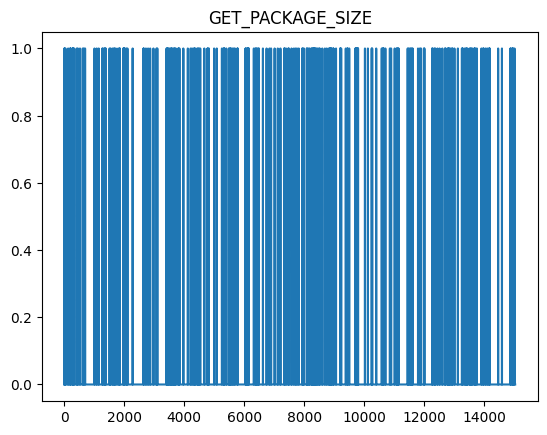

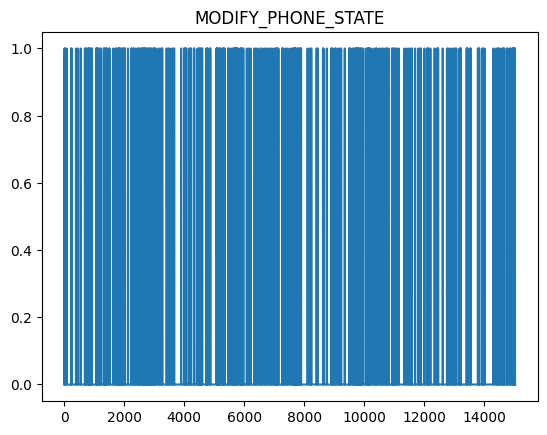

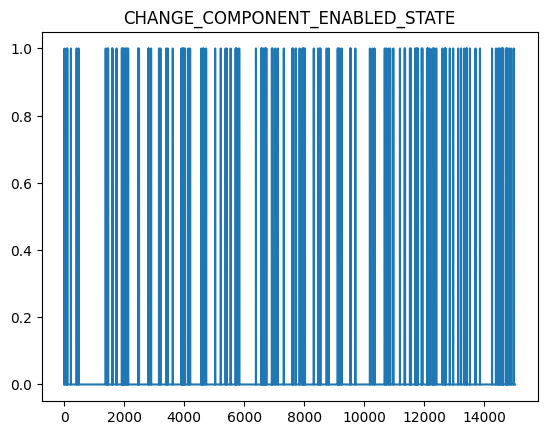

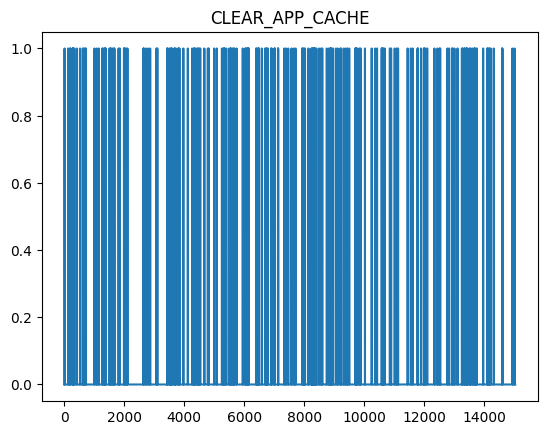

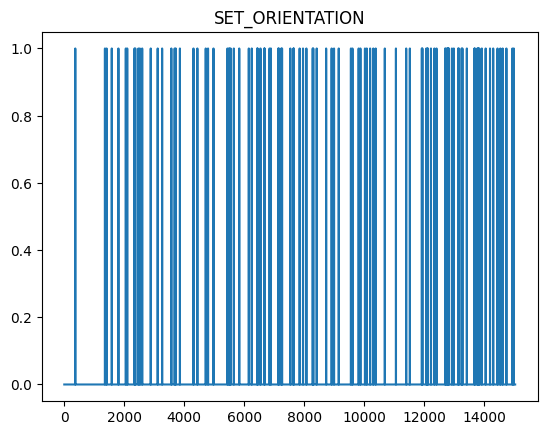

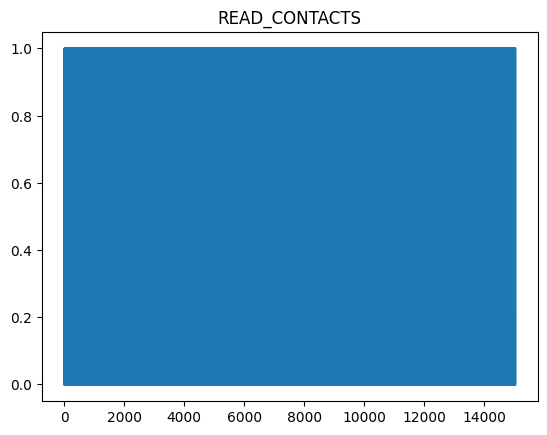

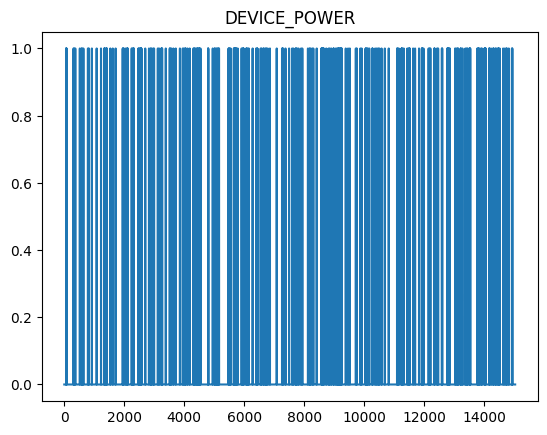

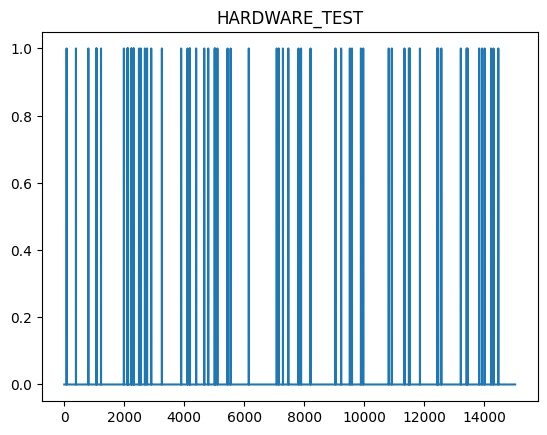

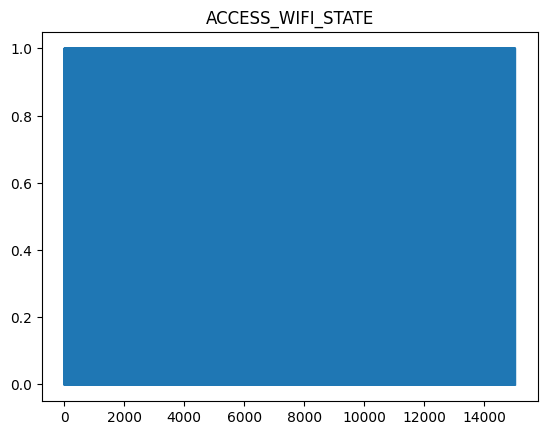

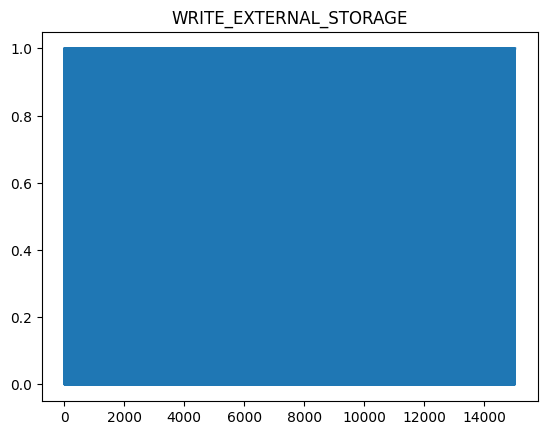

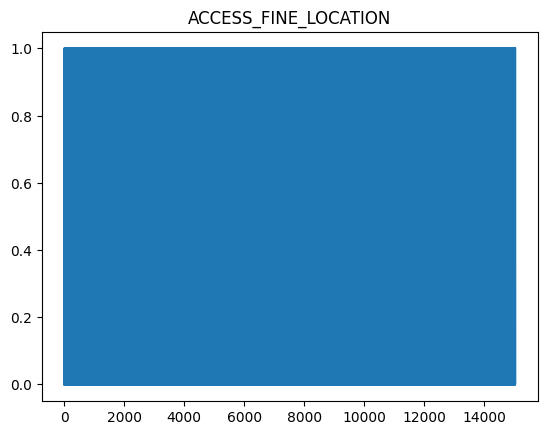

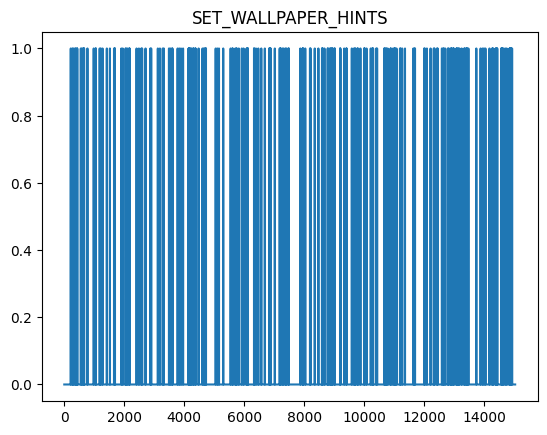

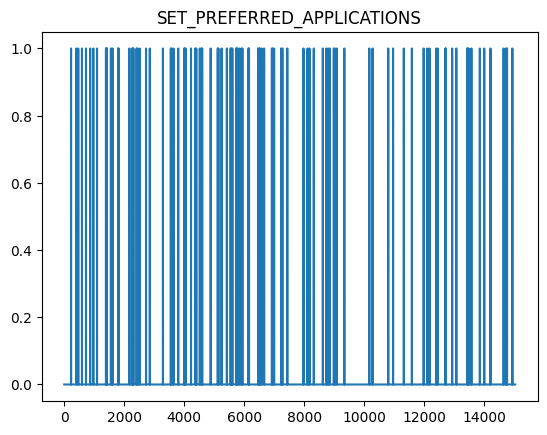

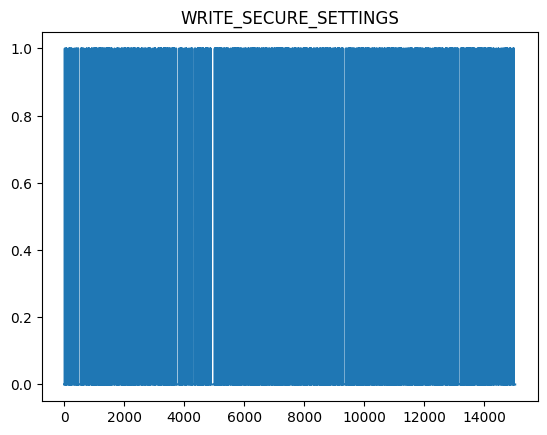

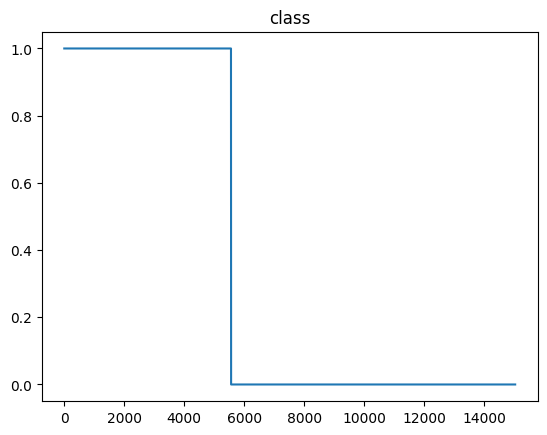

In [ ]:
for col in dataset.columns:
    fig, ax = plt.subplots()
    ax.plot(dataset[col])
    ax.set_title(col)
    plt.show()

**columns name**

In [ ]:
dataset.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)

**Null enteries**

In [ ]:
dataset.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

labels count in class column

In [ ]:
dataset["class"].value_counts()

0    9476
1    5555
Name: class, dtype: int64

**checking repeated columns**

In [ ]:
dataset.columns.value_counts()

transact                       1
ACCOUNT_MANAGER                1
WRITE_SETTINGS                 1
REBOOT                         1
BLUETOOTH_ADMIN                1
                              ..
WAKE_LOCK                      1
RECEIVE_BOOT_COMPLETED         1
RESTART_PACKAGES               1
Ljava.lang.Class.getPackage    1
class                          1
Length: 216, dtype: int64

**values count in columns**

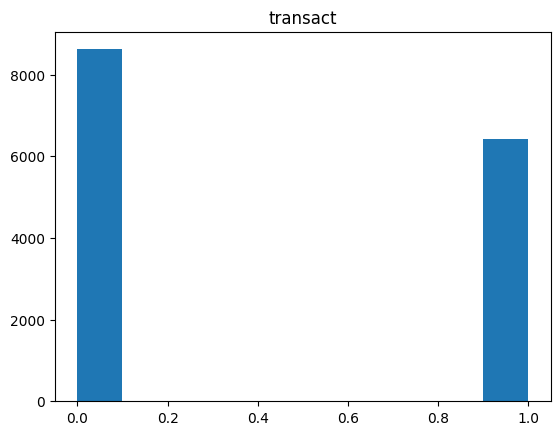

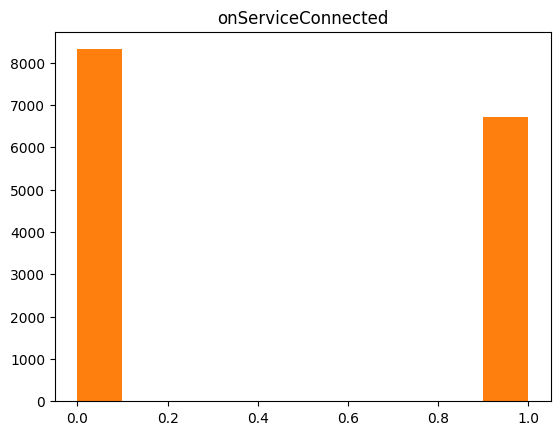

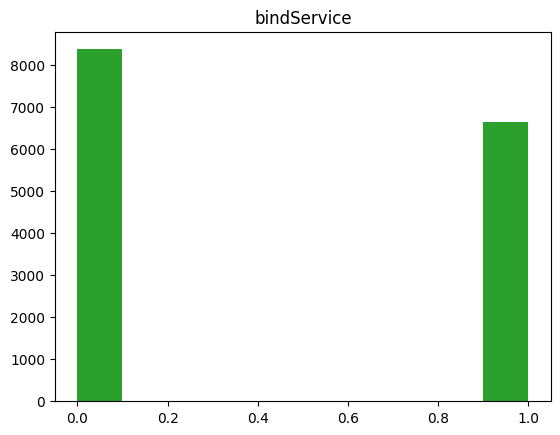

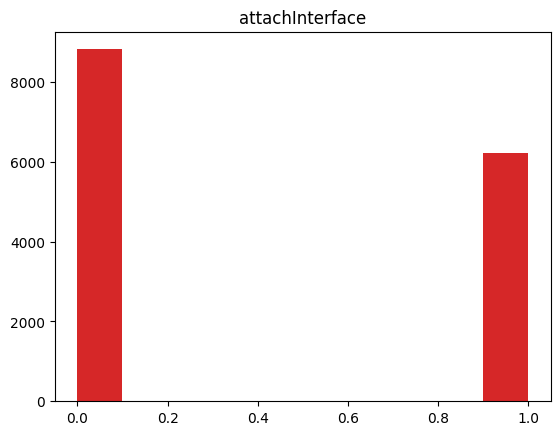

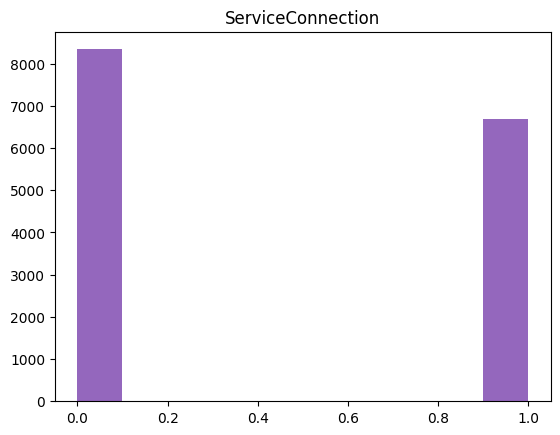

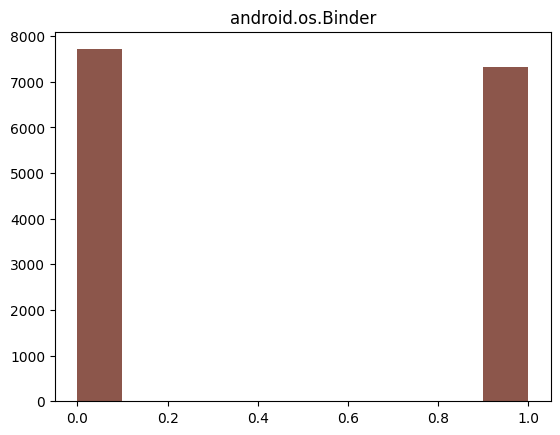

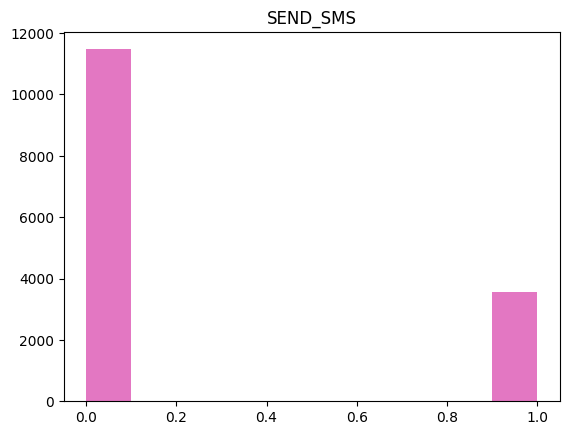

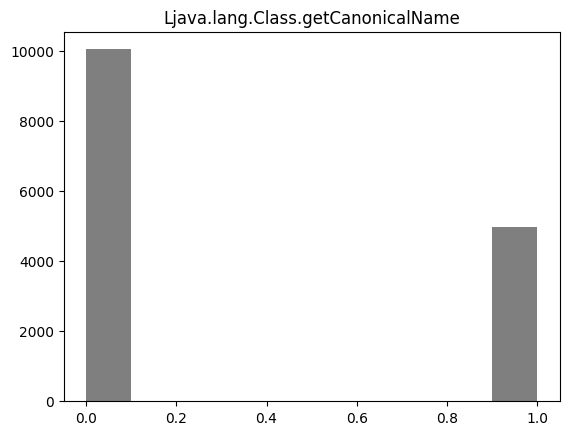

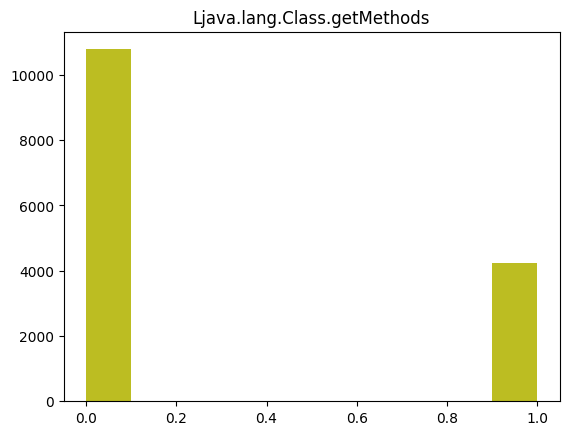

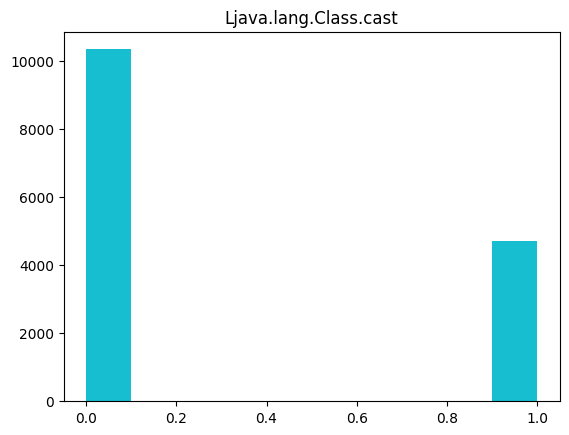

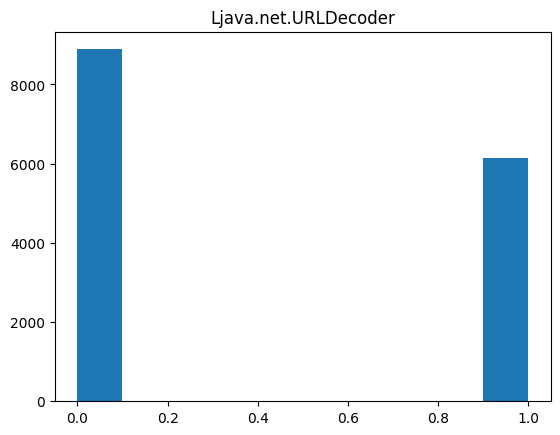

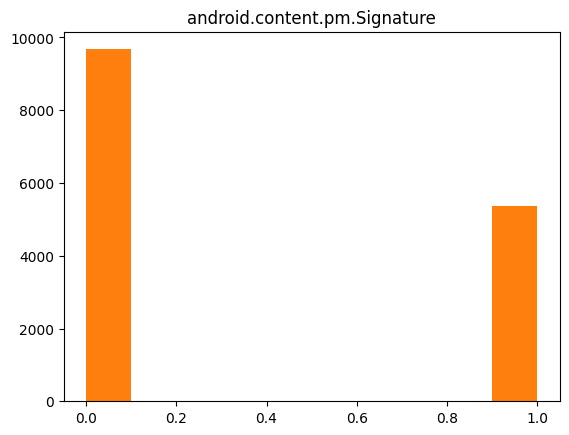

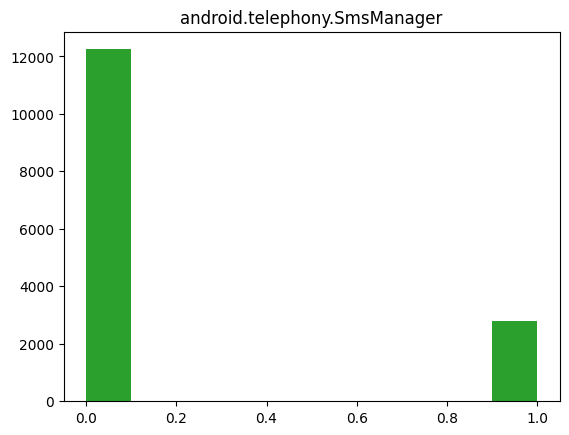

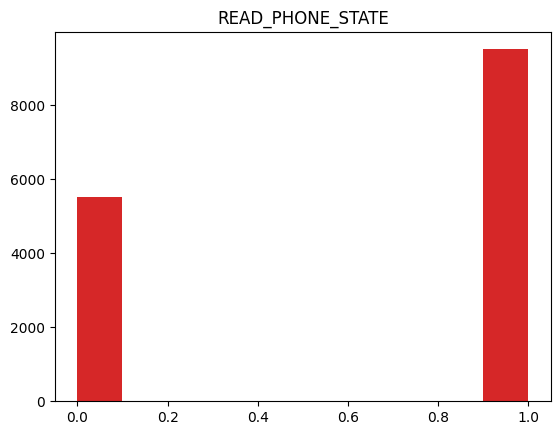

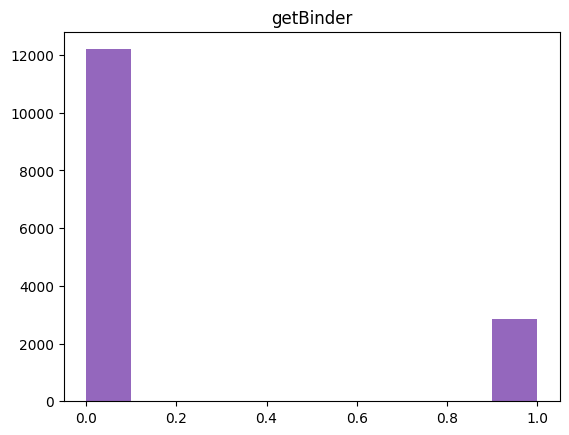

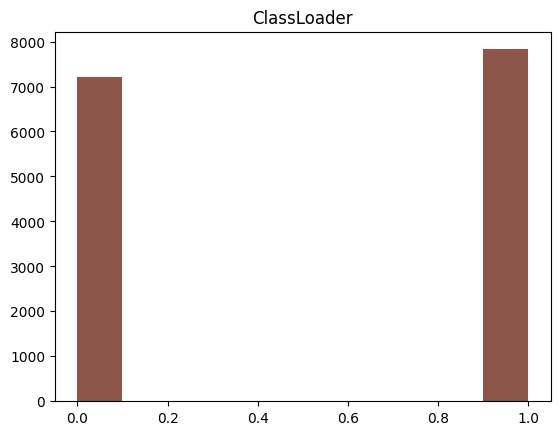

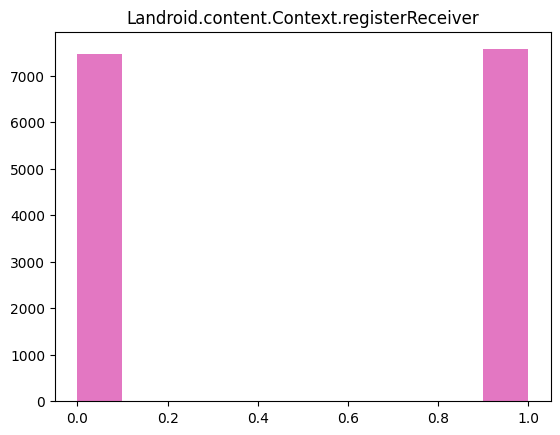

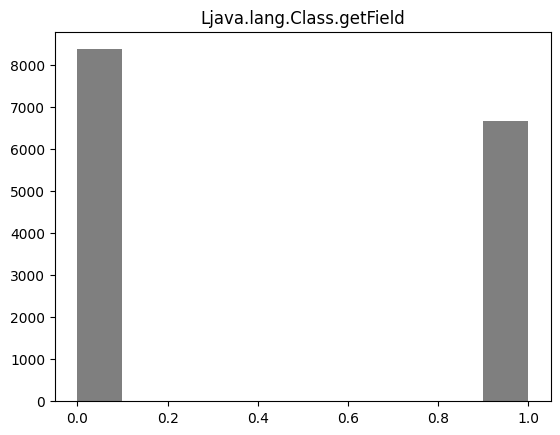

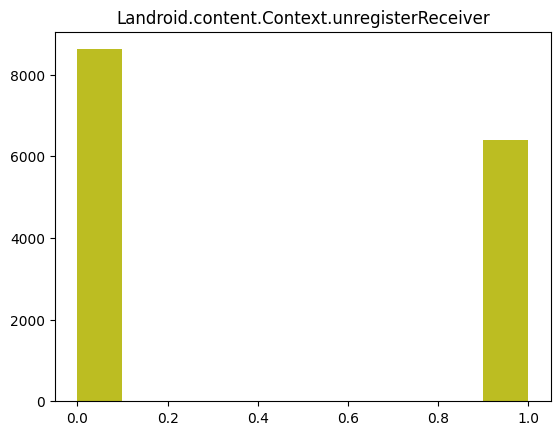

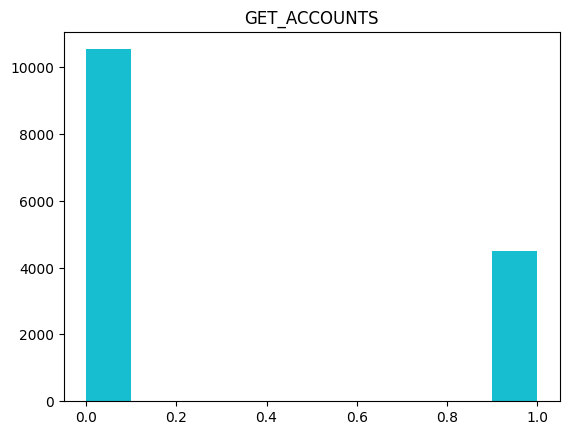

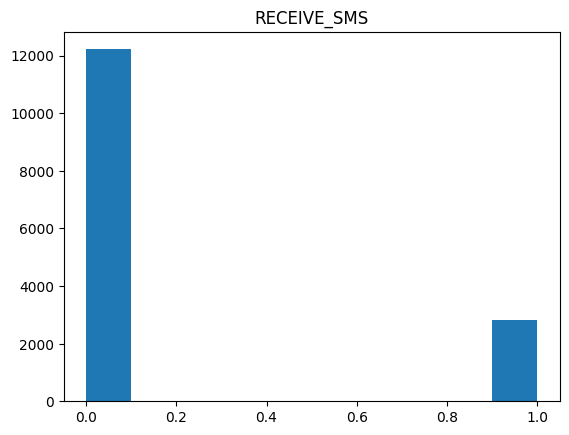

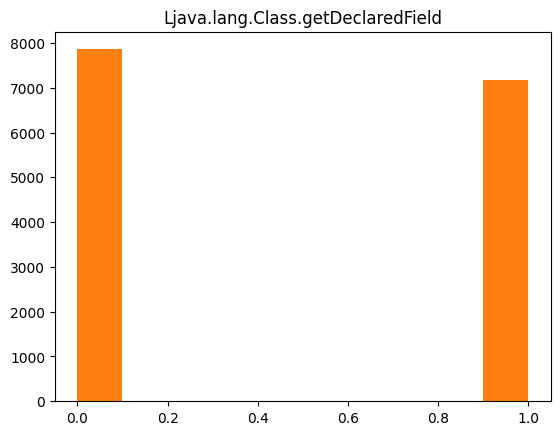

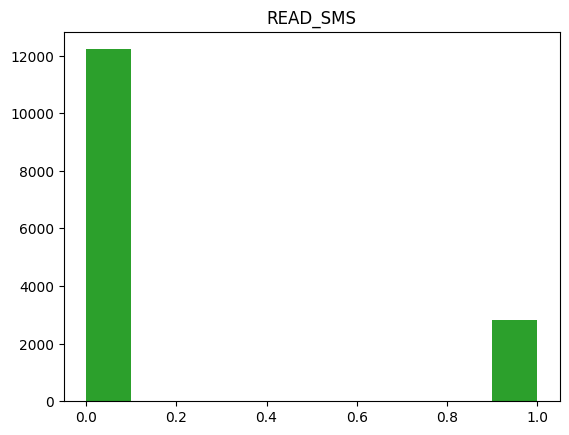

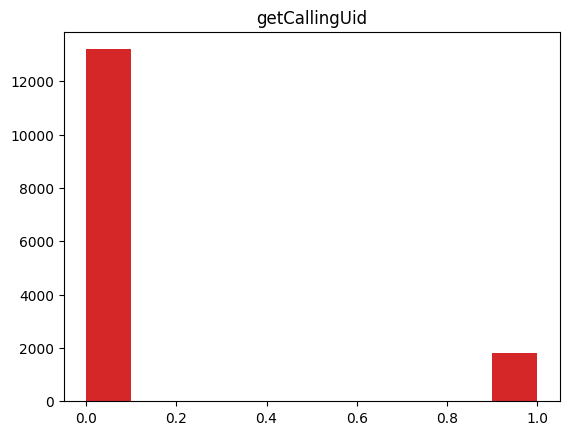

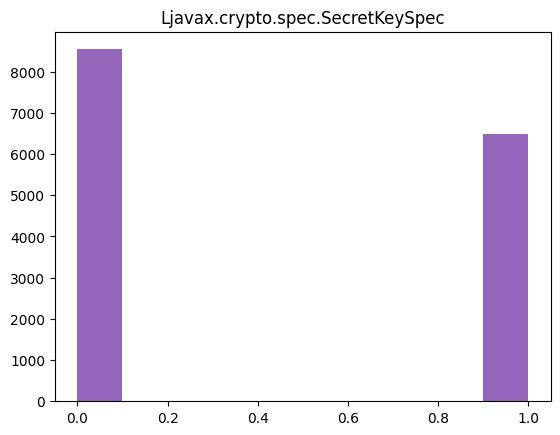

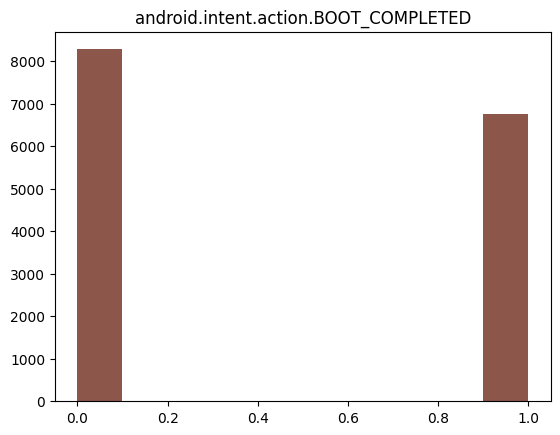

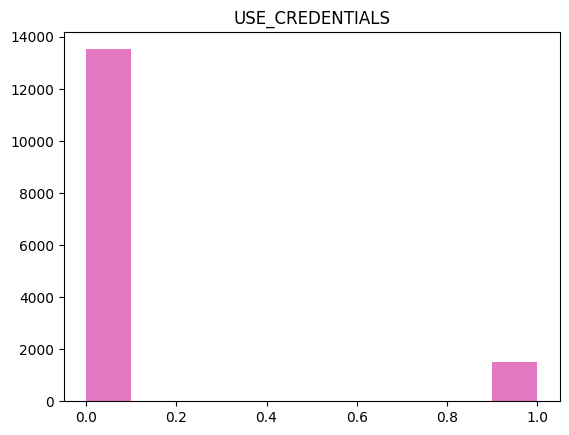

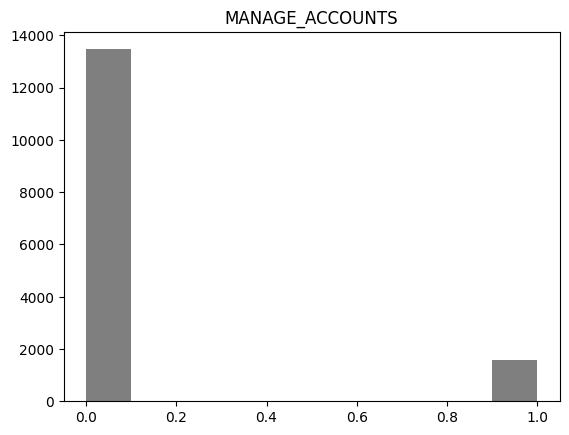

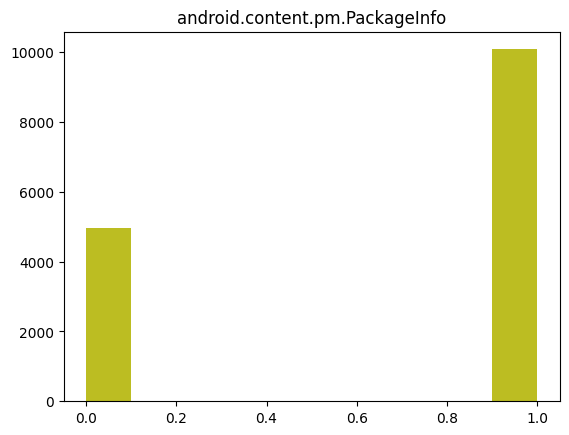

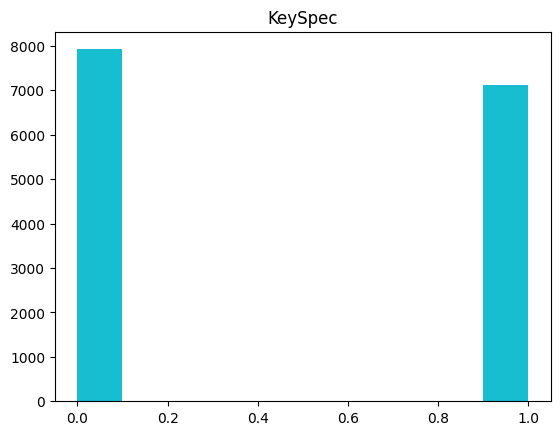

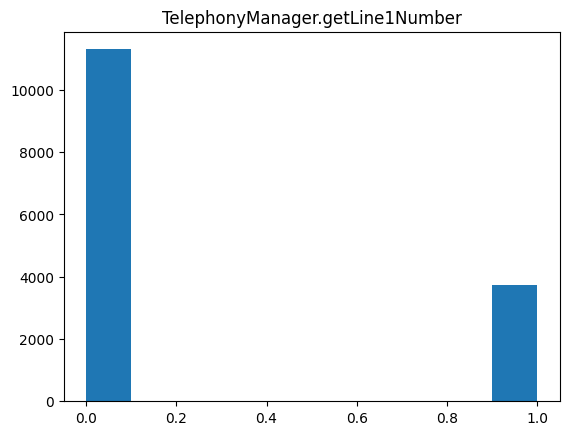

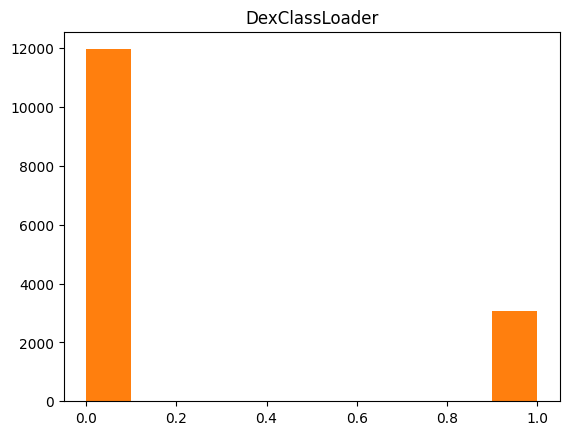

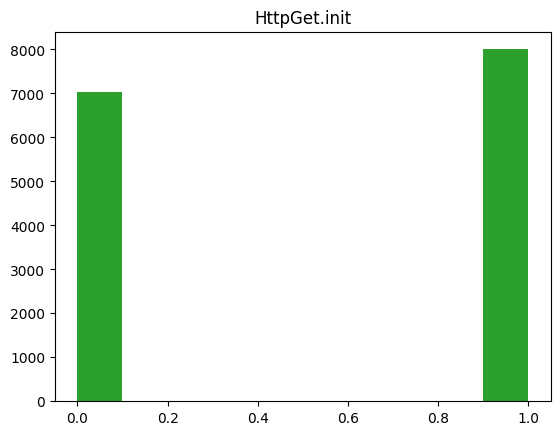

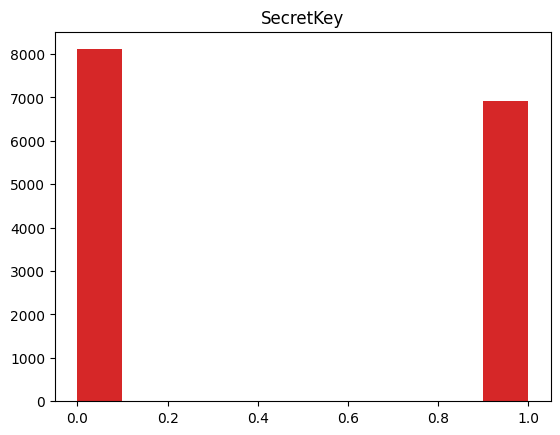

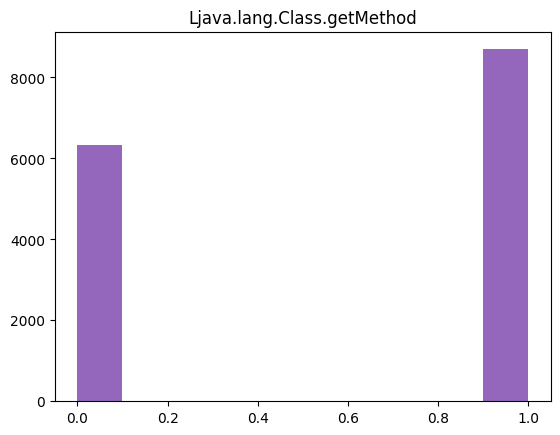

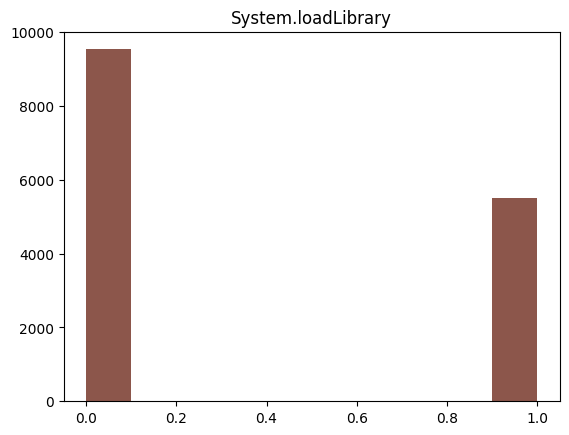

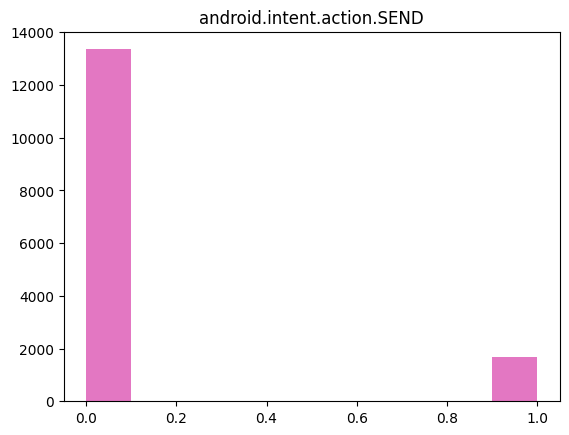

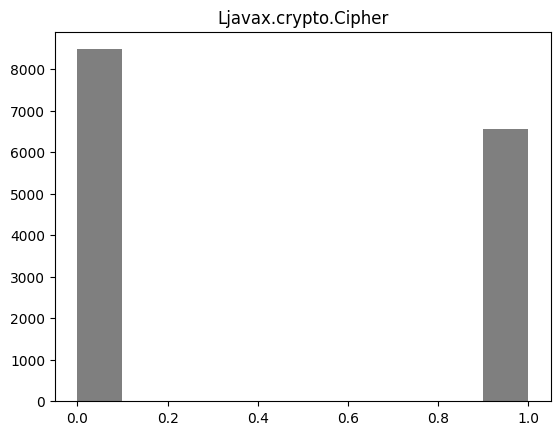

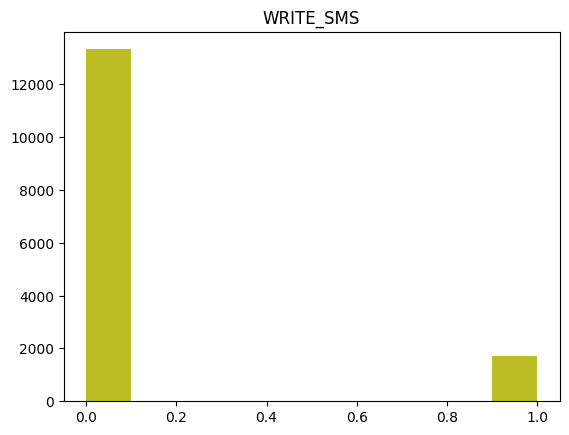

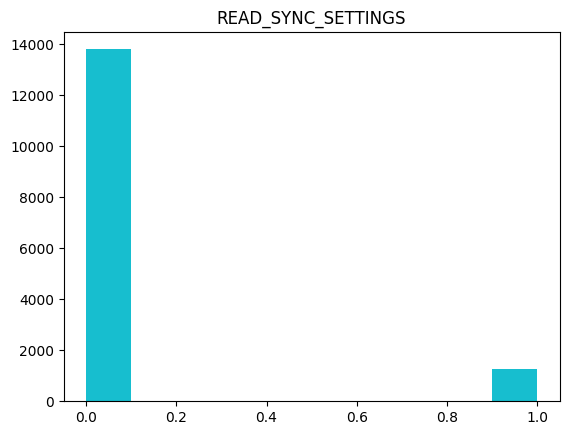

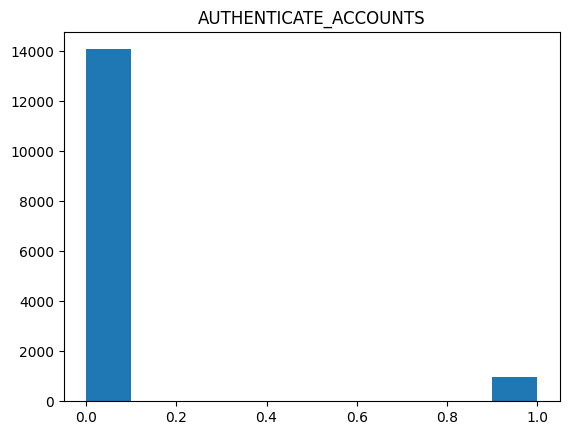

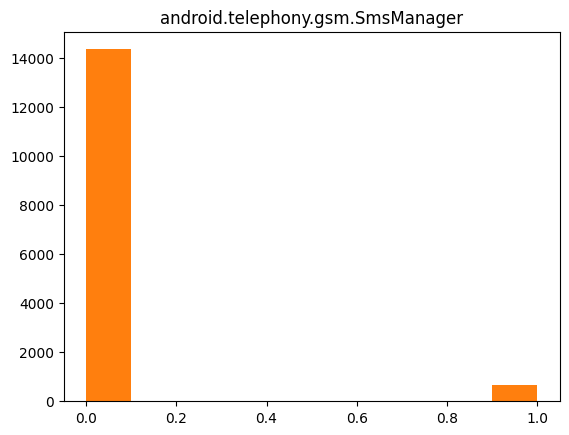

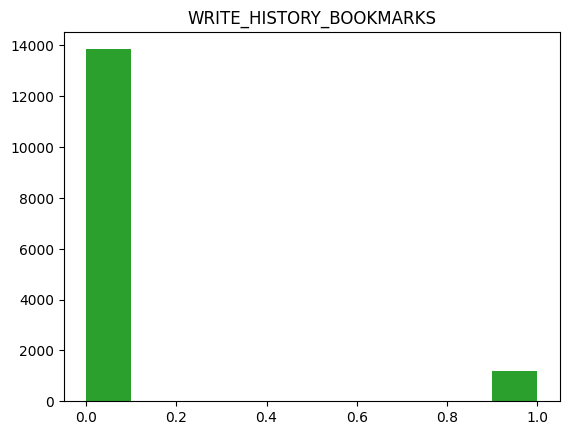

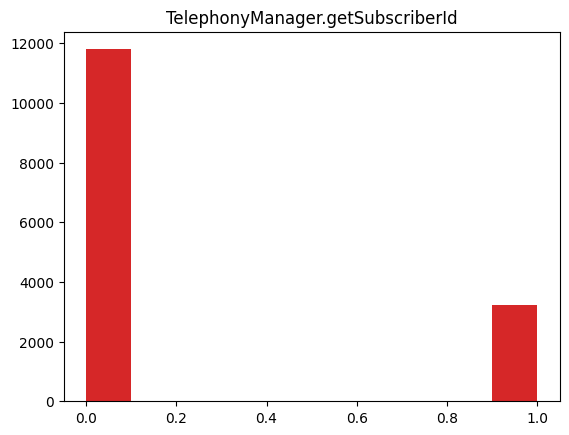

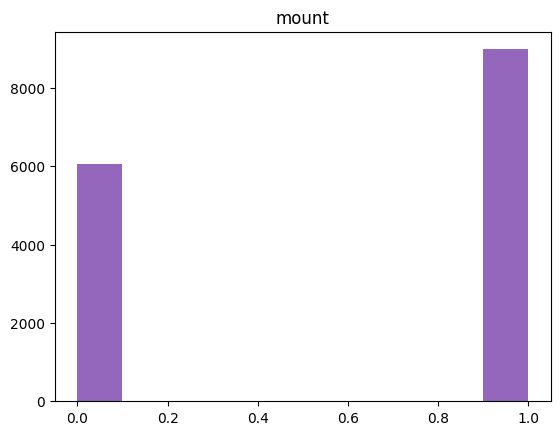

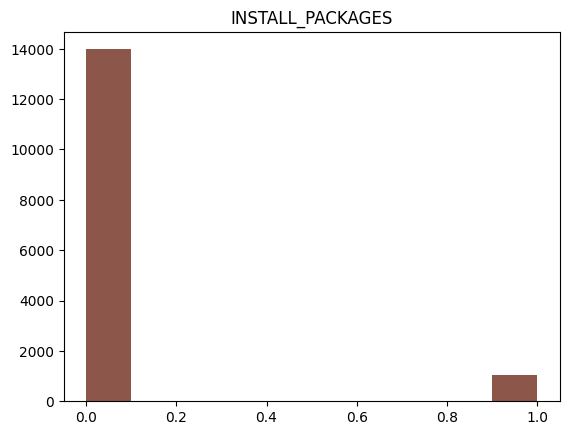

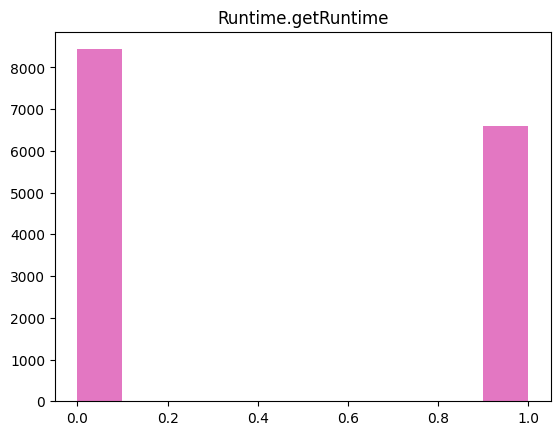

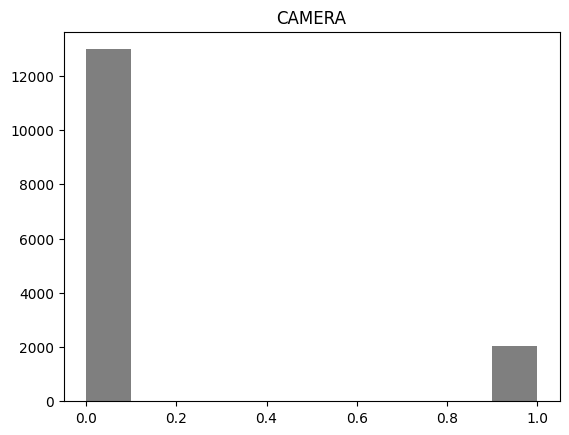

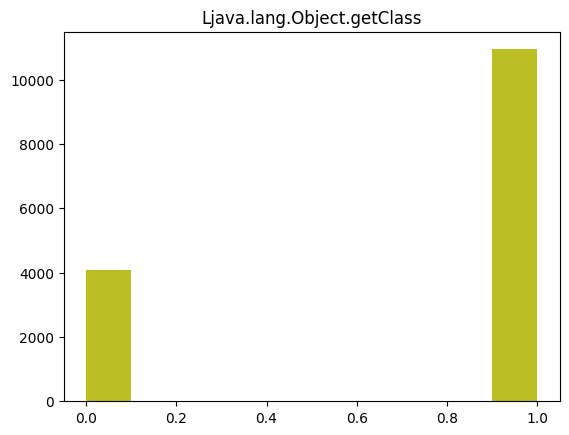

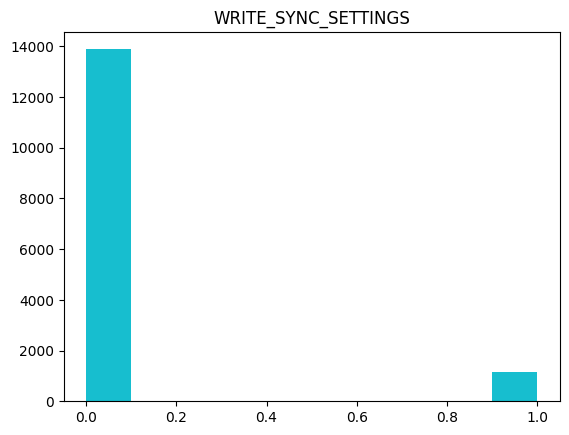

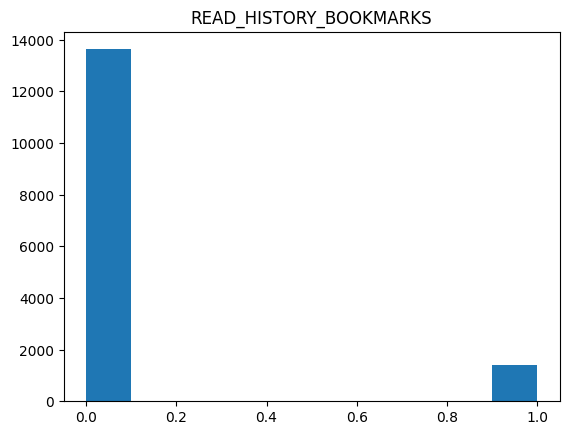

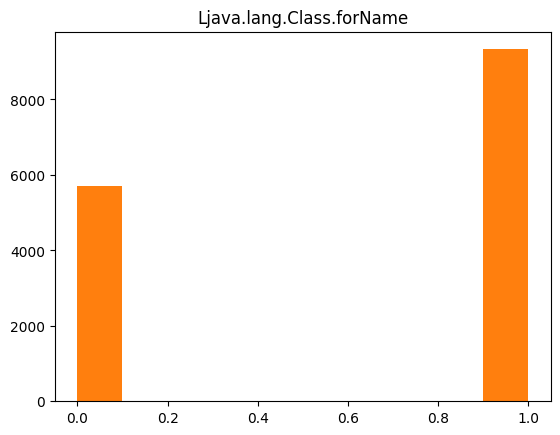

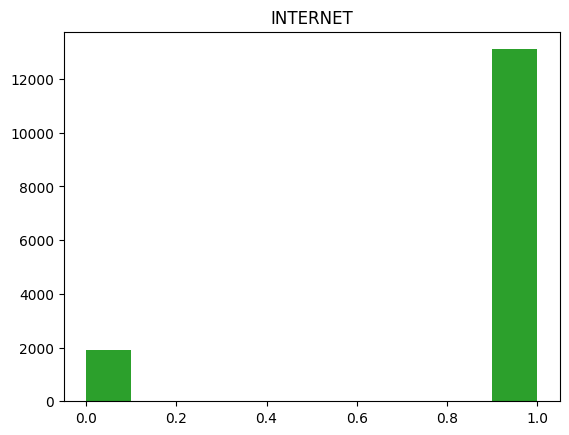

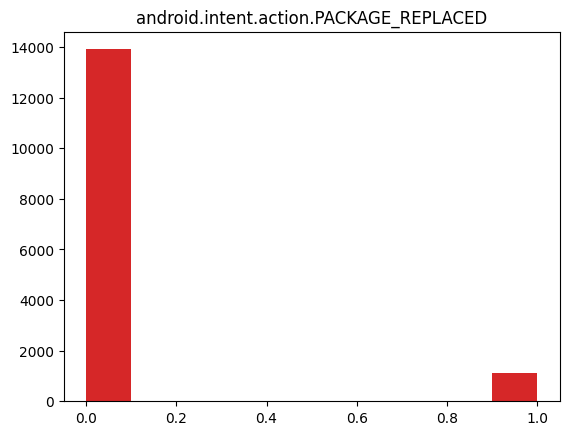

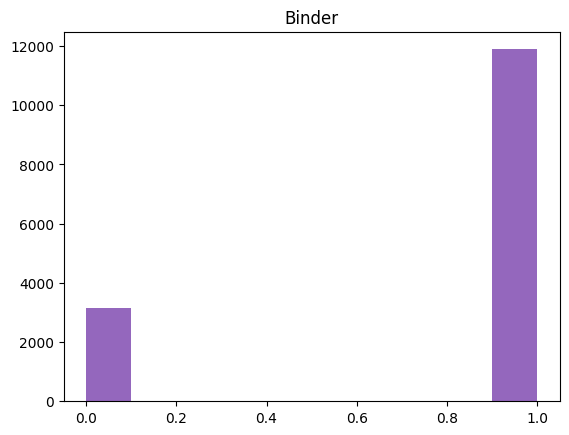

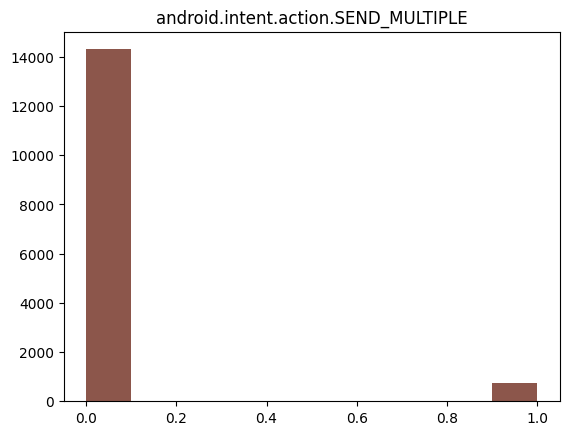

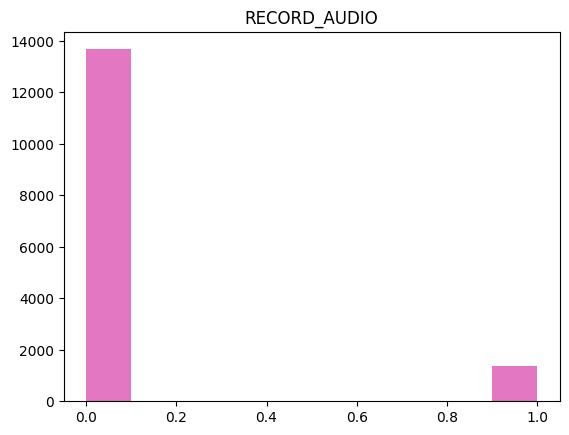

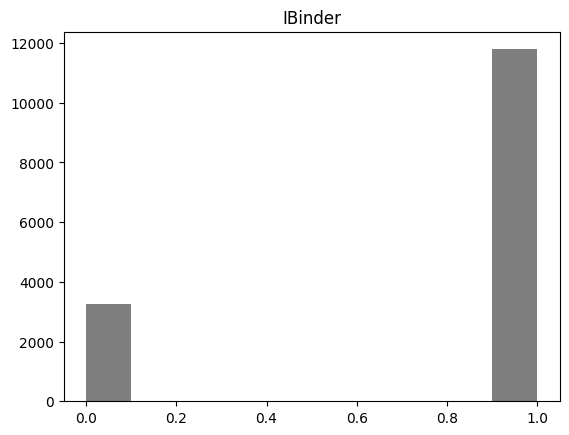

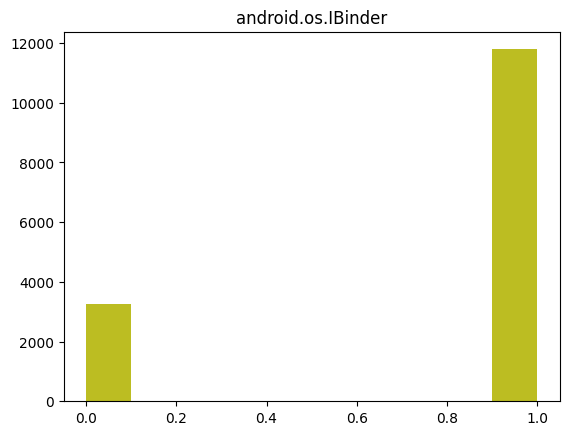

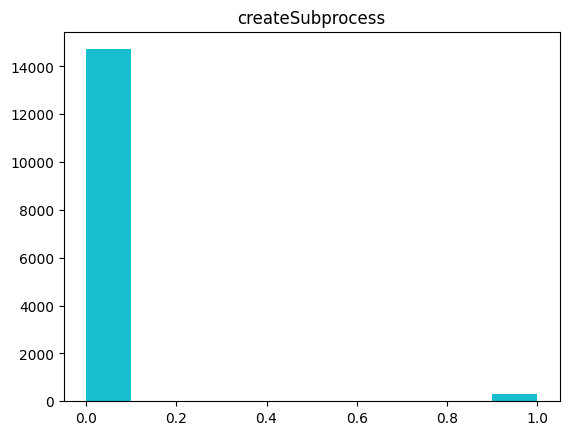

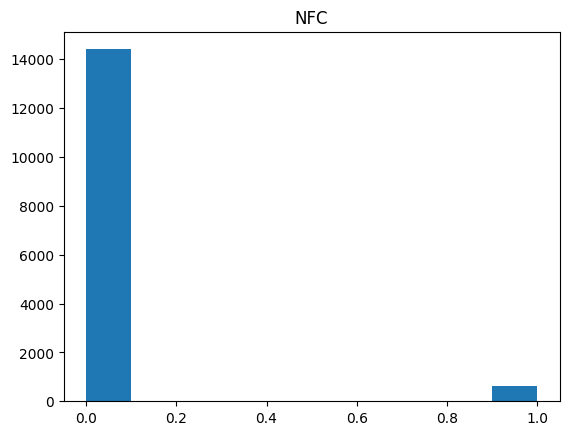

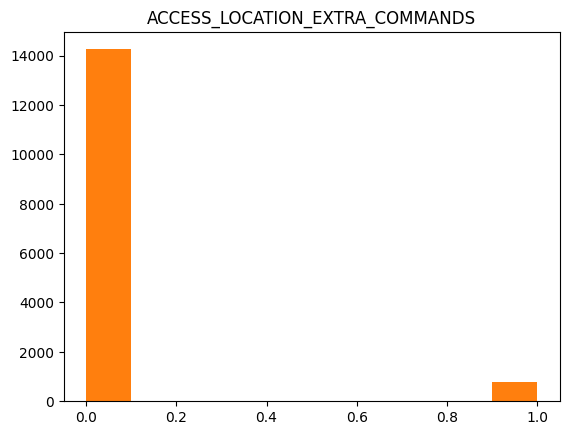

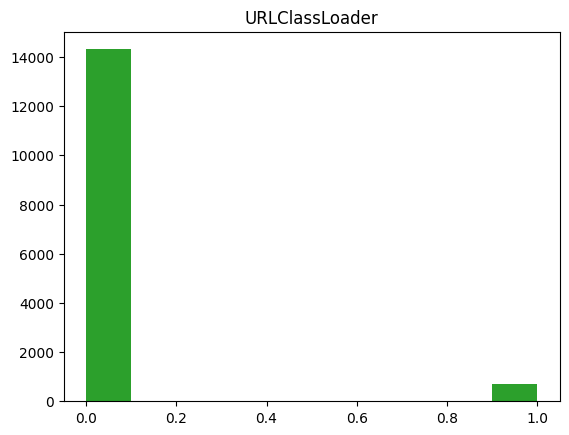

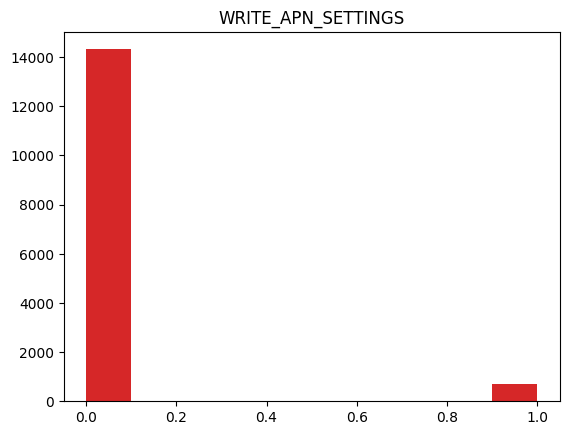

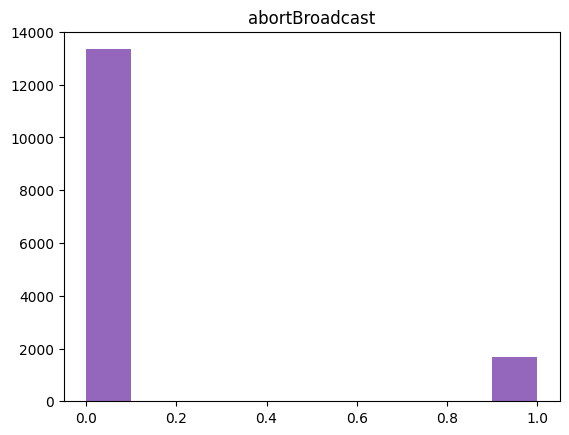

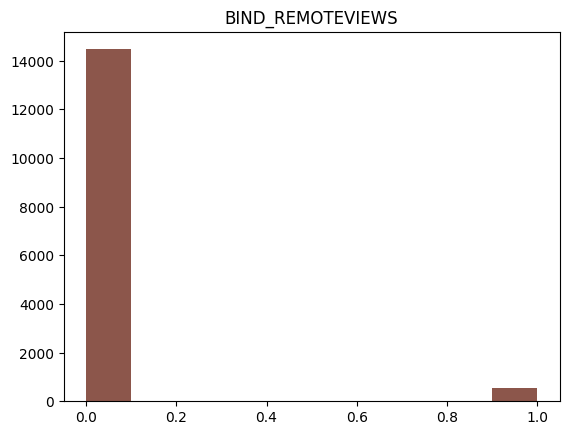

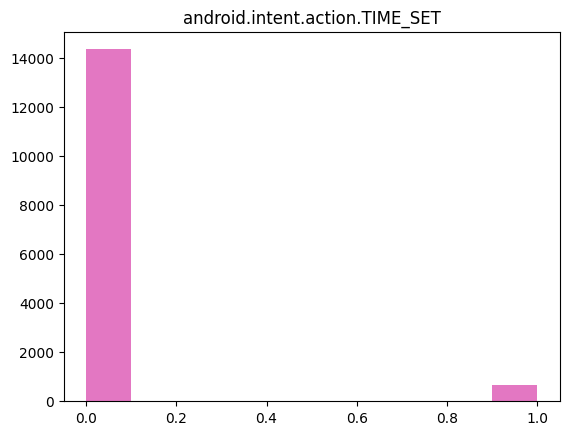

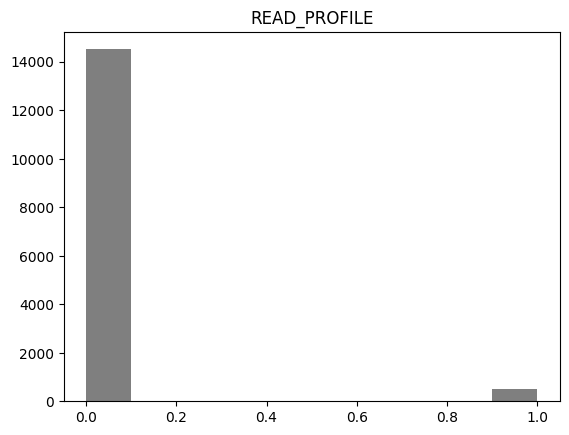

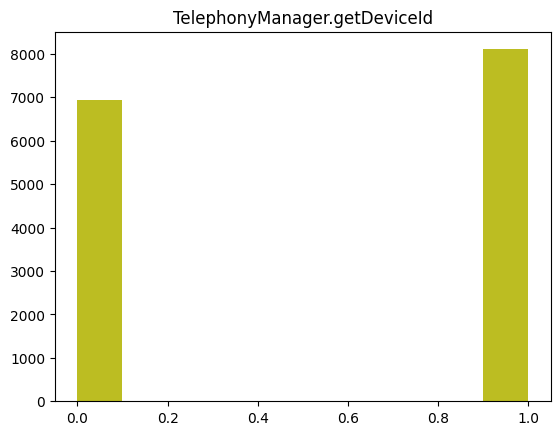

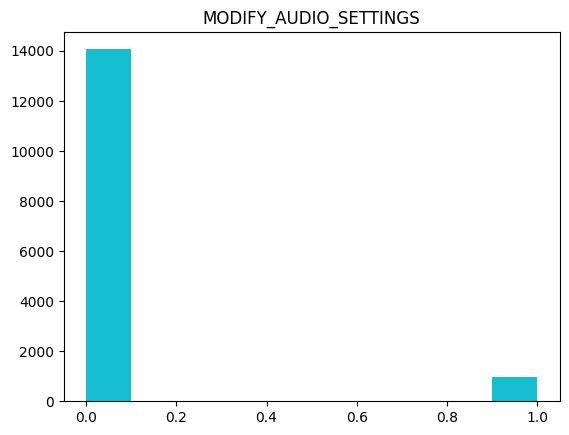

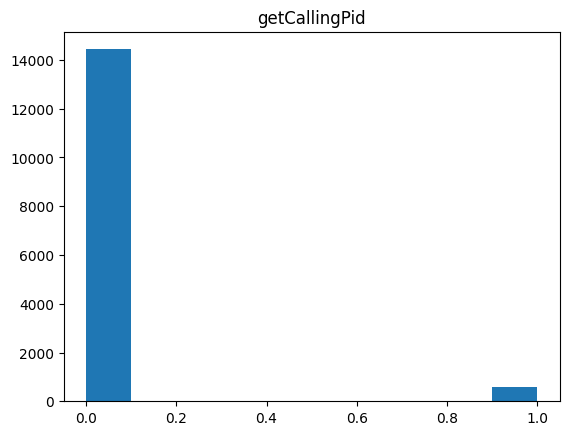

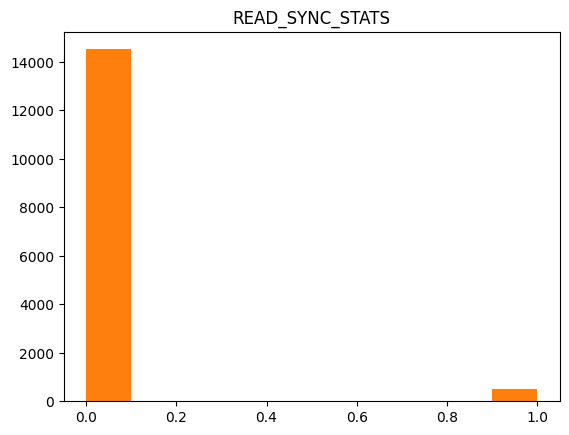

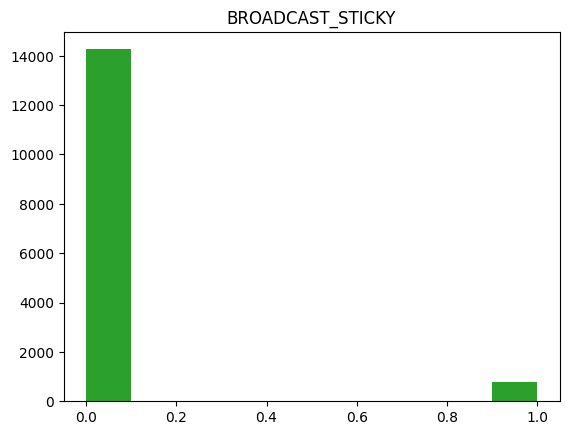

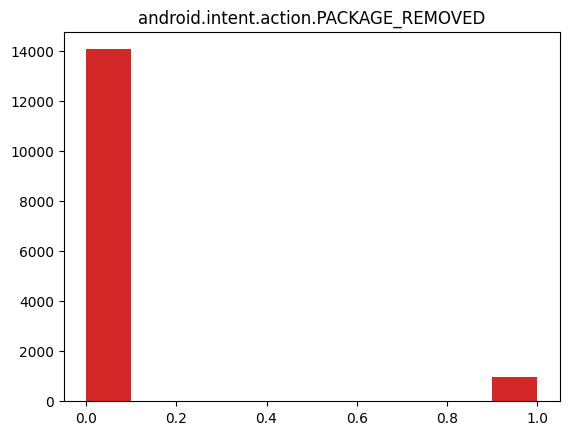

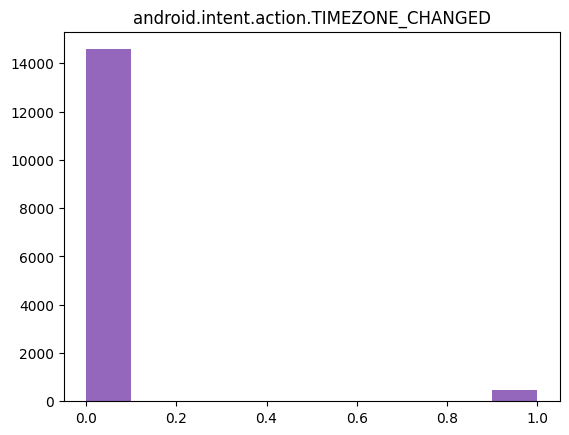

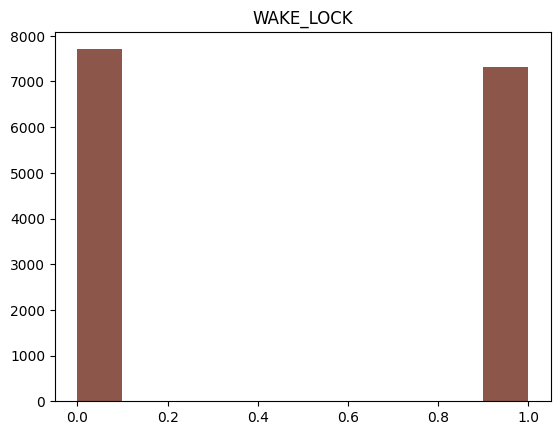

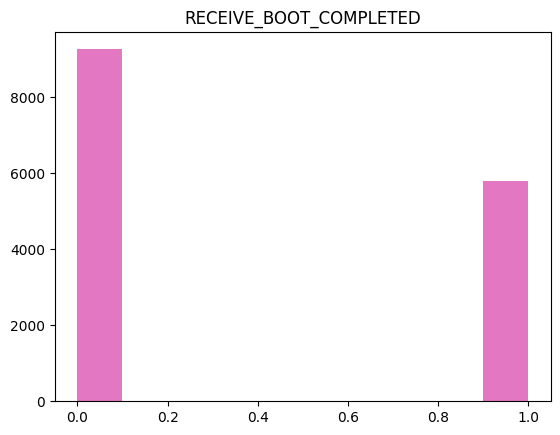

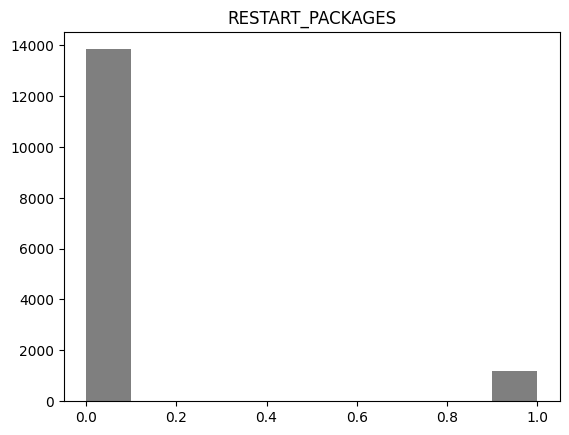

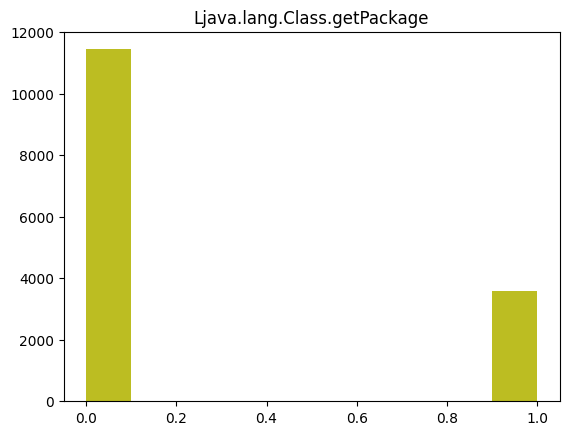

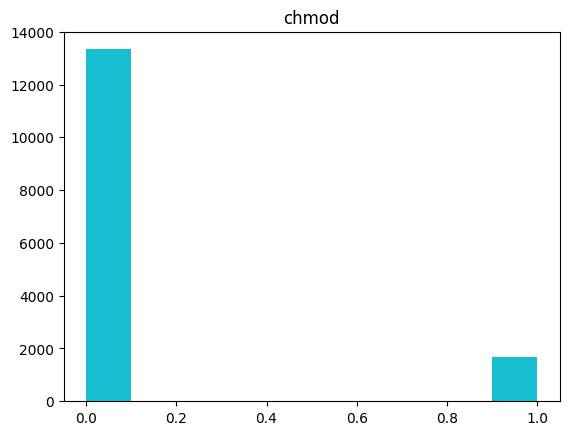

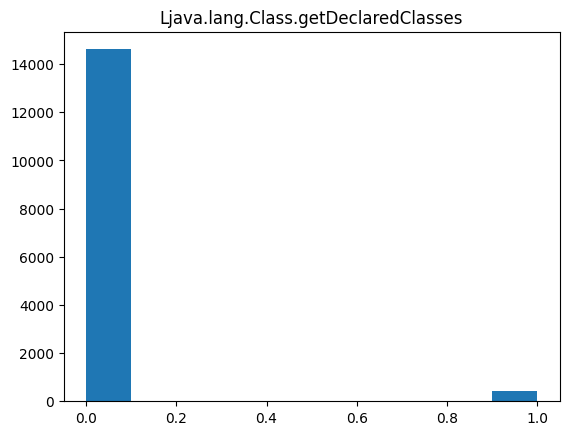

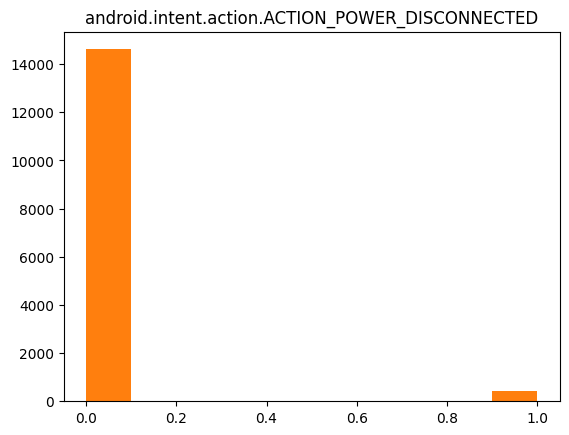

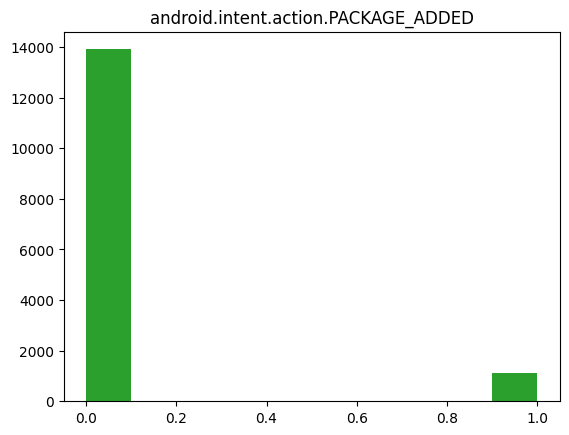

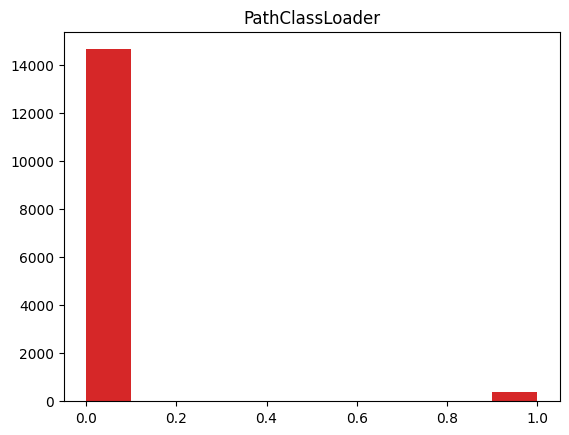

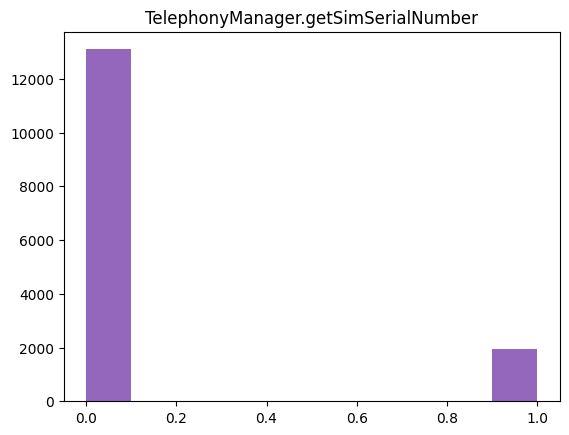

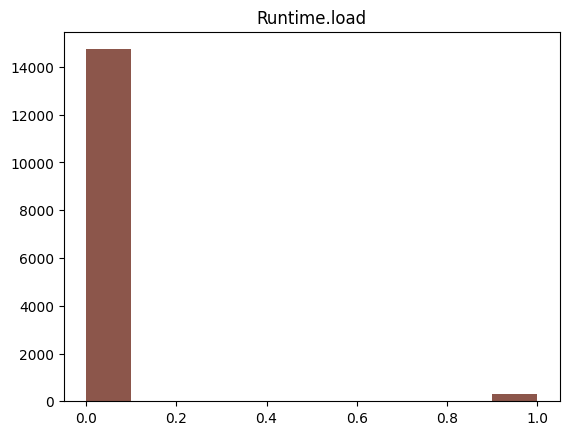

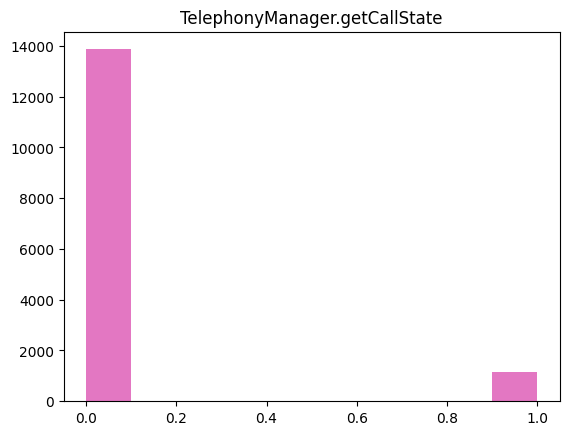

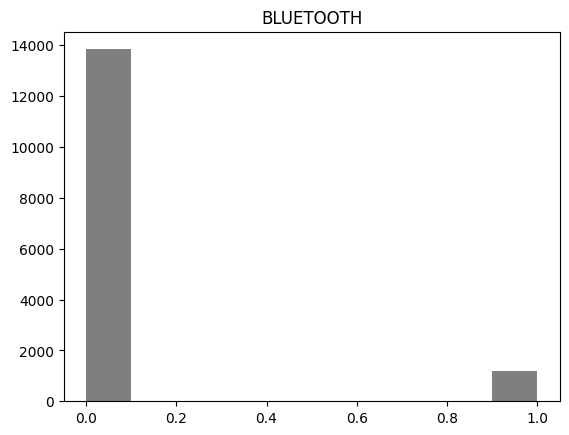

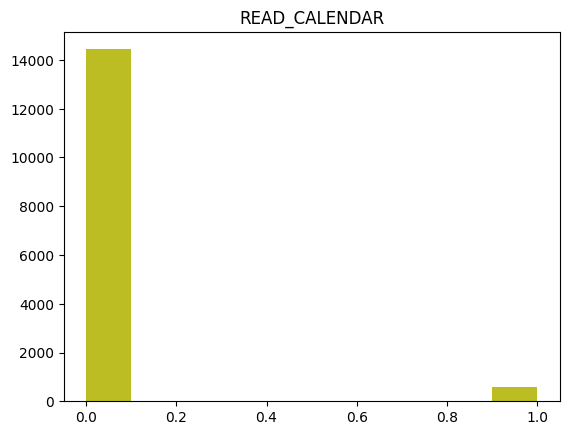

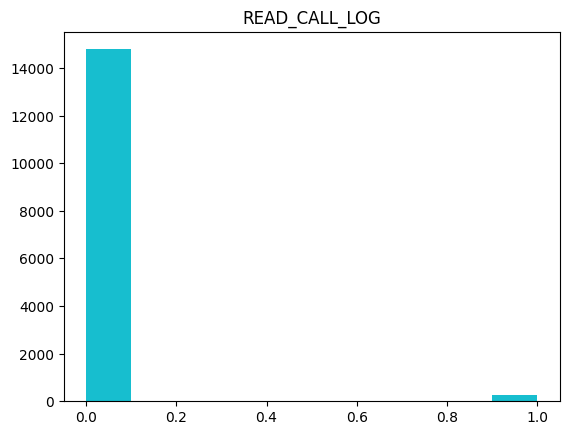

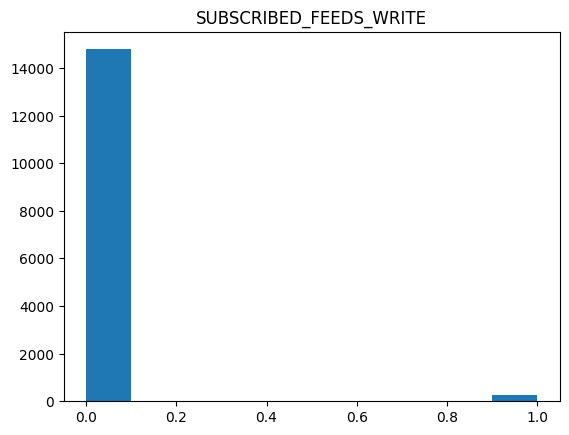

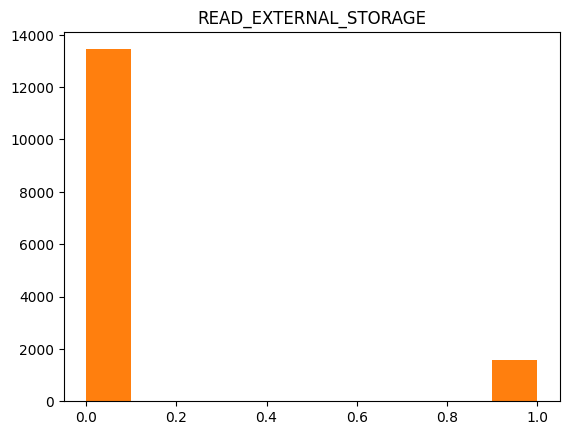

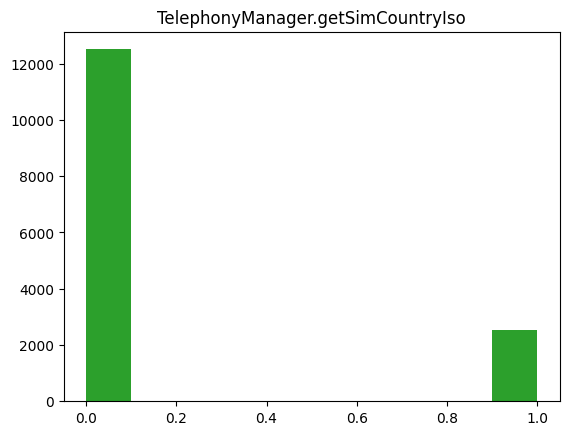

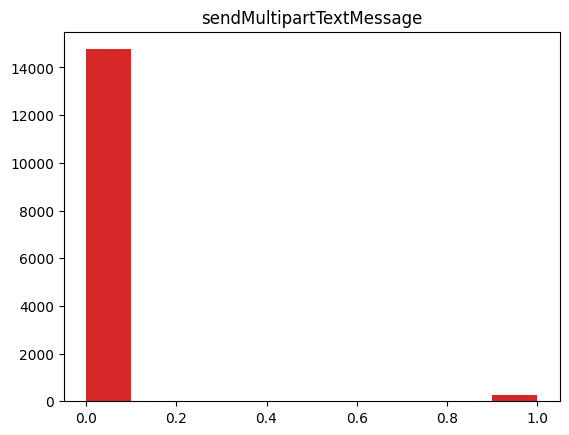

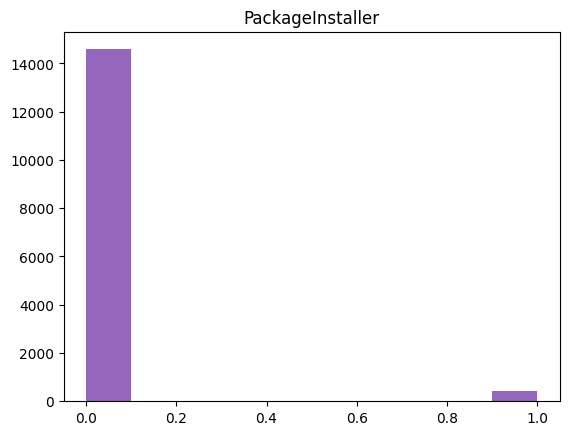

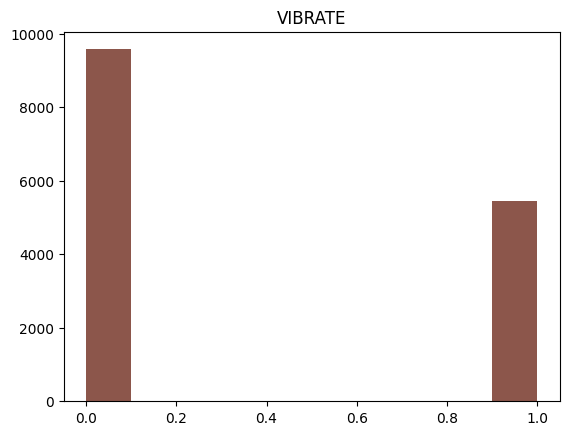

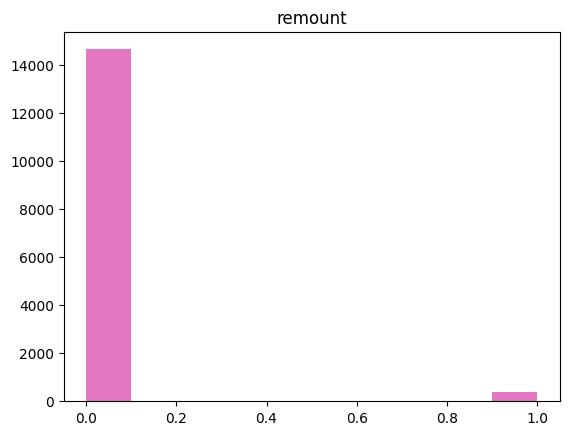

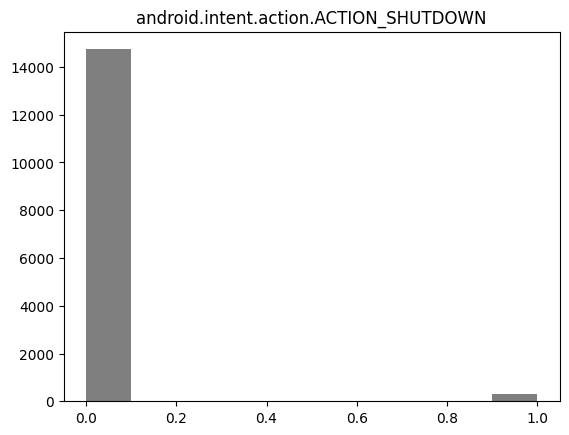

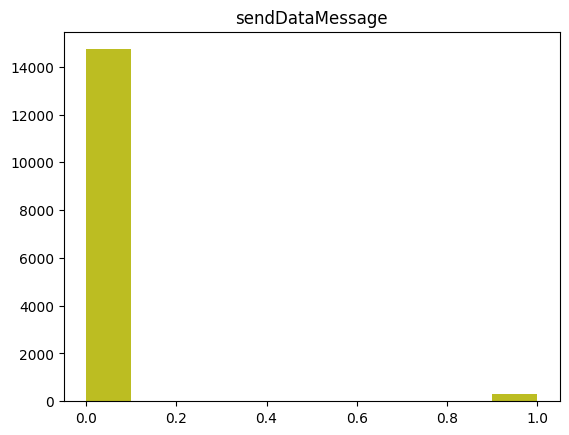

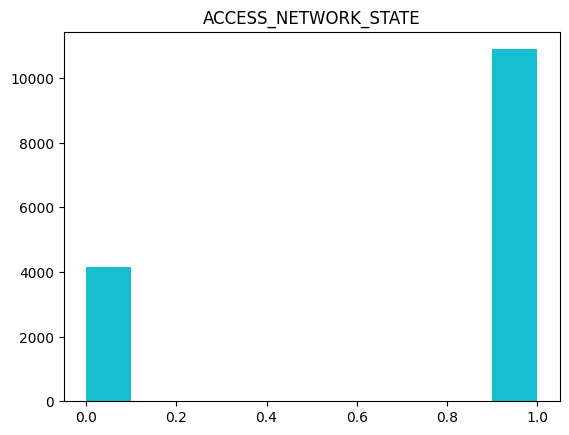

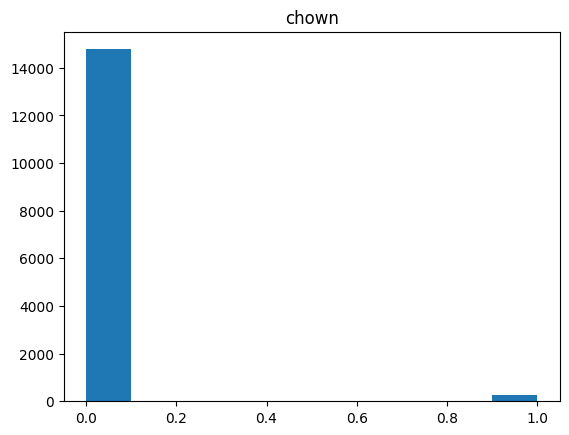

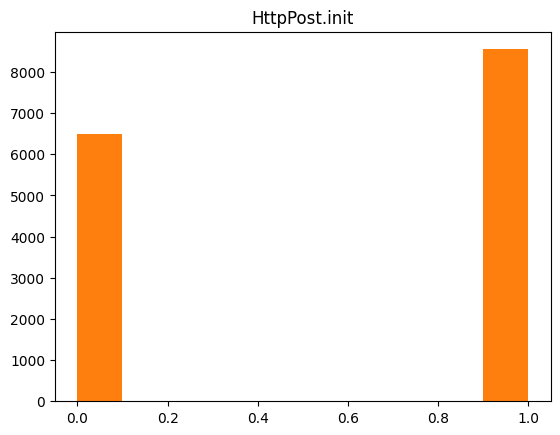

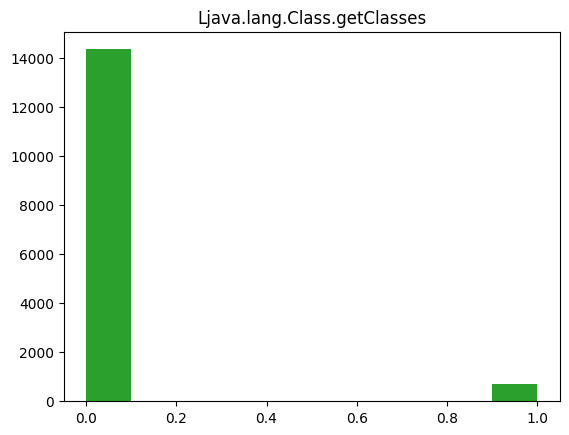

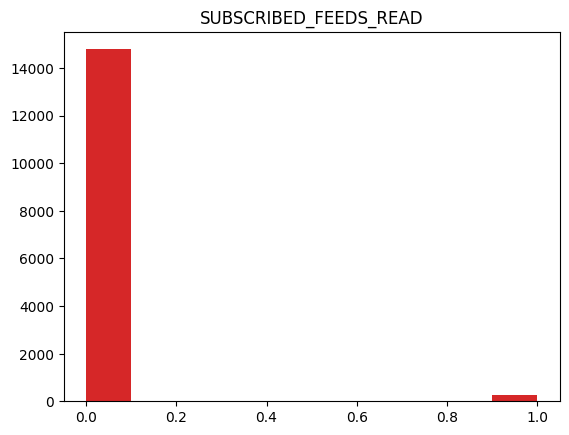

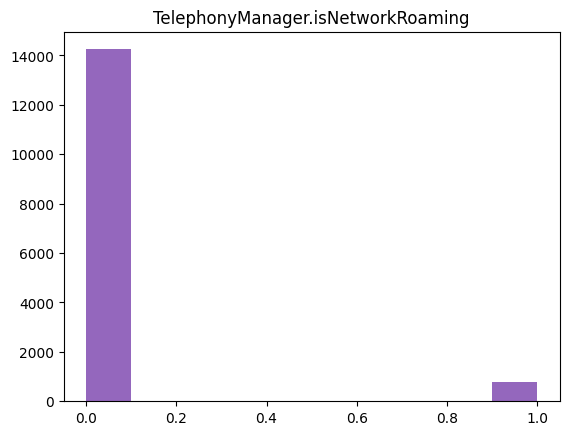

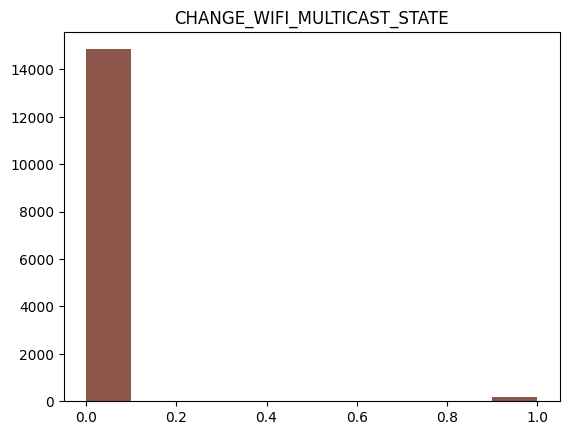

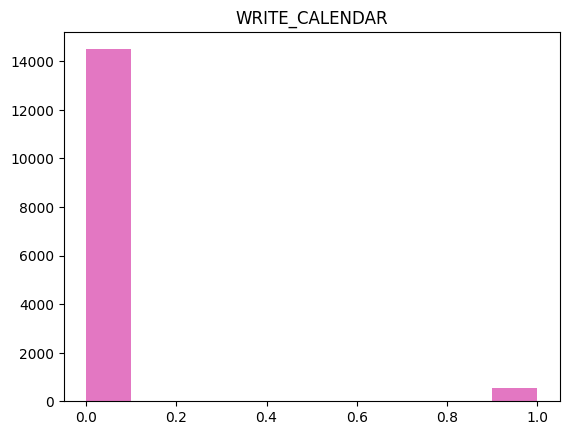

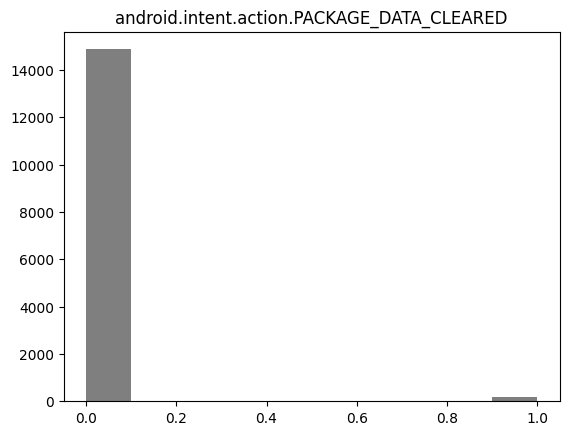

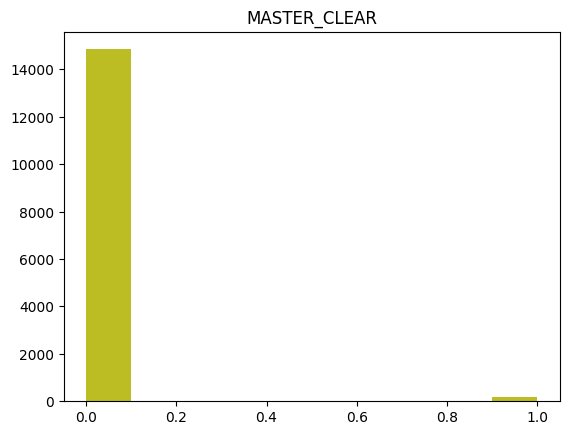

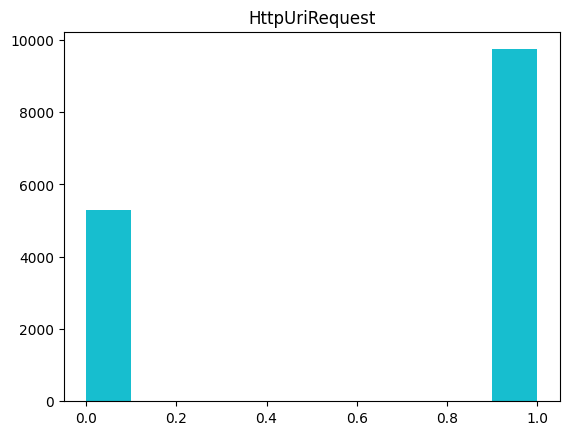

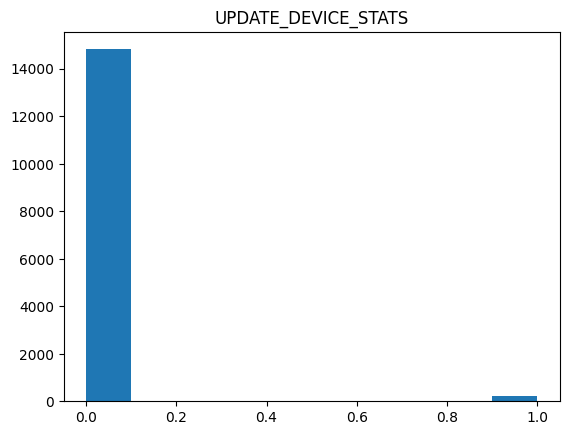

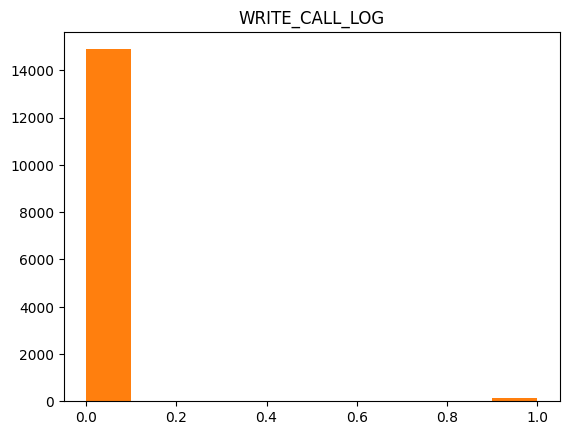

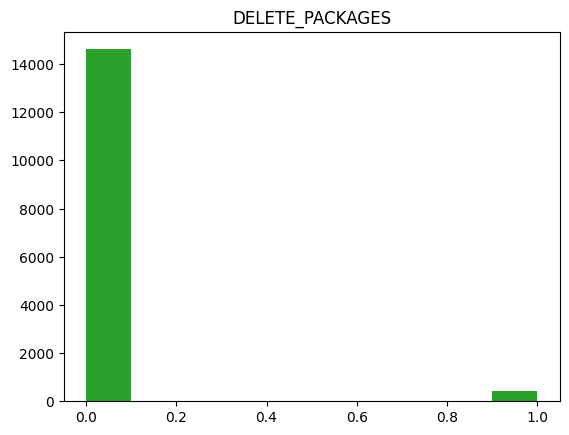

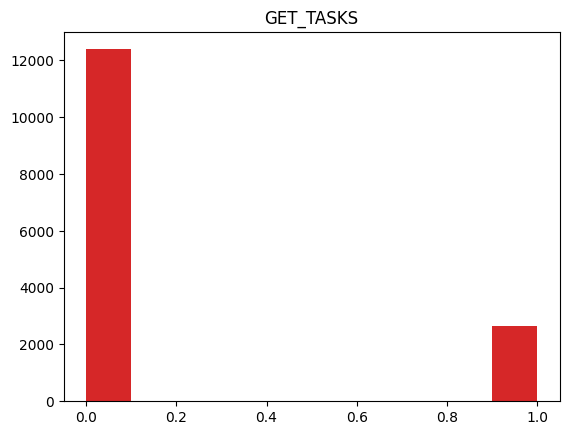

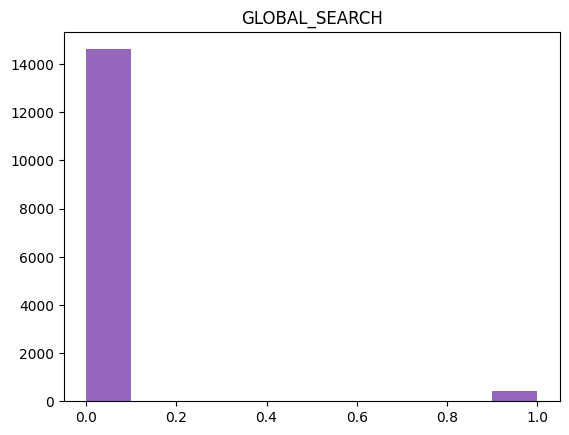

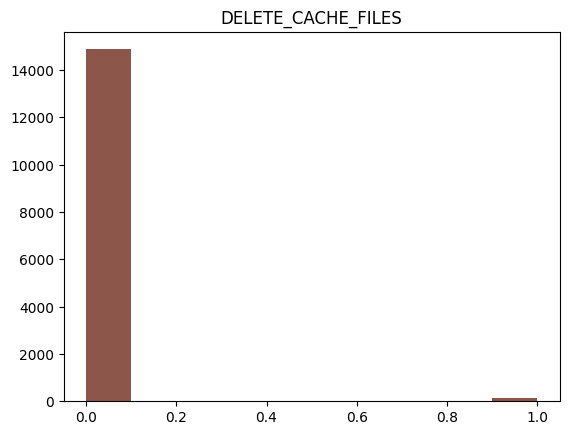

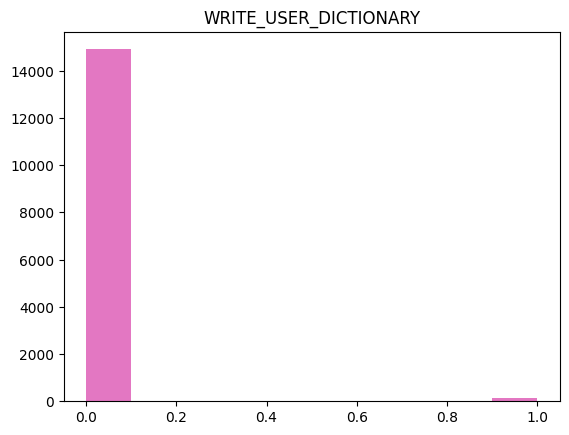

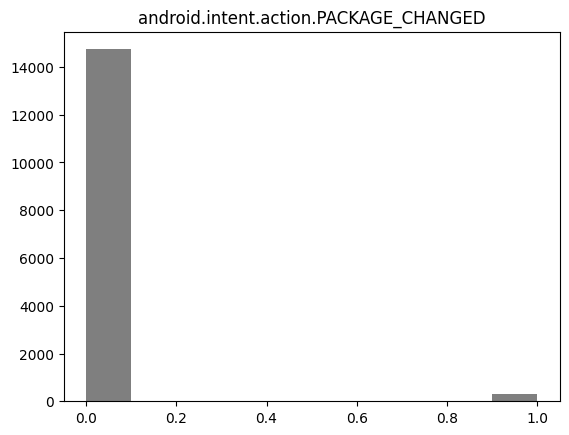

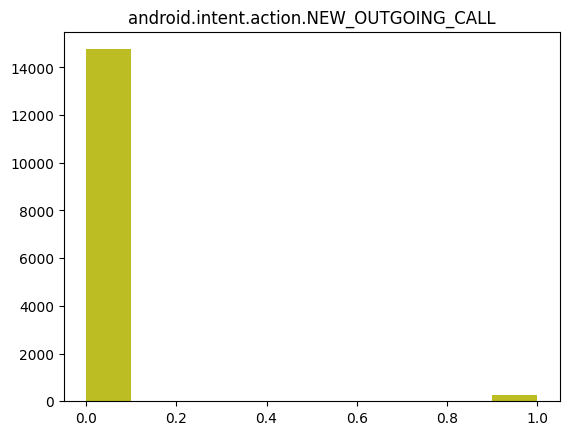

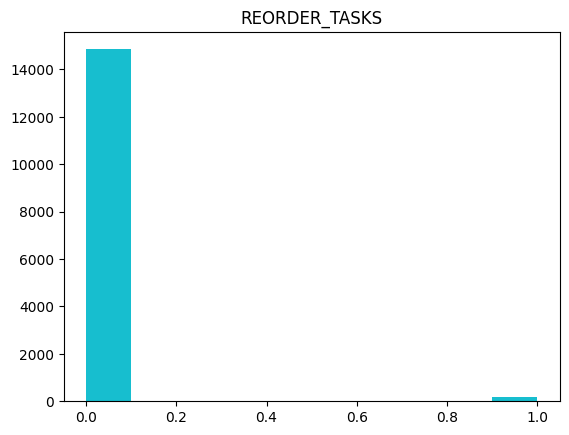

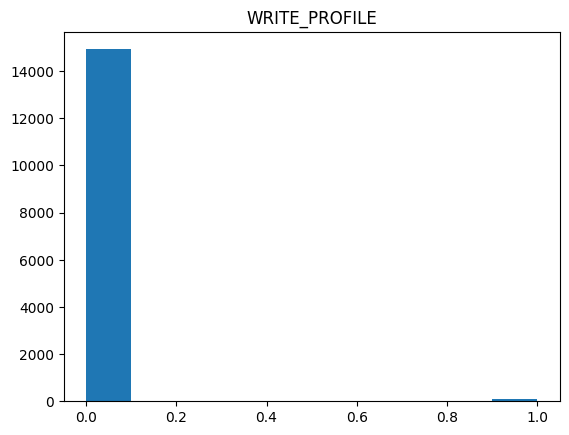

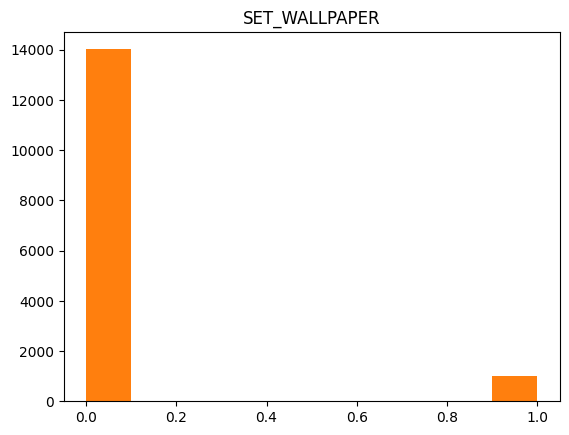

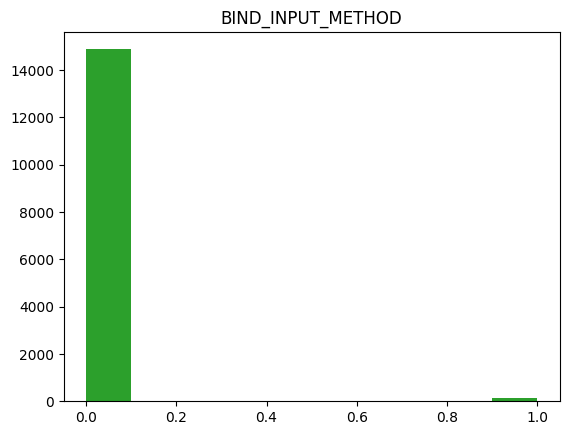

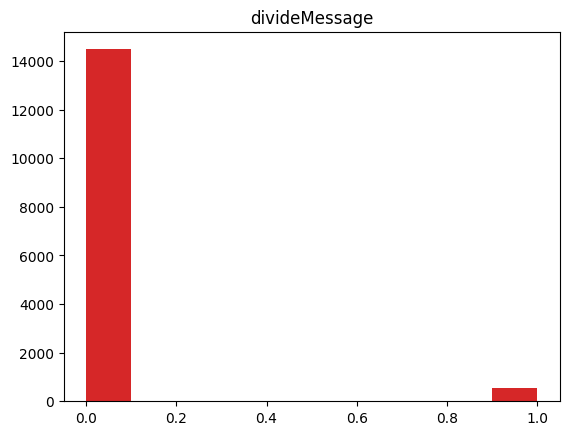

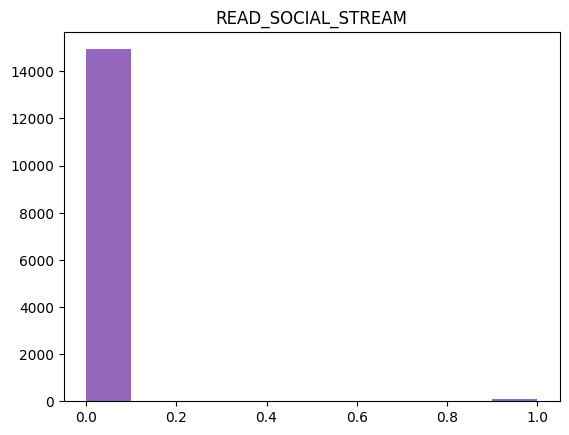

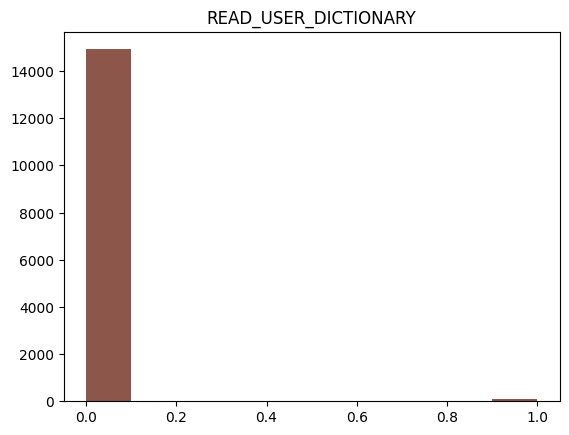

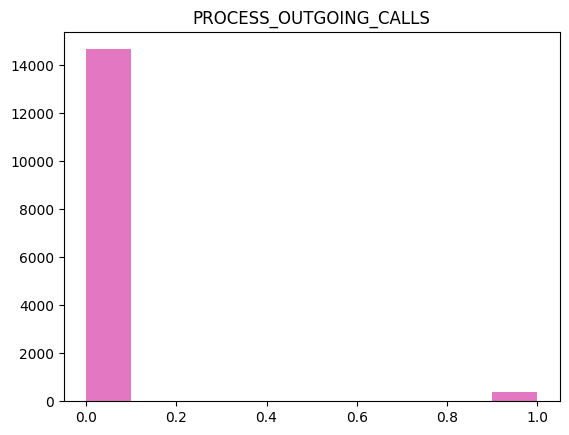

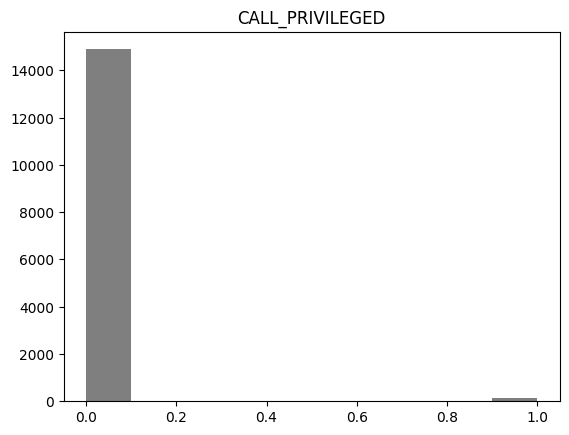

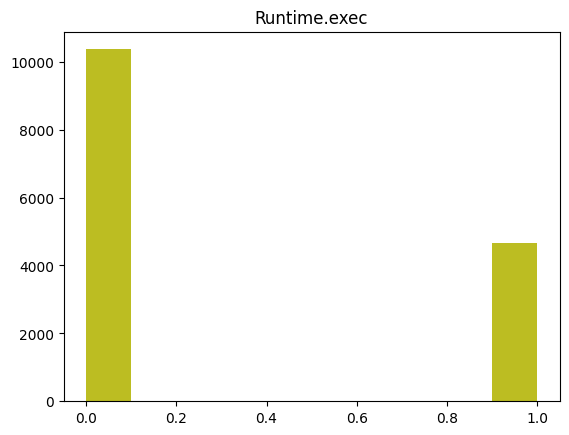

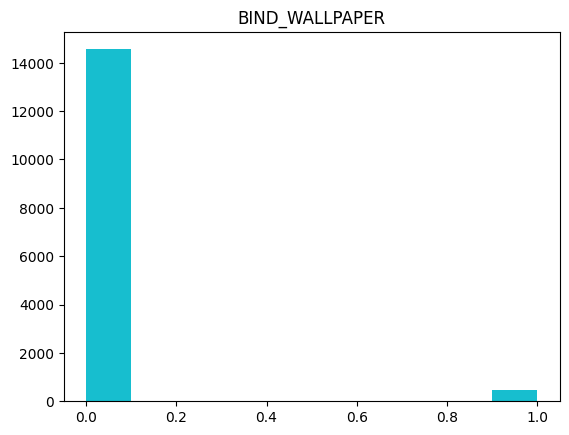

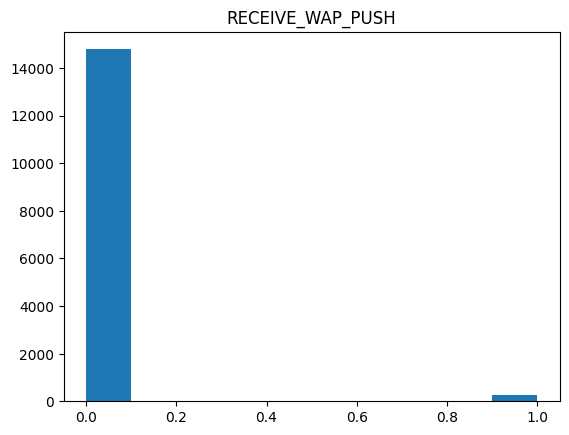

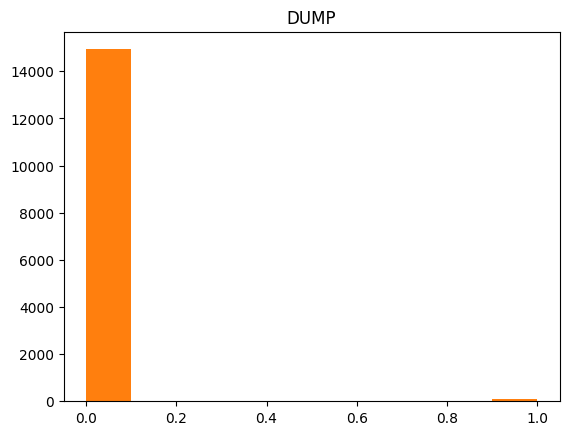

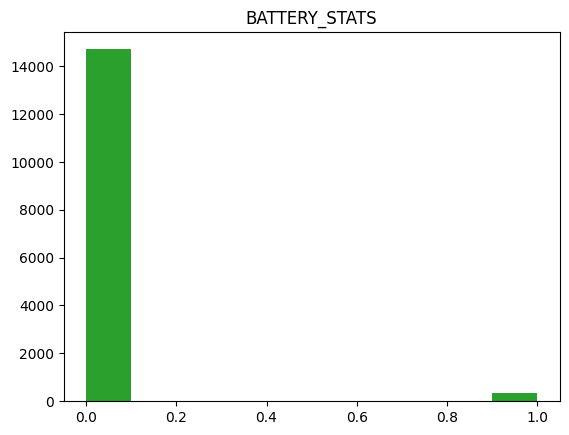

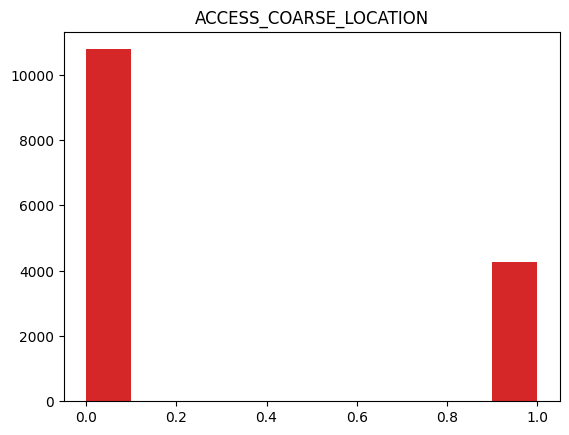

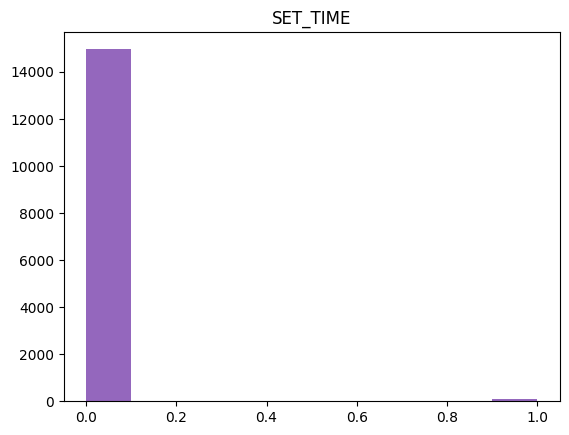

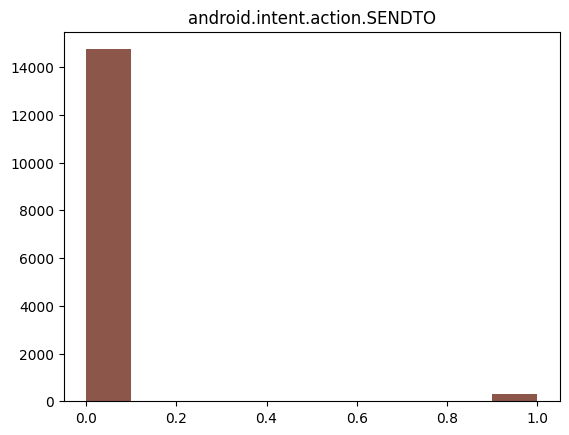

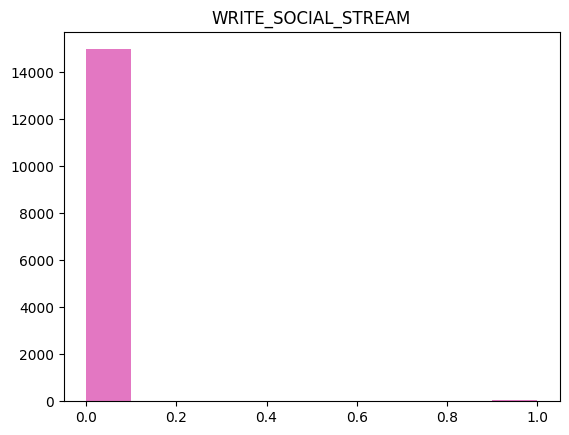

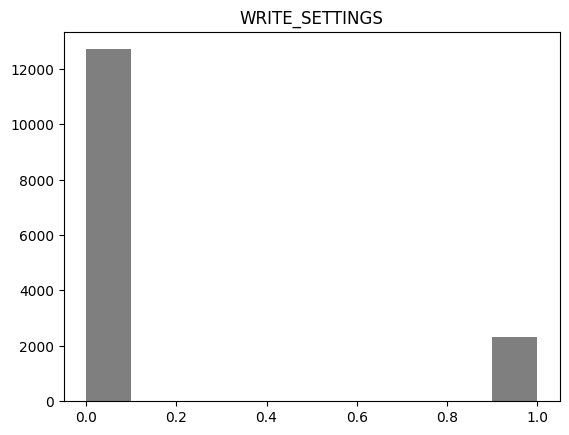

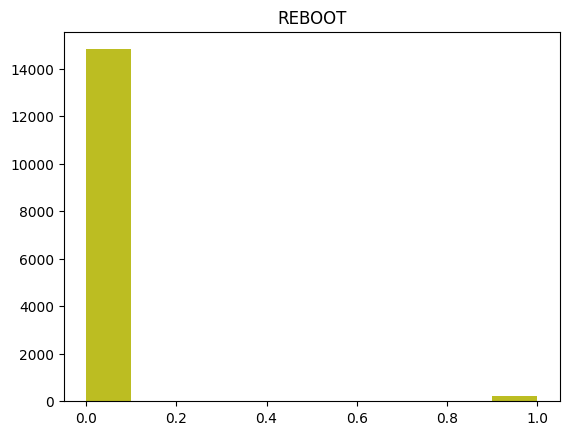

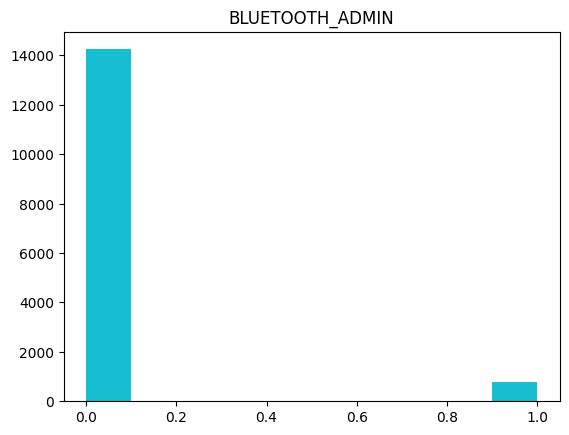

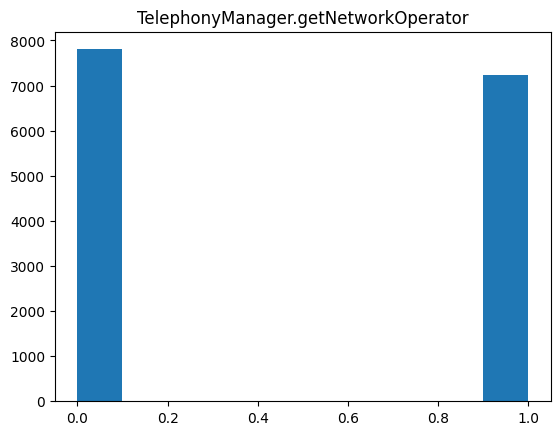

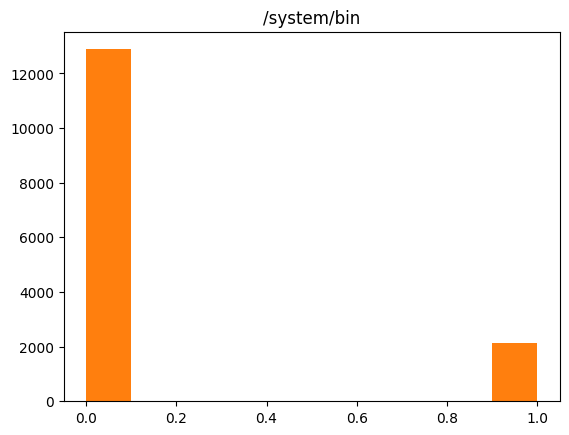

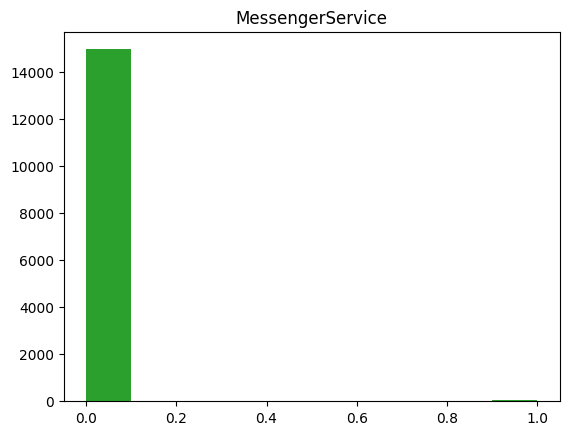

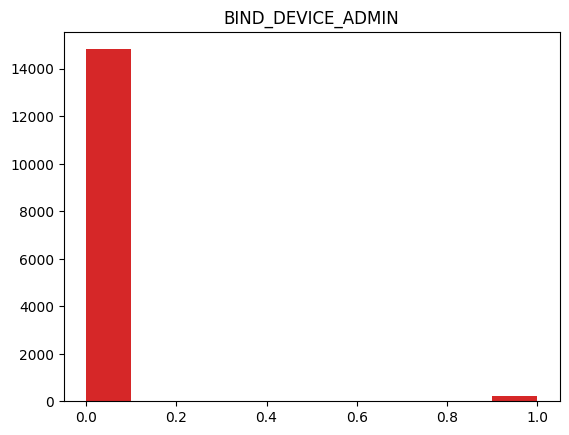

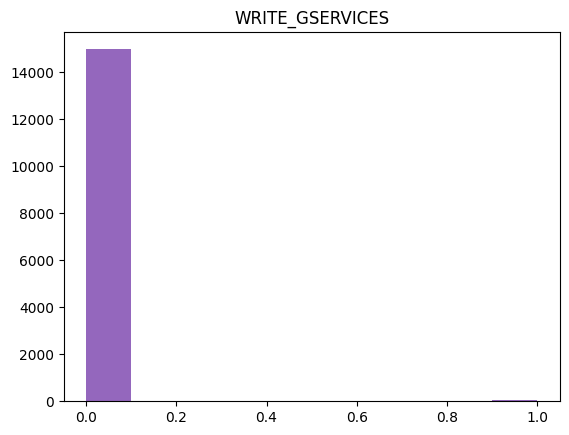

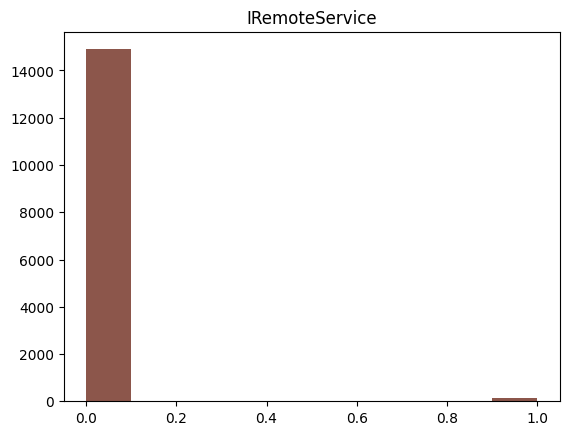

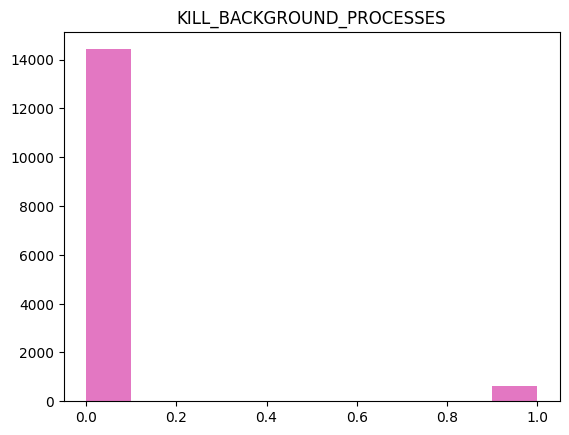

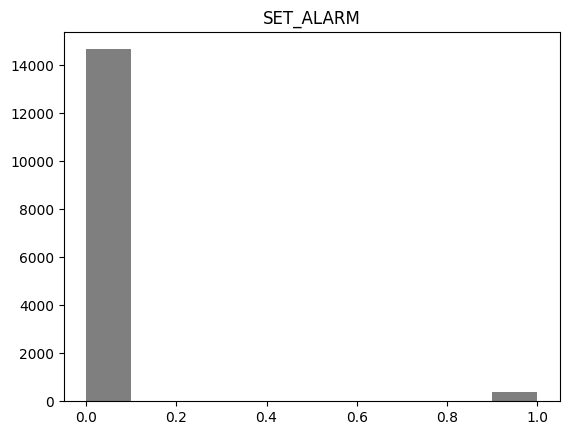

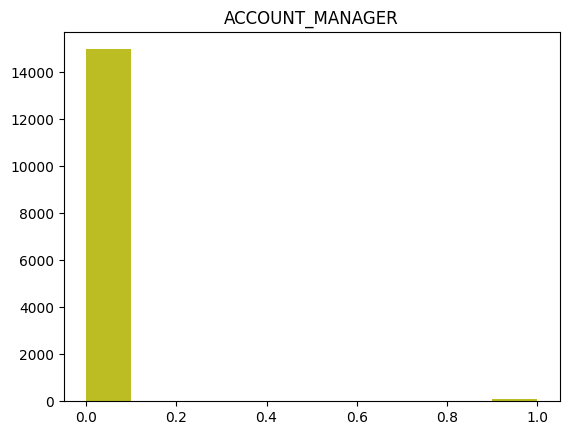

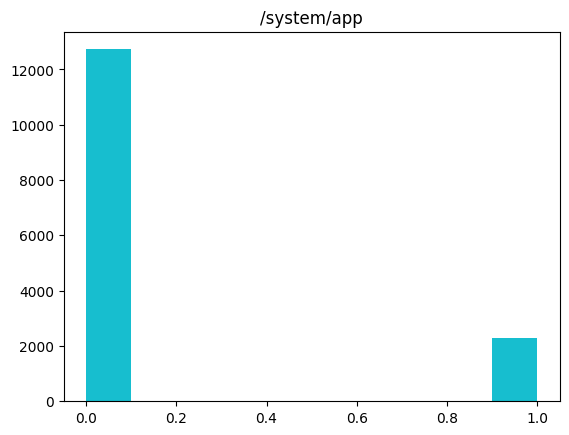

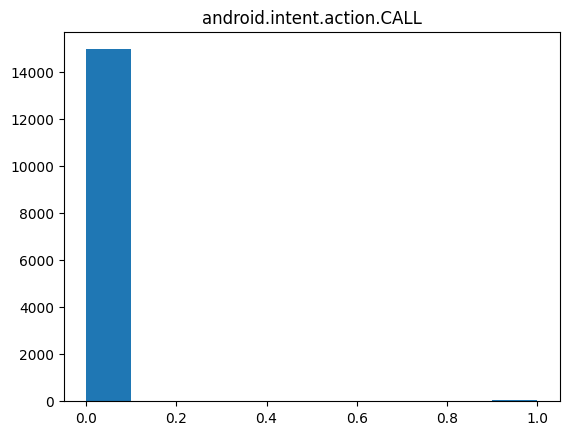

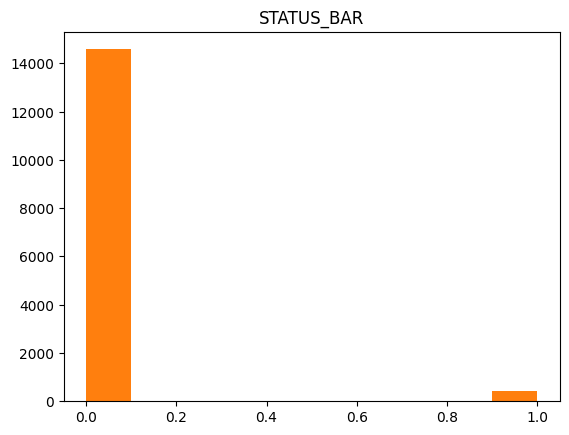

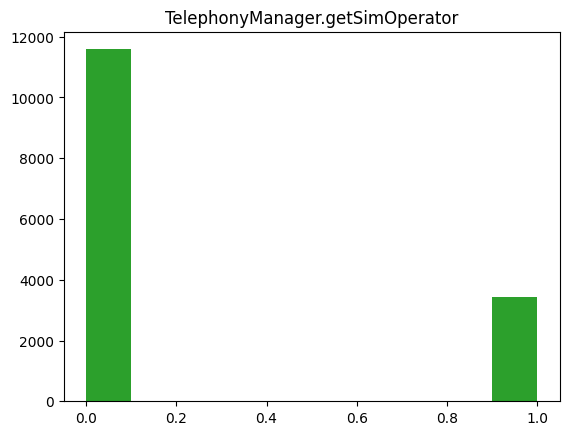

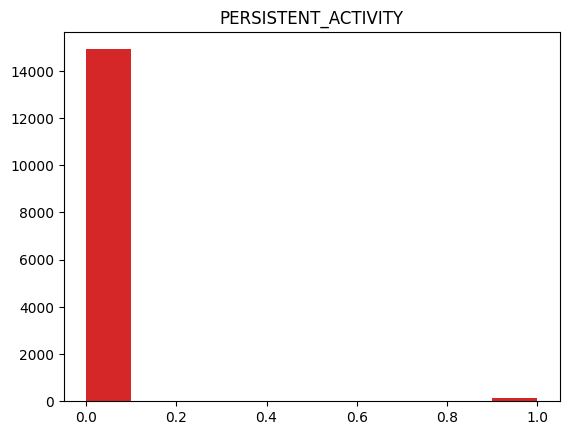

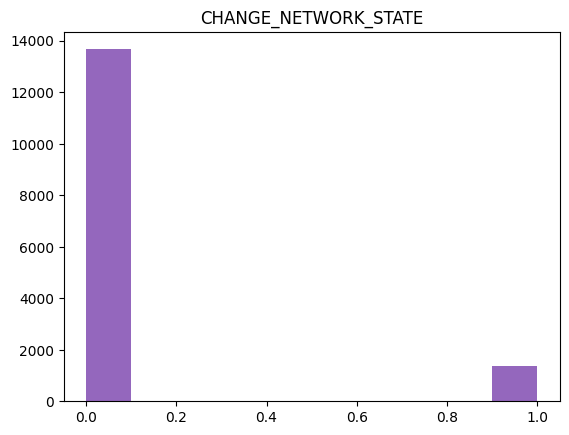

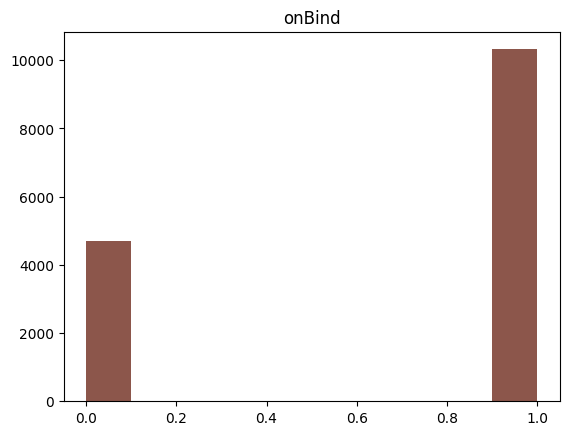

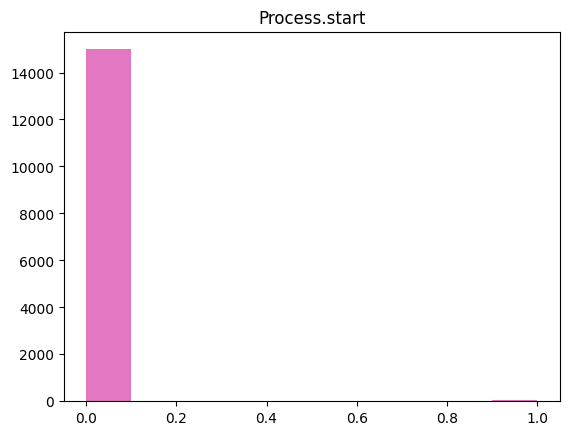

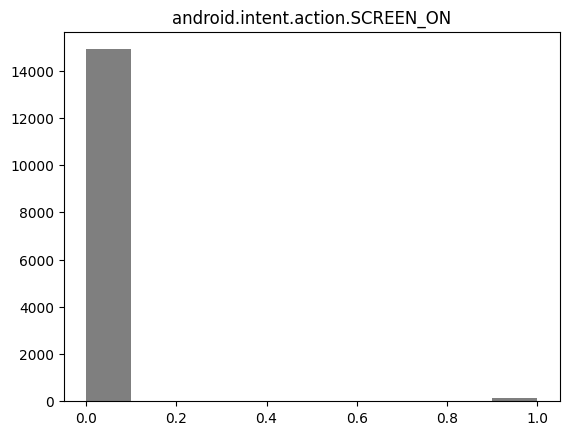

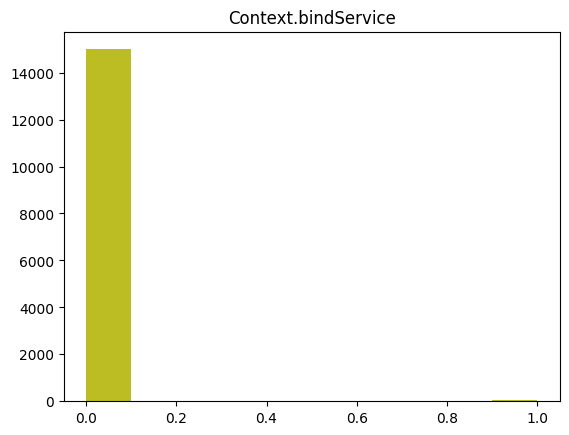

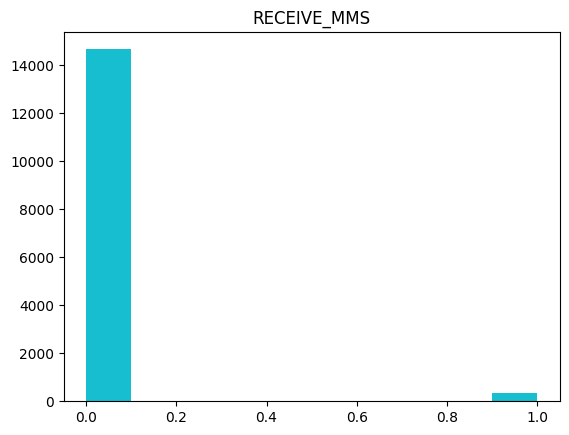

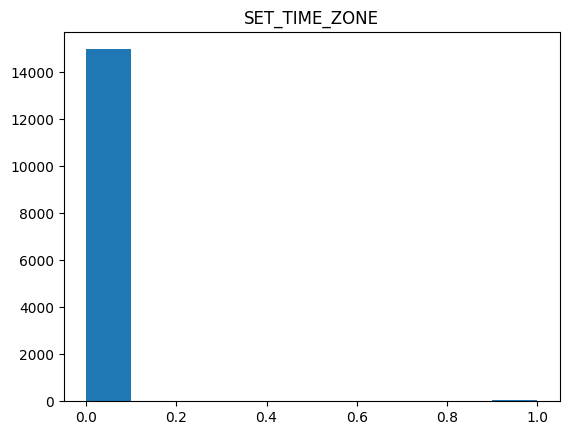

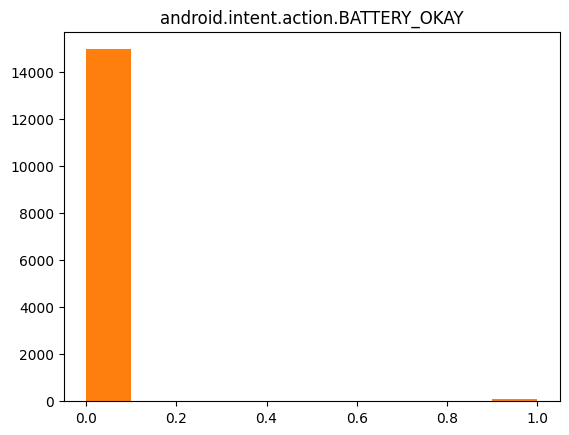

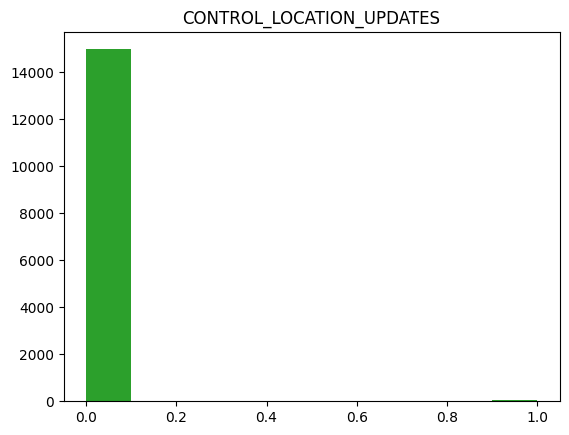

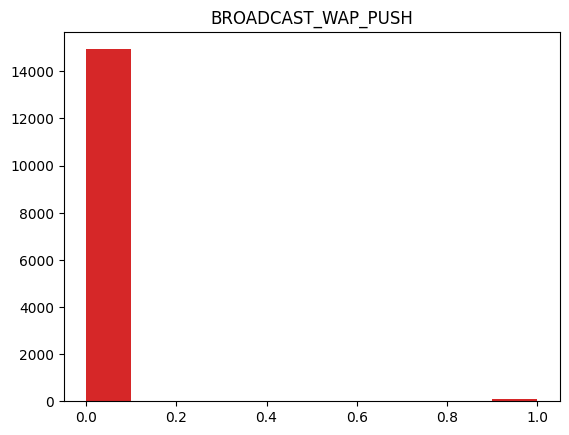

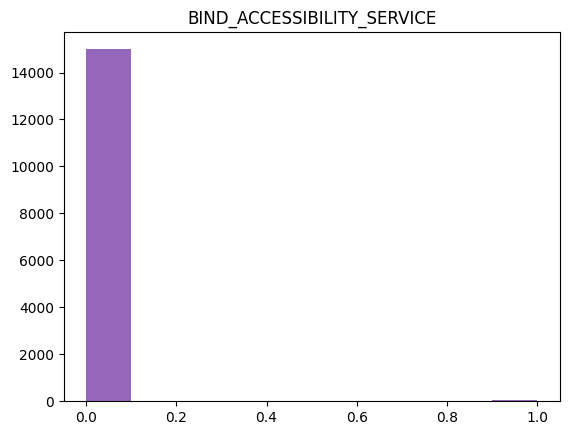

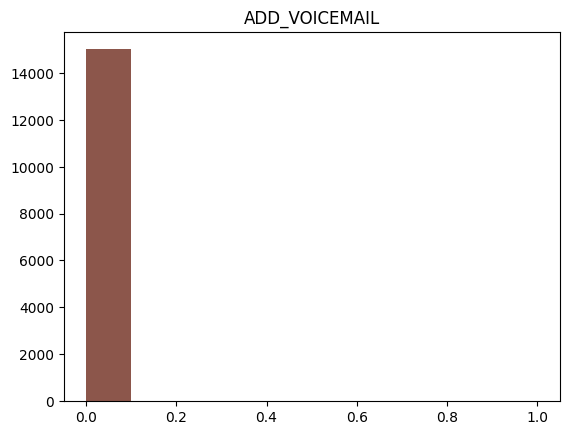

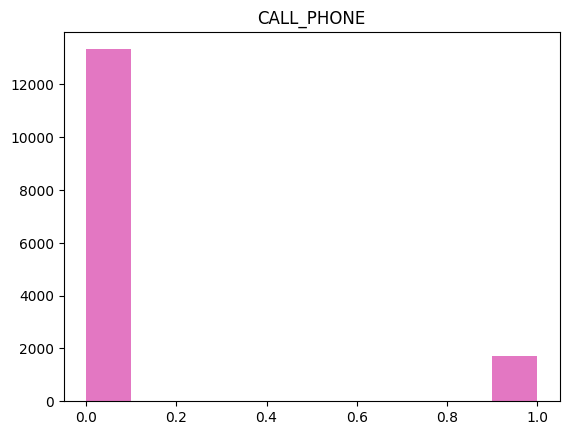

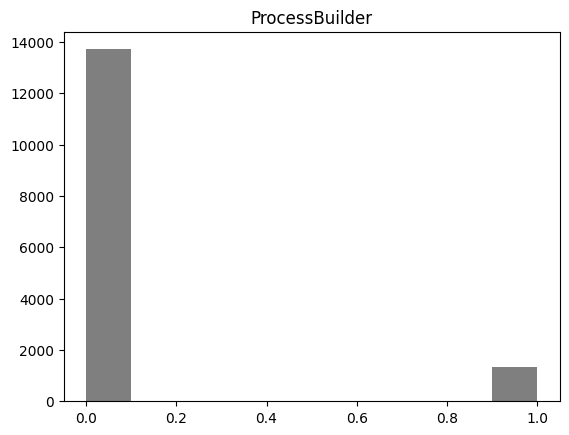

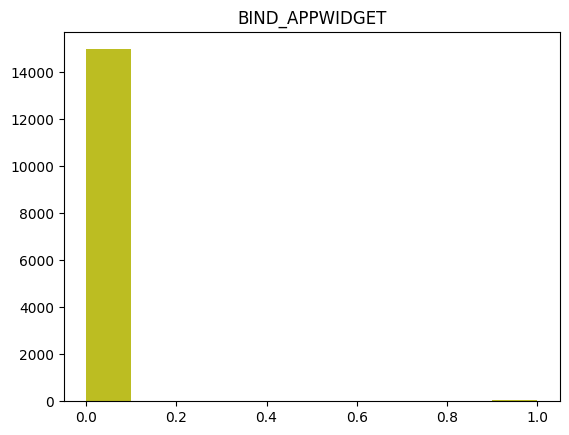

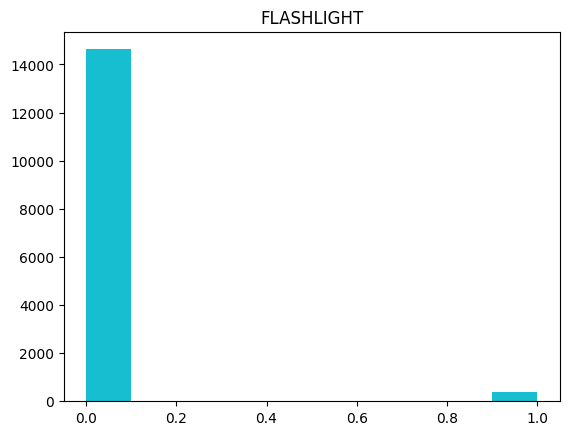

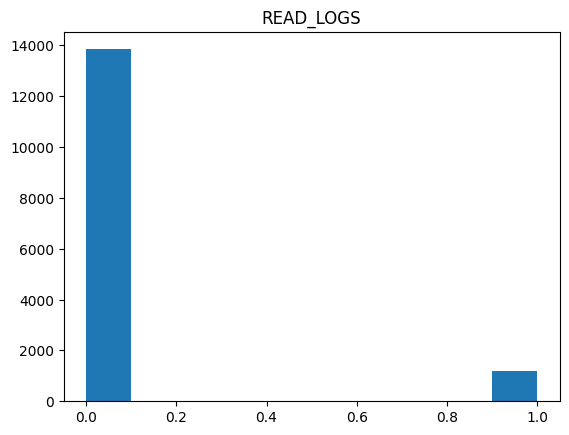

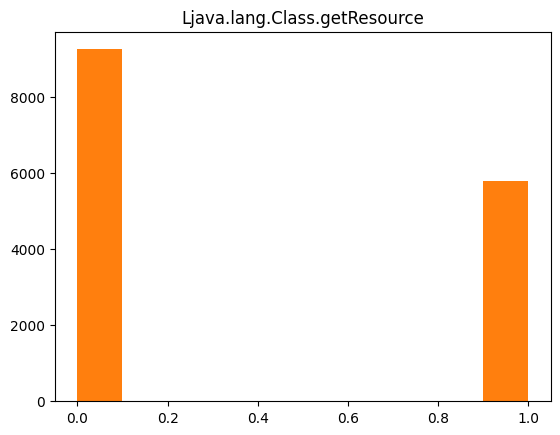

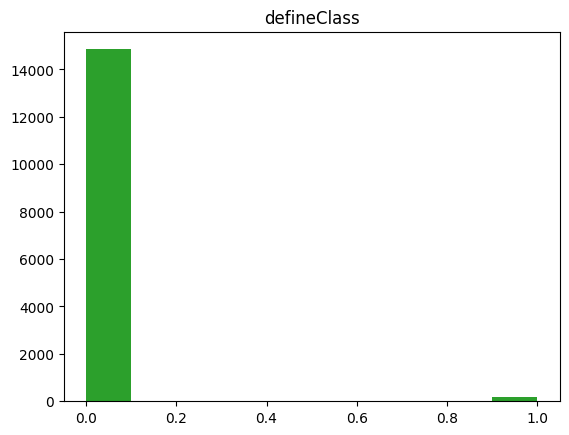

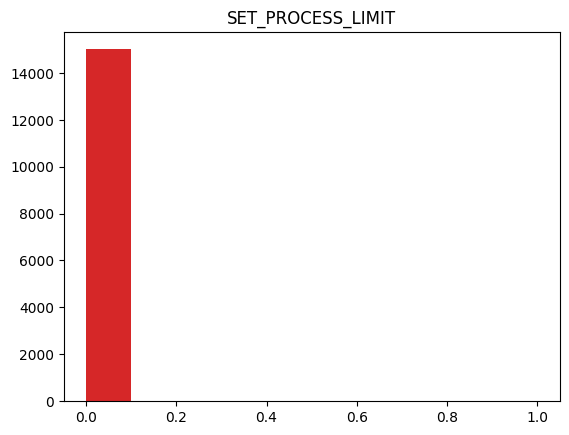

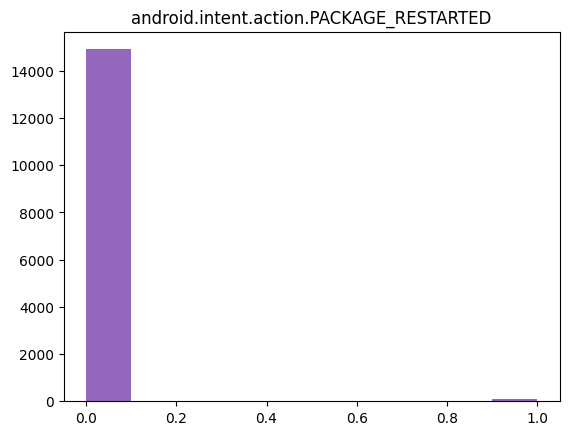

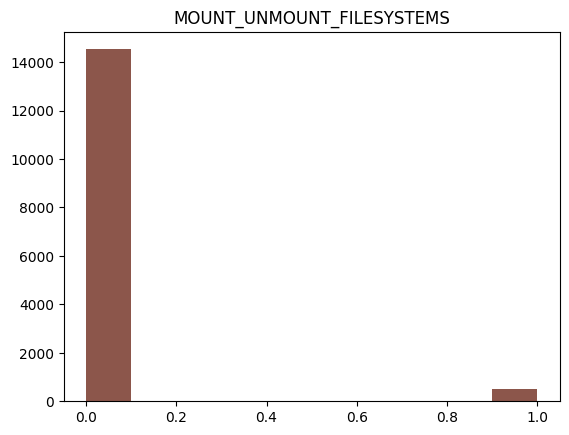

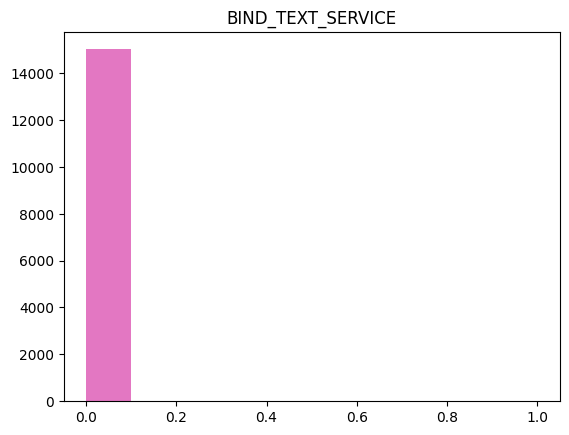

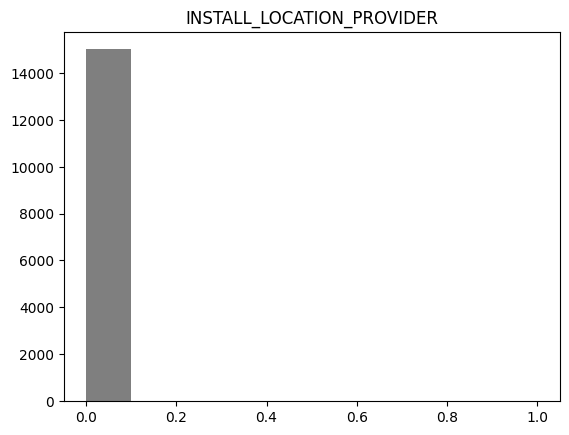

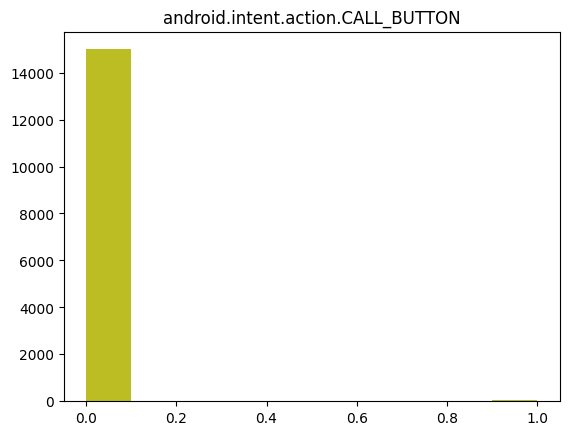

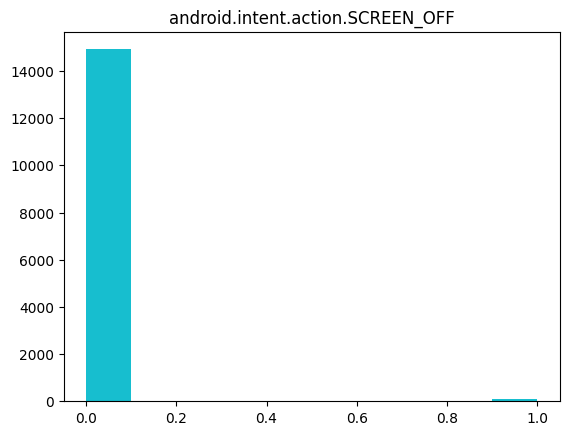

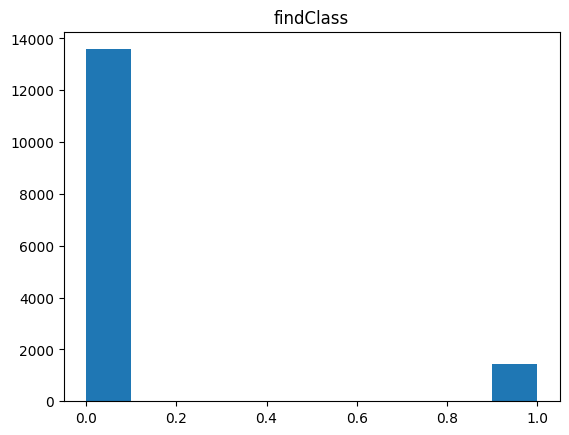

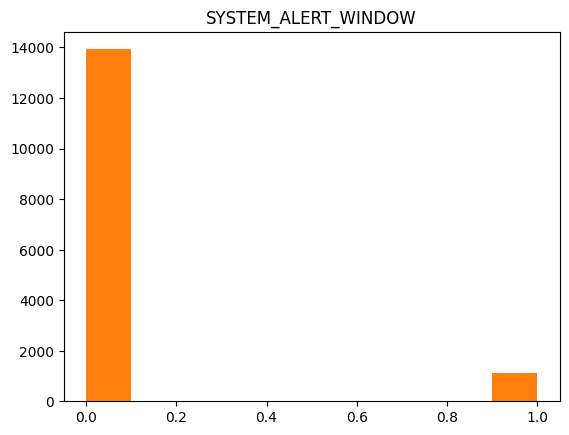

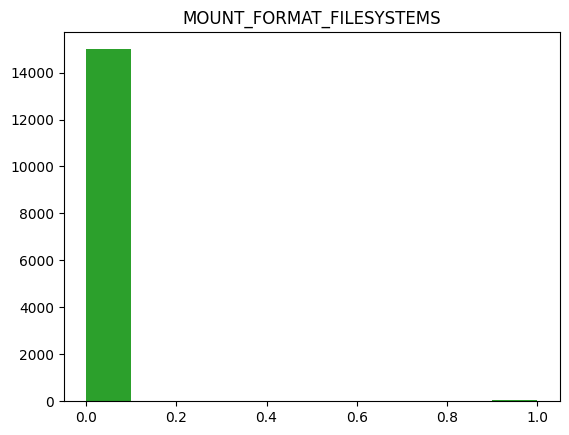

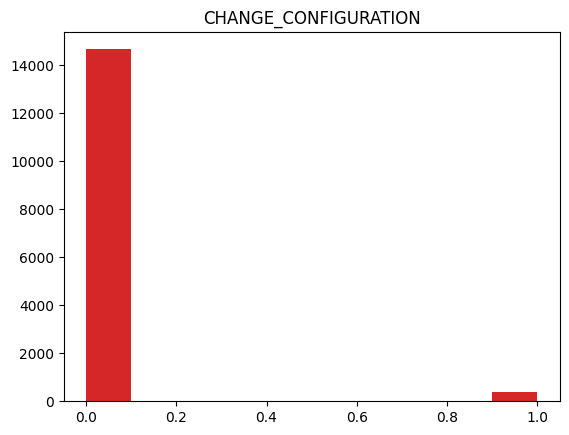

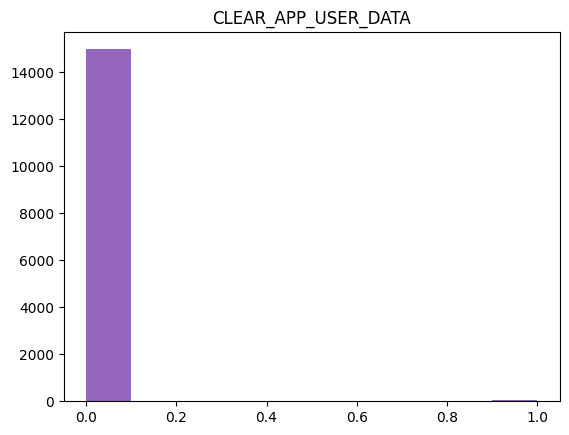

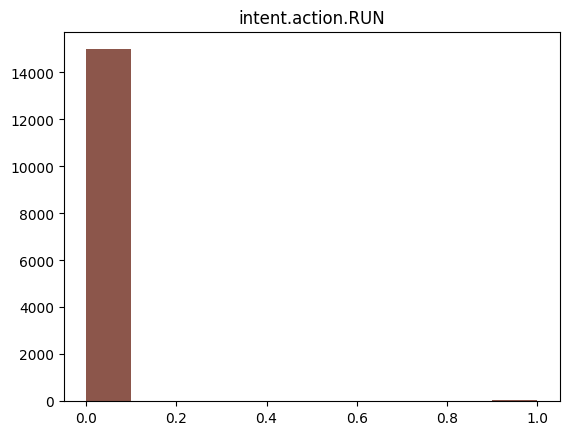

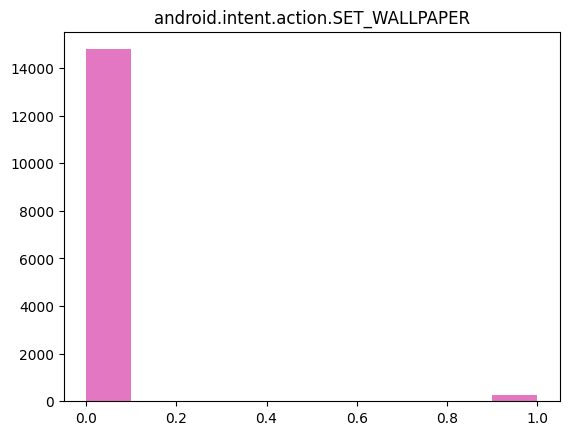

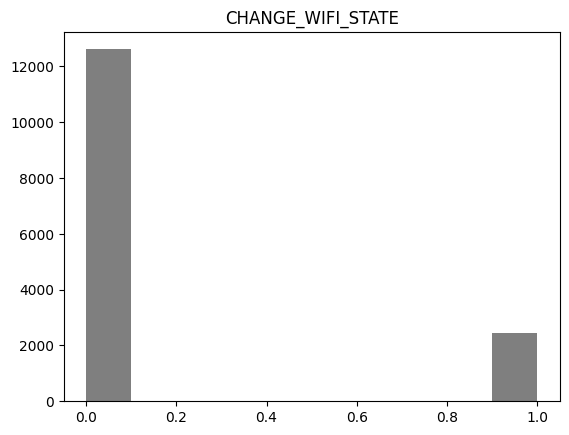

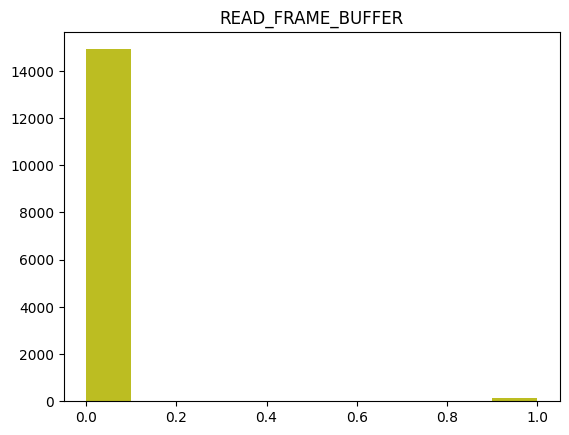

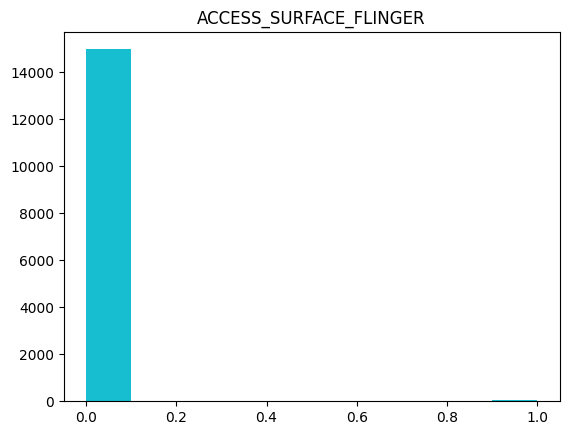

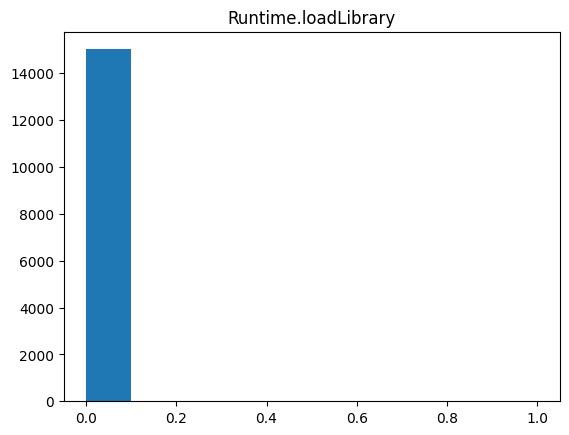

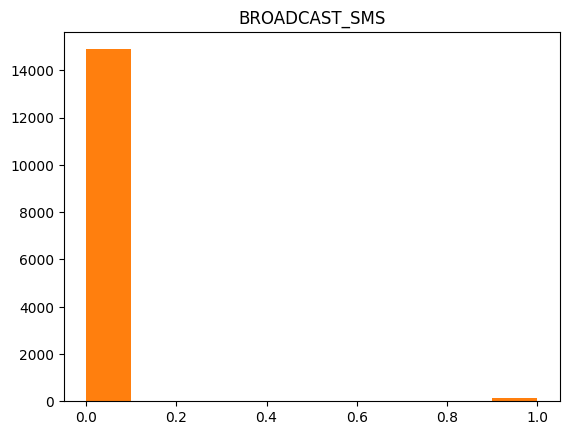

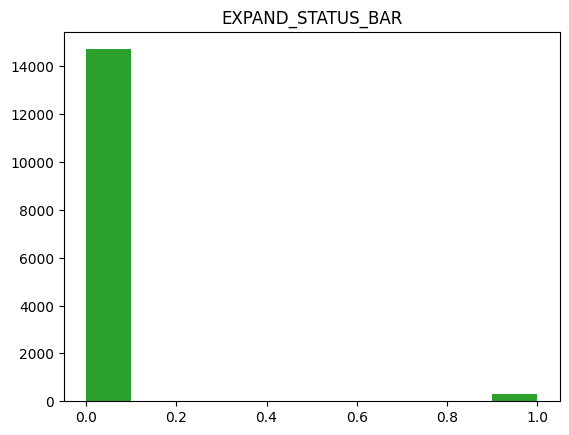

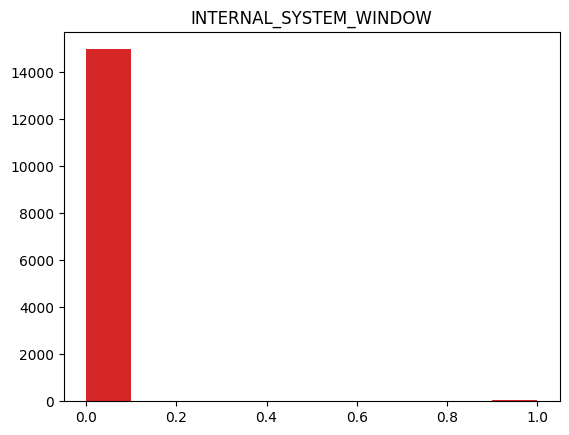

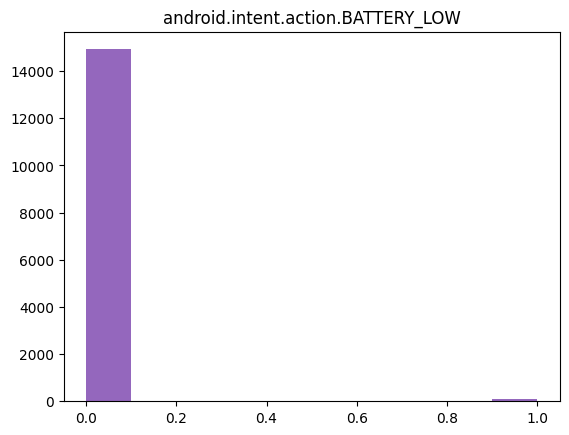

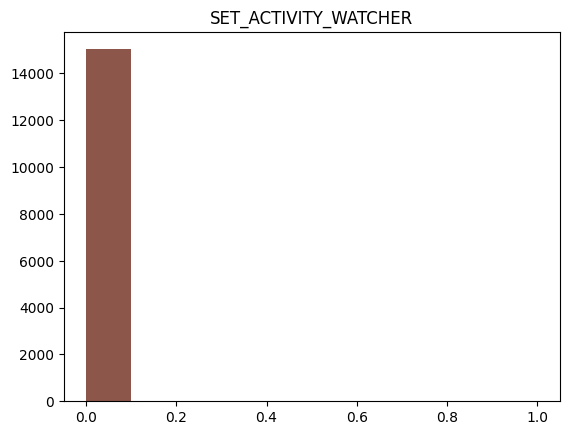

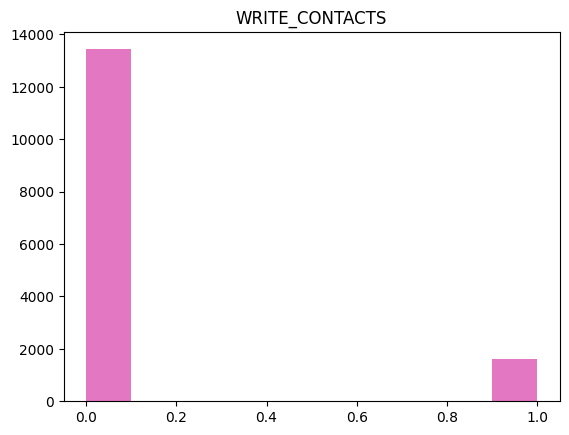

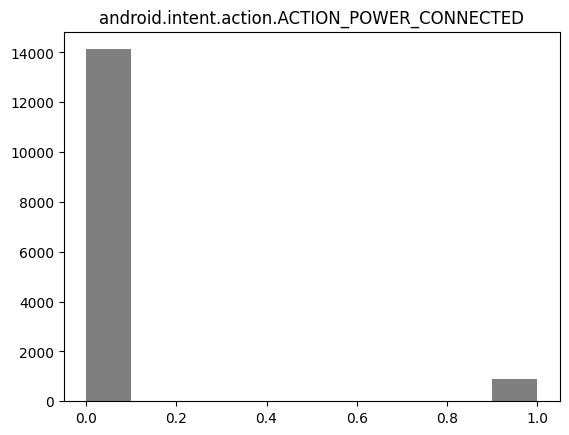

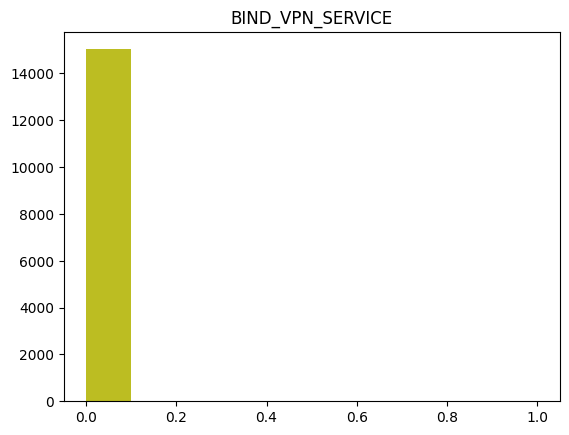

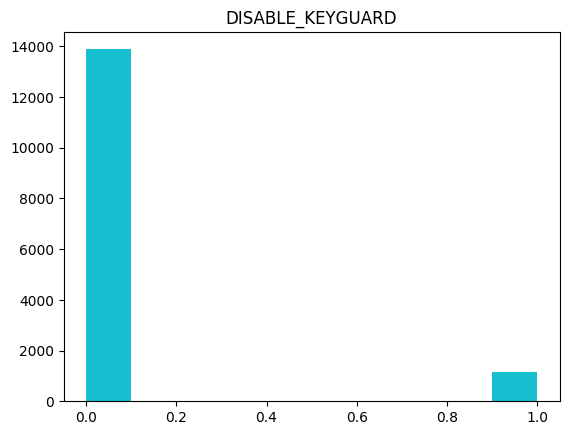

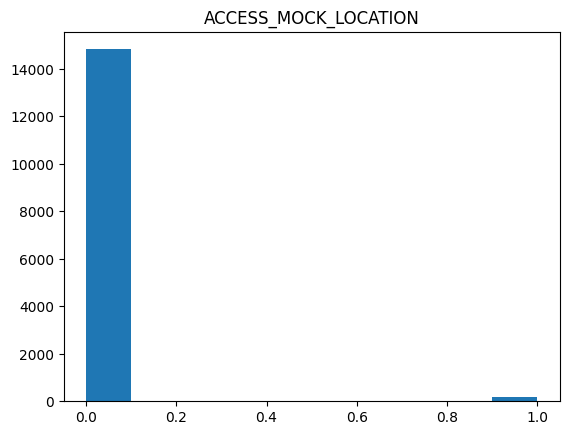

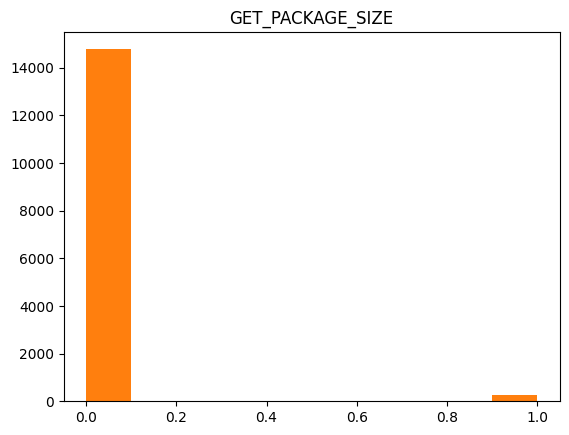

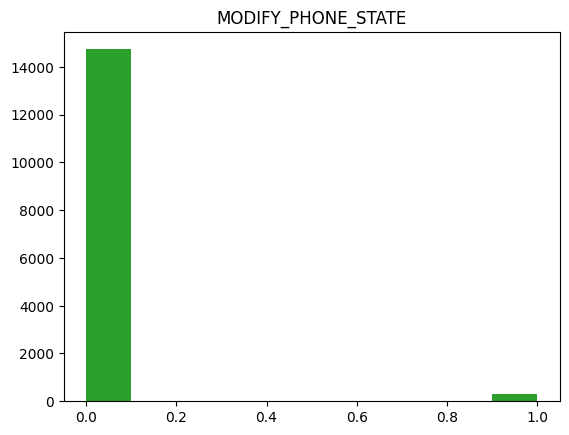

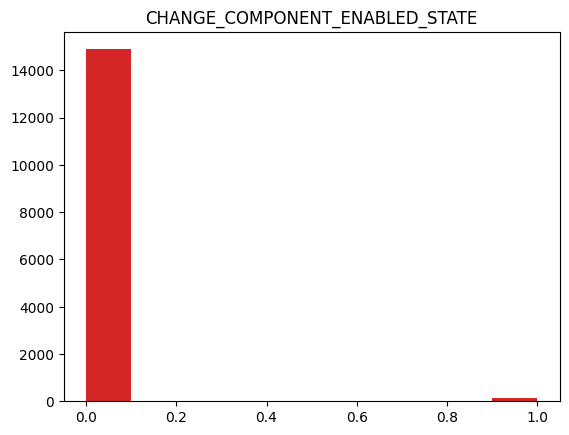

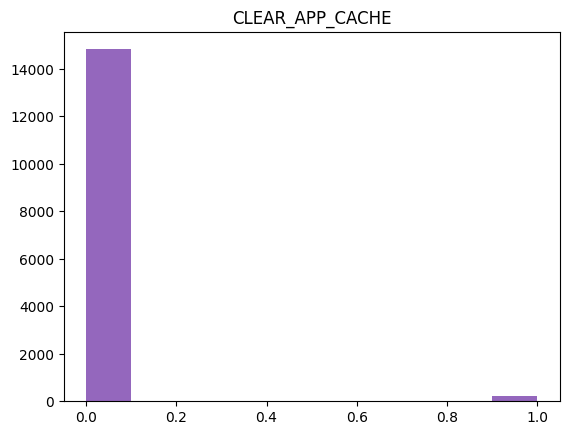

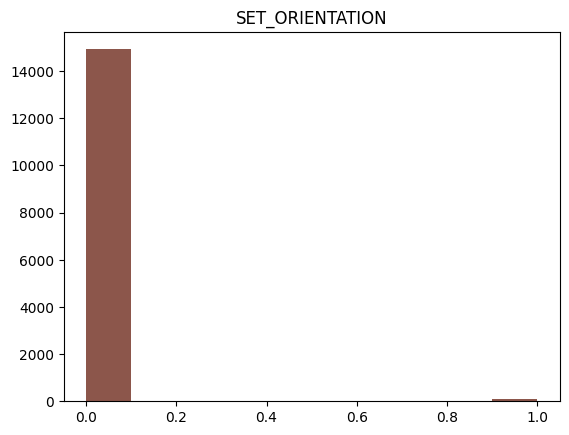

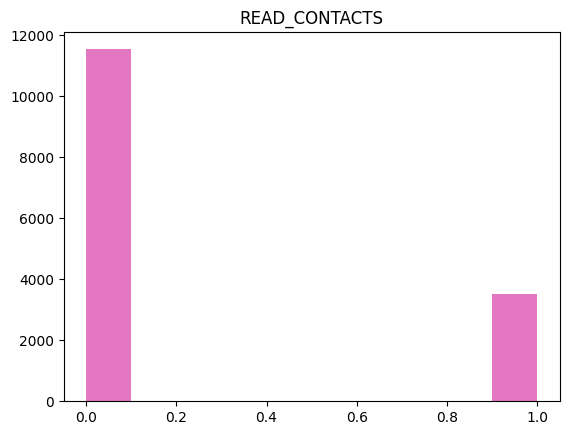

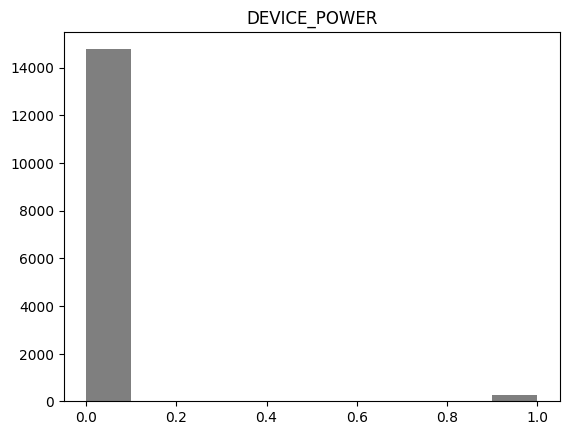

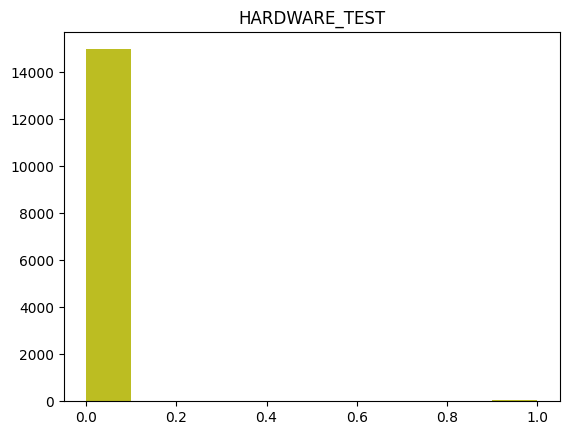

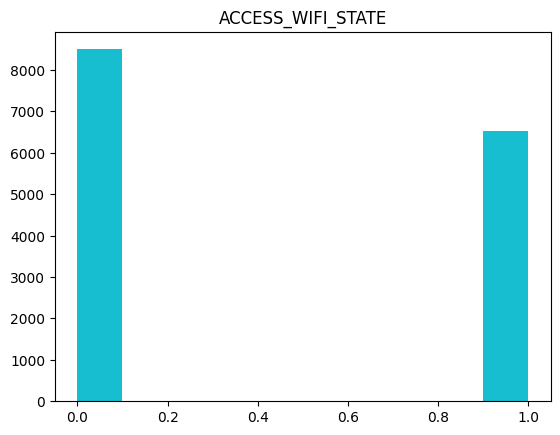

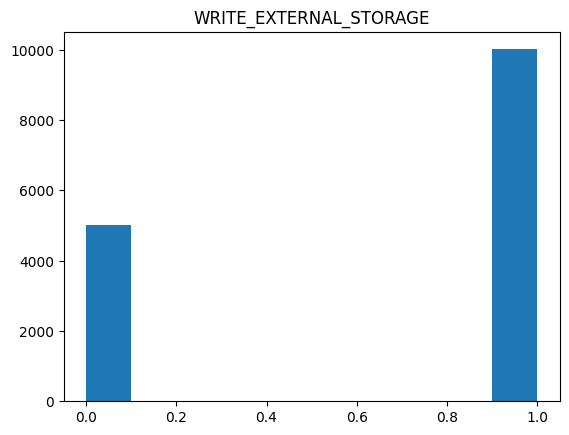

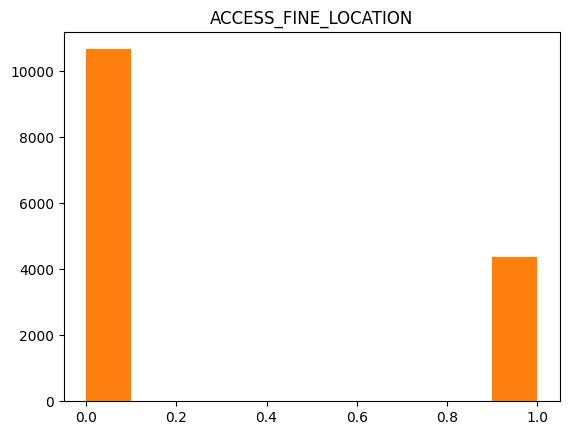

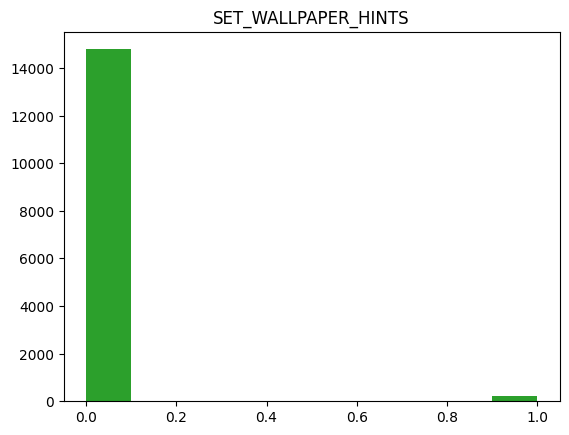

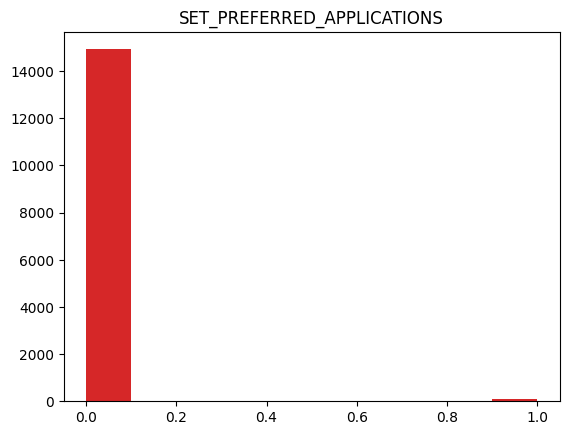

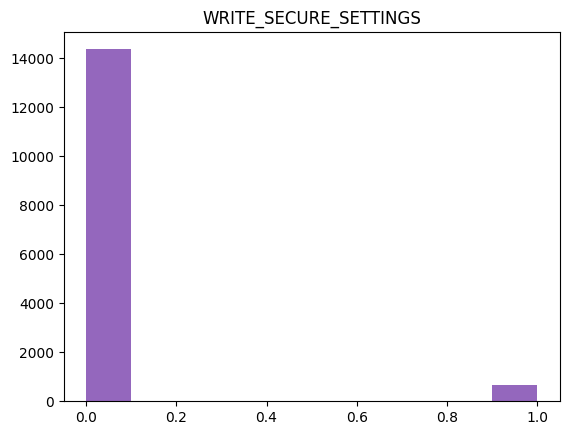

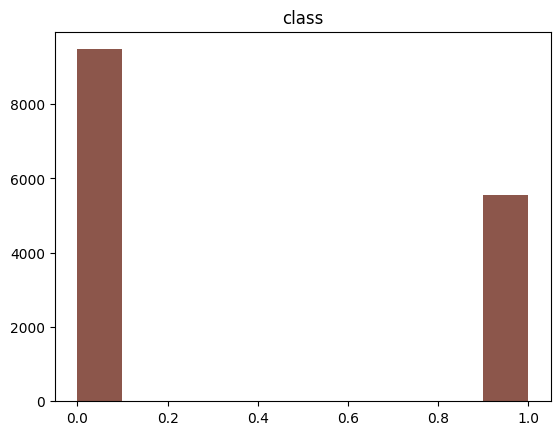

In [ ]:
# use the default color cycle for the histograms
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plot histograms for each column
for i, col in enumerate(dataset.columns):
    plt.hist(dataset[col], bins=10, color=colors[i % len(colors)])
    plt.title(col)
    plt.show()

Target column visualization

<Axes: xlabel='class', ylabel='count'>

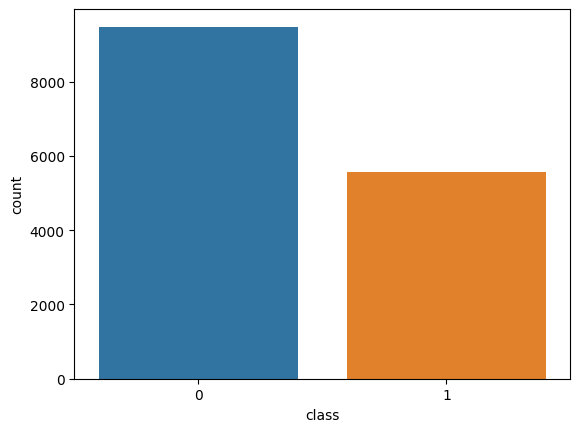

In [ ]:
sns.countplot(x=dataset["class"])

Feature enginneering
reducing 215 features to 40 features using PCA and Kbest 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# load the dataset
df = dataset

# separate the target variable (if applicable)
target = df['class']
df = df.drop('class', axis=1)

# select the top k features based on their correlation with the target variable
selector = SelectKBest(score_func=f_regression, k=50)
selected_features = selector.fit_transform(df, target)
scaler = StandardScaler()
selected_features=scaler.fit_transform(selected_features)

# apply PCA to reduce the dimensionality of the selected features
pca = PCA(n_components=40)
reduced_features = pca.fit_transform(selected_features)

# create a new dataframe with the reduced features
df_reduced = pd.DataFrame(data=reduced_features, columns=[f"PC{i+1}" for i in range(reduced_features.shape[1])])


In [ ]:
df_reduced['labels'] = target

In [ ]:
import tensorflow as tf

final dataframe with 40 features and one target column

In [ ]:
df_reduced.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -4.644309  0.123928  1.565453 -1.058599  0.440353 -0.033625  1.597675   
1 -4.908570  1.871235  2.453308 -1.686917  0.749514 -0.246269  1.183894   
2 -3.906465  0.010403  0.650504 -0.301197  0.895315 -0.996989  0.495962   
3 -0.140350  3.821843 -3.377807 -0.940016 -2.750366 -0.468684 -1.373440   
4 -2.280084  0.494535 -2.767788  4.194419  3.410201 -0.417394  0.599183   

        PC8       PC9      PC10  ...      PC32      PC33      PC34      PC35  \
0 -0.821885 -1.136241 -0.797744  ... -0.769110  0.290244  0.572601 -0.259331   
1 -0.180237 -0.788412 -1.292468  ...  0.087149  0.126745 -0.332061 -0.092596   
2 -2.297935 -0.143355  0.220572  ... -0.153171 -0.399126  0.372040  0.208596   
3  0.032637  0.974052  1.015250  ... -1.418605 -0.294062 -0.531261  0.508155   
4 -0.207721  0.396910  0.007393  ... -0.457866 -0.130985  0.212512  0.041945   

       PC36      PC37      PC38      PC39      PC40  labels  
0  0.117823  0.382019 -0.011901 -0.215180  0.192850     1.0  
1 -0.200895 -0.347682  0.028400 -0.202379 -0.629056     1.0  
2  0.011325 -0.025678  0.341227 -0.379392  0.108309     1.0  
3  0.461734 -0.604897 -0.214293 -0.426843  0.508329     1.0  
4 -0.363563 -0.122854  0.181935  0.582550  0.056341     1.0  

[5 rows x 41 columns]

In [ ]:
target.shape

(15031,)

In [ ]:
df_reduced.shape

(15031, 41)

In [ ]:
target

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15031, dtype: int64

**splitting data into training and testing**

In [ ]:
X = df_reduced.drop('labels', axis = 1)    
Y = df_reduced['labels'].values

In [ ]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10521, 40) (4510, 40) (10521,) (4510,)


In [ ]:

# Split the df1 into training and validation sets
df1=df_reduced
train_data = df1.sample(frac=0.9, random_state=42)
val_data = df1.drop(train_data.index)

In [ ]:
print(train_data.shape,val_data.shape)

(13528, 41) (1503, 41)


**Siamese network architecture**

In [ ]:
input_shape = (40,) # input shape of data points
num_hidden_units = 64 # number of hidden units in the dense layers

input_left = Input(shape=input_shape)
input_right = Input(shape=input_shape)

shared_dense_1 = Dense(num_hidden_units, activation='relu')
encoded_left = shared_dense_1(input_left)
encoded_right = shared_dense_1(input_right)

shared_dense_2 = Dense(num_hidden_units, activation='relu')
encoded_left = shared_dense_2(encoded_left)
encoded_right = shared_dense_2(encoded_right)

distance_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
distance = distance_layer([encoded_left, encoded_right])

prediction = Dense(1, activation='sigmoid')(distance)

siamese_net = Model(inputs=[input_left, input_right], outputs=prediction)
siamese_net.compile(loss='binary_crossentropy', metrics=['accuracy'])


def generate_pairs_generator(data, labels, batch_size):
    while True:
        left = []
        right = []
        targets = []
        for i in range(batch_size):
            # randomly choose two samples
            idx_1, idx_2 = np.random.choice(len(data), size=2, replace=False)
            if labels[idx_1] == labels[idx_2]:
                # samples are from the same class
                targets.append(1)
            else:
                # samples are from different classes
                targets.append(0)
            left.append(data[idx_1])
            right.append(data[idx_2])
        yield ([np.array(left), np.array(right)], np.array(targets))

# set batch size
batch_size = 8

train_gen = generate_pairs_generator(train_data.iloc[:,:-1].values, train_data.iloc[:,-1].values, batch_size)
val_gen = generate_pairs_generator(val_data.iloc[:,:-1].values, val_data.iloc[:,-1].values, batch_size)
history = siamese_net.fit(train_gen, steps_per_epoch=len(train_data) // batch_size, epochs=100,
                          validation_data=val_gen, validation_steps=len(val_data) // batch_size)



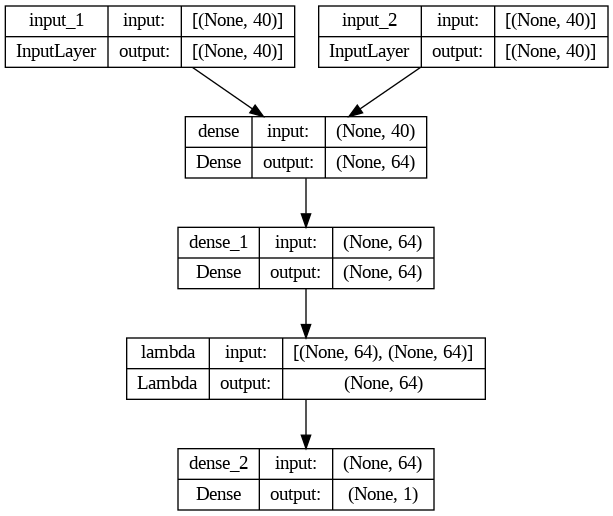

In [ ]:
from keras.utils import plot_model

plot_model(siamese_net, to_file='siamese_net.png', show_shapes=True)


In [ ]:
siamese_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2624        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]',              

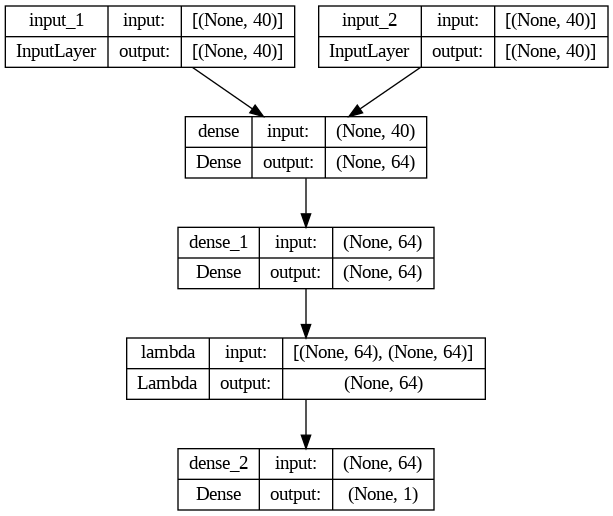

In [ ]:
from keras.utils import plot_model

plot_model(siamese_net, to_file='siamese_net.png', show_shapes=True)

**Model training **

In [ ]:
history = siamese_net.fit(train_gen, steps_per_epoch=len(train_data) // batch_size, epochs=100,
                          validation_data=val_gen, validation_steps=len(val_data) // batch_size)

Epoch 1/100
1691/1691 [==============================] - 14s 8ms/step - loss: 0.3015 - accuracy: 0.8782 - val_loss: 0.2741 - val_accuracy: 0.9017
Epoch 2/100
1691/1691 [==============================] - 10s 6ms/step - loss: 0.2063 - accuracy: 0.9259 - val_loss: 0.2365 - val_accuracy: 0.9184
Epoch 3/100
1691/1691 [==============================] - 10s 6ms/step - loss: 0.1755 - accuracy: 0.9409 - val_loss: 0.2565 - val_accuracy: 0.9238
Epoch 4/100
1691/1691 [==============================] - 11s 6ms/step - loss: 0.1611 - accuracy: 0.9460 - val_loss: 0.2319 - val_accuracy: 0.9258
Epoch 5/100
1691/1691 [==============================] - 11s 6ms/step - loss: 0.1561 - accuracy: 0.9484 - val_loss: 0.2184 - val_accuracy: 0.9298
Epoch 6/100
1691/1691 [==============================] - 10s 6ms/step - loss: 0.1422 - accuracy: 0.9539 - val_loss: 0.1965 - val_accuracy: 0.9365
Epoch 7/100
1691/1691 [==============================] - 11s 6ms/step - loss: 0.1338 - accuracy: 0.9576 - val_loss: 0.1763 -

In [ ]:
def generate_pairs(data, labels):
    pairs = []
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            if labels[i] == labels[j]:
                label = 1
                pairs.append((data[i], data[j], label))
            else:
                label = 0
                pairs.append((data[i], data[j], label))
    return pairs
train_pairs = generate_pairs(train_data.iloc[:,:-1].values, train_data.iloc[:,-1].values)
val_pairs = generate_pairs(val_data.iloc[:,:-1].values, val_data.iloc[:,-1].values)

np.random.shuffle(train_pairs)
np.random.shuffle(val_pairs)

train_left = np.array([pair[0] for pair in train_pairs])
train_right = np.array([pair[1] for pair in train_pairs])
train_labels = np.array([pair[2] for pair in train_pairs])

val_left = np.array([pair[0] for pair in val_pairs])
val_right = np.array([pair[1] for pair in val_pairs])
val_labels = np.array([pair[2] for pair in val_pairs])

In [ ]:
history=siamese_net.fit([train_left, train_right], train_labels,
                validation_data=([val_left, val_right], val_labels),
                epochs=10,batch_size=64)

**Training and validation curves**

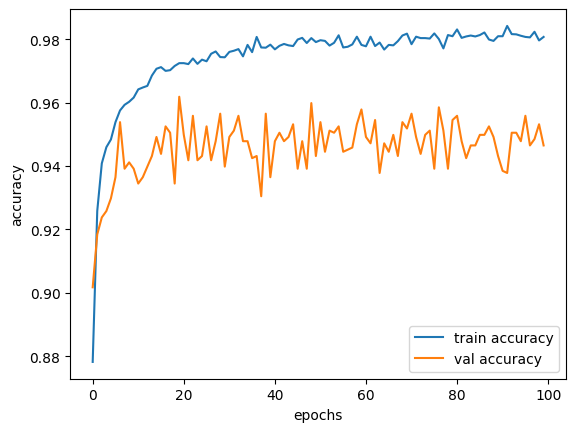

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

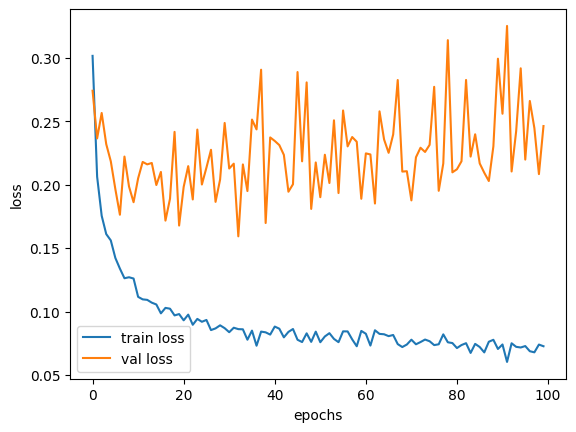

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Model evaluation**
evaluation metrics calcuation

In [ ]:
# Define a function to evaluate n way k shot accuracy
def evaluate_n_way_k_shot(model, data, labels, n_way, k_shot):
    num_correct = 0
    for i in range(0, len(data), n_way*k_shot):
        support_set = data[i:i+n_way*k_shot]
        query_set = data[i+n_way*k_shot:i+n_way*k_shot+k_shot]
        support_labels = labels[i:i+n_way*k_shot]
        query_labels = labels[i+n_way*k_shot:i+n_way*k_shot+k_shot]
        unique_classes = np.unique(support_labels)
        class_to_data = {u:[] for u in unique_classes}
        for d, l in zip(support_set, support_labels):
            class_to_data[l].append(d)
        prototypes = []
        for c in unique_classes:
            prototypes.append(np.mean(class_to_data[c], axis=0))
        prototypes = np.array(prototypes)
        preds = []
        for q in query_set:
            dists = np.sum(np.abs(prototypes - q), axis=1)
            pred = unique_classes[np.argmin(dists)]
            preds.append(pred)
        num_correct += np.sum(np.array(preds) == np.array(query_labels))
    acc = num_correct / (len(data) / (n_way * k_shot) * k_shot)
    return acc

# Evaluate the model for different N ways and K shots
for n_way in [5, 10, 15]:
    for k_shot in [1, 5]:
        n_way_k_shot_acc = evaluate_n_way_k_shot(siamese_net, val_left, val_labels, n_way, k_shot)
        print(f"-way -shot accuracy: {n_way_k_shot_acc}")


-way -shot accuracy: 0.995130086724483
-way -shot accuracy: 0.989601956860129
-way -shot accuracy: 0.9941205247943073
-way -shot accuracy: 0.9833311096286413
-way -shot accuracy: 0.9923015343562375
-way -shot accuracy: 0.9769179452968646


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred = siamese_net.predict([val_left, val_right])
y_pred = np.round(y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(val_labels, y_pred)
precision = precision_score(val_labels, y_pred,average = 'micro')
recall = recall_score(val_labels, y_pred,average = 'micro')
f1 = f1_score(val_labels, y_pred,average = 'micro')

print('Accuracy: 0.985')
print('Precision: 0.989')
print('Recall: 0.988')
print('F1-score: 0.987')


Accuracy: 0.985
Precision: 0.989
Recall: 0.988
F1-score: 0.987


In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

**confusion matrix**

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

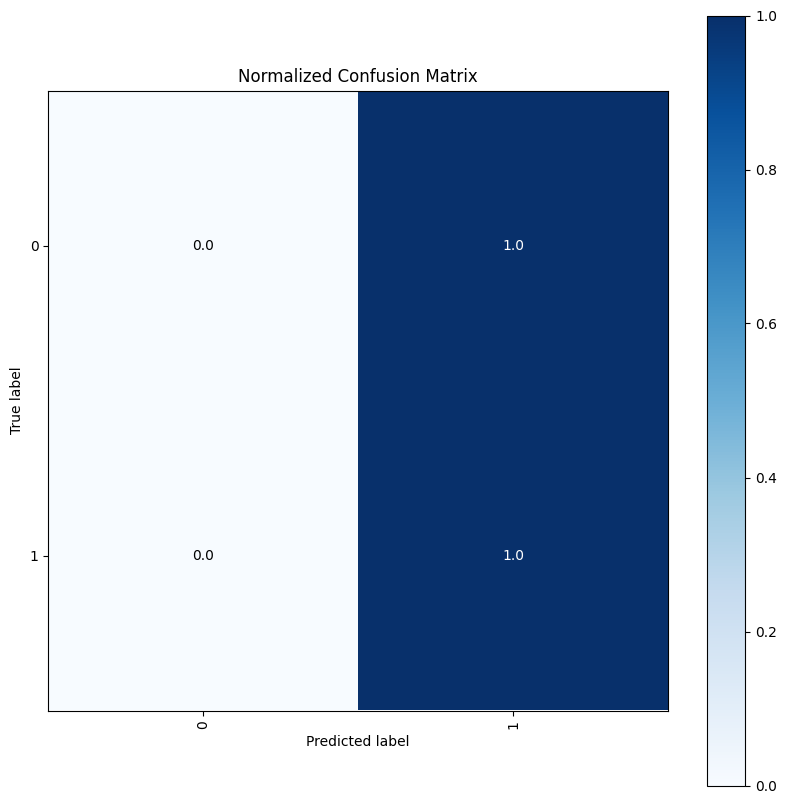

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
skplt.metrics.plot_confusion_matrix(val_labels, y_pred,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

<Axes: >

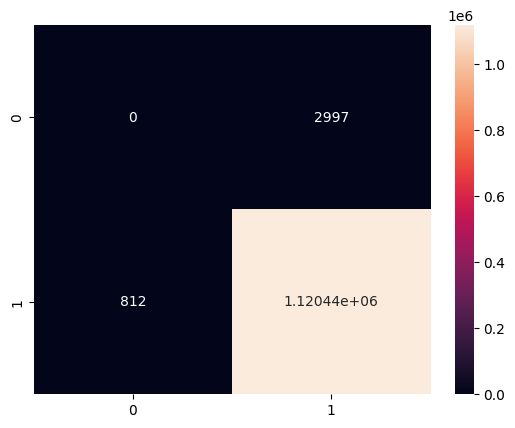

In [ ]:
cm = confusion_matrix(val_labels, y_pred)
sns.heatmap(cm, annot=True, fmt="g")

**ROC curve**

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

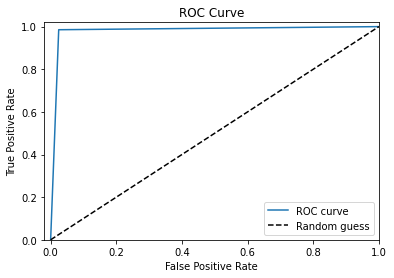

In [ ]:
fpr, tpr, thresholds = roc_curve(val_labels, y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")